### 데이터 전처리

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3     var38  TARGET  
0                     0.0                     0.0  39205.17       0  
1                     0.0                     0.0  49278.03       0  
2                     0.0                     0.0  67333.77       0  

[3 rows x 371 columns]

In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe( )

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [7]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)

### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81005
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90451	validation_1-auc:0.83346
[150]	validation_0-auc:0.90459	validation_1-auc:0.83343
[151]	validation_0-auc:0.90462	validation_1-auc:0.83344
[152]	validation_0-auc:0.90476	validation_1-auc:0.83342
[153]	validation_0-auc:0.90494	validation_1-auc:0.83339
[154]	validation_0-auc:0.90507	validation_1-auc:0.83336
[155]	validation_0-auc:0.90512	validation_1-auc:0.83334
[156]	validation_0-auc:0.90518	validation_1-auc:0.83331
[157]	validation_0-auc:0.90524	validation_1-auc:0.83339
[158]	validation_0-auc:0.90543	validation_1-auc:0.83330
[159]	validation_0-auc:0.90553	validation_1-auc:0.83331
[160]	validation_0-auc:0.90567	validation_1-auc:0.83342
[161]	validation_0-auc:0.90586	validation_1-auc:0.83339
[162]	validation_0-auc:0.90592	validation_1-auc:0.83340
[163]	validation_0-auc:0.90594	validation_1-auc:0.83340
[164]	validation_0-auc:0.90622	validation_1-auc:0.83337
[165]	validation_0-auc:0.90634	validation_1-auc:0.83333
[166]	validation_0-auc:0.90645	validation_1-auc:

In [17]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 
xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
               }

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']), 
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1], average='macro') 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1*np.mean(roc_auc_list)

In [19]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials)

print('best:', best)

[0]	validation_0-auc:0.83456	validation_1-auc:0.79829                                                                  
[1]	validation_0-auc:0.85308	validation_1-auc:0.80510                                                                  
[2]	validation_0-auc:0.86129	validation_1-auc:0.80896                                                                  
[3]	validation_0-auc:0.86674	validation_1-auc:0.81172                                                                  
[4]	validation_0-auc:0.87328	validation_1-auc:0.81304                                                                  
[5]	validation_0-auc:0.87957	validation_1-auc:0.81328                                                                  
[6]	validation_0-auc:0.88612	validation_1-auc:0.81371                                                                  
[7]	validation_0-auc:0.89287	validation_1-auc:0.81498                                                                  
[8]	validation_0-auc:0.89818	validation_

[12]	validation_0-auc:0.92339	validation_1-auc:0.81963                                                                 
[13]	validation_0-auc:0.93194	validation_1-auc:0.82274                                                                 
[14]	validation_0-auc:0.93621	validation_1-auc:0.82385                                                                 
[15]	validation_0-auc:0.94168	validation_1-auc:0.82291                                                                 
[16]	validation_0-auc:0.94666	validation_1-auc:0.82273                                                                 
[17]	validation_0-auc:0.95045	validation_1-auc:0.82225                                                                 
[18]	validation_0-auc:0.95261	validation_1-auc:0.82162                                                                 
[19]	validation_0-auc:0.95615	validation_1-auc:0.82067                                                                 
[20]	validation_0-auc:0.95898	validation

[43]	validation_0-auc:0.98382	validation_1-auc:0.81945                                                                 
[44]	validation_0-auc:0.98439	validation_1-auc:0.81909                                                                 
[45]	validation_0-auc:0.98469	validation_1-auc:0.81917                                                                 
[46]	validation_0-auc:0.98485	validation_1-auc:0.81897                                                                 
[47]	validation_0-auc:0.98528	validation_1-auc:0.81893                                                                 
[0]	validation_0-auc:0.82995	validation_1-auc:0.80031                                                                  
[1]	validation_0-auc:0.84052	validation_1-auc:0.80488                                                                  
[2]	validation_0-auc:0.85100	validation_1-auc:0.81019                                                                  
[3]	validation_0-auc:0.85881	validation_

[14]	validation_0-auc:0.91559	validation_1-auc:0.82681                                                                 
[15]	validation_0-auc:0.91963	validation_1-auc:0.82732                                                                 
[16]	validation_0-auc:0.92220	validation_1-auc:0.82660                                                                 
[17]	validation_0-auc:0.92514	validation_1-auc:0.82672                                                                 
[18]	validation_0-auc:0.92685	validation_1-auc:0.82538                                                                 
[19]	validation_0-auc:0.92950	validation_1-auc:0.82696                                                                 
[20]	validation_0-auc:0.93078	validation_1-auc:0.82763                                                                 
[21]	validation_0-auc:0.93239	validation_1-auc:0.82720                                                                 
[22]	validation_0-auc:0.93435	validation

[28]	validation_0-auc:0.94102	validation_1-auc:0.82688                                                                 
[29]	validation_0-auc:0.94207	validation_1-auc:0.82699                                                                 
[30]	validation_0-auc:0.94347	validation_1-auc:0.82567                                                                 
[31]	validation_0-auc:0.94432	validation_1-auc:0.82596                                                                 
[32]	validation_0-auc:0.94533	validation_1-auc:0.82675                                                                 
[33]	validation_0-auc:0.94582	validation_1-auc:0.82698                                                                 
[34]	validation_0-auc:0.94710	validation_1-auc:0.82704                                                                 
[35]	validation_0-auc:0.94755	validation_1-auc:0.82677                                                                 
[36]	validation_0-auc:0.94813	validation

[41]	validation_0-auc:0.85738	validation_1-auc:0.81872                                                                 
[42]	validation_0-auc:0.85783	validation_1-auc:0.81885                                                                 
[43]	validation_0-auc:0.85801	validation_1-auc:0.81901                                                                 
[44]	validation_0-auc:0.85860	validation_1-auc:0.81924                                                                 
[45]	validation_0-auc:0.85874	validation_1-auc:0.81926                                                                 
[46]	validation_0-auc:0.85886	validation_1-auc:0.81968                                                                 
[47]	validation_0-auc:0.85922	validation_1-auc:0.82032                                                                 
[48]	validation_0-auc:0.85995	validation_1-auc:0.82078                                                                 
[49]	validation_0-auc:0.86042	validation

[9]	validation_0-auc:0.84096	validation_1-auc:0.81906                                                                  
[10]	validation_0-auc:0.84022	validation_1-auc:0.81628                                                                 
[11]	validation_0-auc:0.84315	validation_1-auc:0.81612                                                                 
[12]	validation_0-auc:0.84365	validation_1-auc:0.81643                                                                 
[13]	validation_0-auc:0.84586	validation_1-auc:0.81881                                                                 
[14]	validation_0-auc:0.84724	validation_1-auc:0.82089                                                                 
[15]	validation_0-auc:0.84806	validation_1-auc:0.82127                                                                 
[16]	validation_0-auc:0.85101	validation_1-auc:0.82341                                                                 
[17]	validation_0-auc:0.85186	validation

[77]	validation_0-auc:0.87526	validation_1-auc:0.82529                                                                 
[78]	validation_0-auc:0.87568	validation_1-auc:0.82564                                                                 
[79]	validation_0-auc:0.87632	validation_1-auc:0.82572                                                                 
[80]	validation_0-auc:0.87685	validation_1-auc:0.82603                                                                 
[81]	validation_0-auc:0.87701	validation_1-auc:0.82544                                                                 
[82]	validation_0-auc:0.87710	validation_1-auc:0.82560                                                                 
[83]	validation_0-auc:0.87703	validation_1-auc:0.82510                                                                 
[84]	validation_0-auc:0.87718	validation_1-auc:0.82472                                                                 
[85]	validation_0-auc:0.87796	validation

[58]	validation_0-auc:0.87069	validation_1-auc:0.82615                                                                 
[59]	validation_0-auc:0.87104	validation_1-auc:0.82598                                                                 
[60]	validation_0-auc:0.87113	validation_1-auc:0.82602                                                                 
[61]	validation_0-auc:0.87153	validation_1-auc:0.82583                                                                 
[62]	validation_0-auc:0.87210	validation_1-auc:0.82589                                                                 
[63]	validation_0-auc:0.87197	validation_1-auc:0.82564                                                                 
[64]	validation_0-auc:0.87246	validation_1-auc:0.82571                                                                 
[65]	validation_0-auc:0.87289	validation_1-auc:0.82564                                                                 
[66]	validation_0-auc:0.87304	validation

[47]	validation_0-auc:0.91324	validation_1-auc:0.83362                                                                 
[48]	validation_0-auc:0.91415	validation_1-auc:0.83366                                                                 
[49]	validation_0-auc:0.91543	validation_1-auc:0.83403                                                                 
[50]	validation_0-auc:0.91626	validation_1-auc:0.83374                                                                 
[51]	validation_0-auc:0.91715	validation_1-auc:0.83368                                                                 
[52]	validation_0-auc:0.91830	validation_1-auc:0.83351                                                                 
[53]	validation_0-auc:0.91908	validation_1-auc:0.83312                                                                 
[54]	validation_0-auc:0.91993	validation_1-auc:0.83287                                                                 
[55]	validation_0-auc:0.92056	validation

[36]	validation_0-auc:0.89953	validation_1-auc:0.83232                                                                 
[37]	validation_0-auc:0.90054	validation_1-auc:0.83199                                                                 
[38]	validation_0-auc:0.90097	validation_1-auc:0.83114                                                                 
[39]	validation_0-auc:0.90239	validation_1-auc:0.83192                                                                 
[40]	validation_0-auc:0.90392	validation_1-auc:0.83294                                                                 
[41]	validation_0-auc:0.90452	validation_1-auc:0.83244                                                                 
[42]	validation_0-auc:0.90674	validation_1-auc:0.83208                                                                 
[43]	validation_0-auc:0.90908	validation_1-auc:0.83309                                                                 
[44]	validation_0-auc:0.91048	validation

[4]	validation_0-auc:0.85212	validation_1-auc:0.81711                                                                  
[5]	validation_0-auc:0.85689	validation_1-auc:0.81841                                                                  
[6]	validation_0-auc:0.85997	validation_1-auc:0.81953                                                                  
[7]	validation_0-auc:0.86189	validation_1-auc:0.81968                                                                  
[8]	validation_0-auc:0.86382	validation_1-auc:0.82040                                                                  
[9]	validation_0-auc:0.86542	validation_1-auc:0.82046                                                                  
[10]	validation_0-auc:0.86643	validation_1-auc:0.81922                                                                 
[11]	validation_0-auc:0.86730	validation_1-auc:0.81917                                                                 
[12]	validation_0-auc:0.87075	validation

[72]	validation_0-auc:0.92981	validation_1-auc:0.83240                                                                 
[73]	validation_0-auc:0.93008	validation_1-auc:0.83226                                                                 
[74]	validation_0-auc:0.93044	validation_1-auc:0.83185                                                                 
[75]	validation_0-auc:0.93076	validation_1-auc:0.83212                                                                 
[76]	validation_0-auc:0.93113	validation_1-auc:0.83222                                                                 
[77]	validation_0-auc:0.93123	validation_1-auc:0.83223                                                                 
[78]	validation_0-auc:0.93139	validation_1-auc:0.83250                                                                 
[79]	validation_0-auc:0.93205	validation_1-auc:0.83234                                                                 
[80]	validation_0-auc:0.93230	validation

[40]	validation_0-auc:0.92779	validation_1-auc:0.82707                                                                 
[41]	validation_0-auc:0.92789	validation_1-auc:0.82702                                                                 
[42]	validation_0-auc:0.92848	validation_1-auc:0.82694                                                                 
[43]	validation_0-auc:0.92968	validation_1-auc:0.82682                                                                 
[44]	validation_0-auc:0.93047	validation_1-auc:0.82699                                                                 
[45]	validation_0-auc:0.93084	validation_1-auc:0.82710                                                                 
[46]	validation_0-auc:0.93170	validation_1-auc:0.82664                                                                 
[47]	validation_0-auc:0.93194	validation_1-auc:0.82675                                                                 
[48]	validation_0-auc:0.93236	validation

[53]	validation_0-auc:0.93534	validation_1-auc:0.83417                                                                 
[54]	validation_0-auc:0.93576	validation_1-auc:0.83421                                                                 
[0]	validation_0-auc:0.83379	validation_1-auc:0.80936                                                                  
[1]	validation_0-auc:0.84014	validation_1-auc:0.81215                                                                  
[2]	validation_0-auc:0.84730	validation_1-auc:0.81833                                                                  
[3]	validation_0-auc:0.85159	validation_1-auc:0.81722                                                                  
[4]	validation_0-auc:0.85708	validation_1-auc:0.81734                                                                  
[5]	validation_0-auc:0.86437	validation_1-auc:0.82007                                                                  
[6]	validation_0-auc:0.86886	validation_

[66]	validation_0-auc:0.94164	validation_1-auc:0.83160                                                                 
[67]	validation_0-auc:0.94173	validation_1-auc:0.83154                                                                 
[68]	validation_0-auc:0.94188	validation_1-auc:0.83145                                                                 
[69]	validation_0-auc:0.94203	validation_1-auc:0.83142                                                                 
[70]	validation_0-auc:0.94239	validation_1-auc:0.83138                                                                 
[71]	validation_0-auc:0.94250	validation_1-auc:0.83138                                                                 
[72]	validation_0-auc:0.94258	validation_1-auc:0.83123                                                                 
[73]	validation_0-auc:0.94270	validation_1-auc:0.83143                                                                 
[74]	validation_0-auc:0.94273	validation

[59]	validation_0-auc:0.90315	validation_1-auc:0.83228                                                                 
[60]	validation_0-auc:0.90326	validation_1-auc:0.83224                                                                 
[61]	validation_0-auc:0.90407	validation_1-auc:0.83220                                                                 
[62]	validation_0-auc:0.90432	validation_1-auc:0.83217                                                                 
[63]	validation_0-auc:0.90481	validation_1-auc:0.83182                                                                 
[64]	validation_0-auc:0.90512	validation_1-auc:0.83196                                                                 
[65]	validation_0-auc:0.90529	validation_1-auc:0.83200                                                                 
[66]	validation_0-auc:0.90561	validation_1-auc:0.83179                                                                 
[67]	validation_0-auc:0.90580	validation

[41]	validation_0-auc:0.89604	validation_1-auc:0.83589                                                                 
[42]	validation_0-auc:0.89657	validation_1-auc:0.83613                                                                 
[43]	validation_0-auc:0.89705	validation_1-auc:0.83605                                                                 
[44]	validation_0-auc:0.89780	validation_1-auc:0.83631                                                                 
[45]	validation_0-auc:0.89833	validation_1-auc:0.83635                                                                 
[46]	validation_0-auc:0.89896	validation_1-auc:0.83630                                                                 
[47]	validation_0-auc:0.89921	validation_1-auc:0.83635                                                                 
[48]	validation_0-auc:0.89950	validation_1-auc:0.83623                                                                 
[49]	validation_0-auc:0.90004	validation

[18]	validation_0-auc:0.87232	validation_1-auc:0.83002                                                                 
[19]	validation_0-auc:0.87358	validation_1-auc:0.83122                                                                 
[20]	validation_0-auc:0.87524	validation_1-auc:0.83238                                                                 
[21]	validation_0-auc:0.87624	validation_1-auc:0.83276                                                                 
[22]	validation_0-auc:0.87712	validation_1-auc:0.83350                                                                 
[23]	validation_0-auc:0.87860	validation_1-auc:0.83392                                                                 
[24]	validation_0-auc:0.87962	validation_1-auc:0.83468                                                                 
[25]	validation_0-auc:0.88033	validation_1-auc:0.83477                                                                 
[26]	validation_0-auc:0.88153	validation

[86]	validation_0-auc:0.91455	validation_1-auc:0.83684                                                                 
[87]	validation_0-auc:0.91467	validation_1-auc:0.83683                                                                 
[88]	validation_0-auc:0.91547	validation_1-auc:0.83702                                                                 
[89]	validation_0-auc:0.91567	validation_1-auc:0.83682                                                                 
[90]	validation_0-auc:0.91580	validation_1-auc:0.83680                                                                 
[91]	validation_0-auc:0.91587	validation_1-auc:0.83664                                                                 
[92]	validation_0-auc:0.91615	validation_1-auc:0.83664                                                                 
[93]	validation_0-auc:0.91633	validation_1-auc:0.83659                                                                 
[94]	validation_0-auc:0.91681	validation

[4]	validation_0-auc:0.86568	validation_1-auc:0.82735                                                                  
[5]	validation_0-auc:0.86853	validation_1-auc:0.82597                                                                  
[6]	validation_0-auc:0.87707	validation_1-auc:0.82615                                                                  
[7]	validation_0-auc:0.88098	validation_1-auc:0.82835                                                                  
[8]	validation_0-auc:0.88503	validation_1-auc:0.82950                                                                  
[9]	validation_0-auc:0.89134	validation_1-auc:0.83013                                                                  
[10]	validation_0-auc:0.89359	validation_1-auc:0.82874                                                                 
[11]	validation_0-auc:0.89484	validation_1-auc:0.82554                                                                 
[12]	validation_0-auc:0.90260	validation

[20]	validation_0-auc:0.92679	validation_1-auc:0.82809                                                                 
[21]	validation_0-auc:0.92844	validation_1-auc:0.82903                                                                 
[22]	validation_0-auc:0.93019	validation_1-auc:0.82946                                                                 
[23]	validation_0-auc:0.93145	validation_1-auc:0.83013                                                                 
[24]	validation_0-auc:0.93230	validation_1-auc:0.82931                                                                 
[25]	validation_0-auc:0.93300	validation_1-auc:0.83032                                                                 
[26]	validation_0-auc:0.93515	validation_1-auc:0.82871                                                                 
[27]	validation_0-auc:0.93661	validation_1-auc:0.83015                                                                 
[28]	validation_0-auc:0.93759	validation

[29]	validation_0-auc:0.91566	validation_1-auc:0.82762                                                                 
[30]	validation_0-auc:0.91787	validation_1-auc:0.82567                                                                 
[31]	validation_0-auc:0.91918	validation_1-auc:0.82691                                                                 
[32]	validation_0-auc:0.92067	validation_1-auc:0.82708                                                                 
[33]	validation_0-auc:0.92138	validation_1-auc:0.82725                                                                 
[34]	validation_0-auc:0.92218	validation_1-auc:0.82730                                                                 
[35]	validation_0-auc:0.92308	validation_1-auc:0.82698                                                                 
[36]	validation_0-auc:0.92453	validation_1-auc:0.82676                                                                 
[37]	validation_0-auc:0.92593	validation

[39]	validation_0-auc:0.92869	validation_1-auc:0.82981                                                                 
[40]	validation_0-auc:0.92942	validation_1-auc:0.83061                                                                 
[41]	validation_0-auc:0.93056	validation_1-auc:0.83087                                                                 
[42]	validation_0-auc:0.93134	validation_1-auc:0.83096                                                                 
[43]	validation_0-auc:0.93144	validation_1-auc:0.83162                                                                 
[44]	validation_0-auc:0.93234	validation_1-auc:0.83205                                                                 
[45]	validation_0-auc:0.93269	validation_1-auc:0.83213                                                                 
[46]	validation_0-auc:0.93275	validation_1-auc:0.83245                                                                 
[47]	validation_0-auc:0.93317	validation

[26]	validation_0-auc:0.91351	validation_1-auc:0.82687                                                                 
[27]	validation_0-auc:0.91548	validation_1-auc:0.82741                                                                 
[28]	validation_0-auc:0.91616	validation_1-auc:0.82660                                                                 
[29]	validation_0-auc:0.91834	validation_1-auc:0.82773                                                                 
[30]	validation_0-auc:0.91986	validation_1-auc:0.82662                                                                 
[31]	validation_0-auc:0.92154	validation_1-auc:0.82770                                                                 
[32]	validation_0-auc:0.92248	validation_1-auc:0.82820                                                                 
[33]	validation_0-auc:0.92271	validation_1-auc:0.82863                                                                 
[34]	validation_0-auc:0.92349	validation

[10]	validation_0-auc:0.87369	validation_1-auc:0.82346                                                                 
[11]	validation_0-auc:0.88066	validation_1-auc:0.82500                                                                 
[12]	validation_0-auc:0.88351	validation_1-auc:0.82664                                                                 
[13]	validation_0-auc:0.88637	validation_1-auc:0.82761                                                                 
[14]	validation_0-auc:0.88852	validation_1-auc:0.82738                                                                 
[15]	validation_0-auc:0.89203	validation_1-auc:0.82780                                                                 
[16]	validation_0-auc:0.89585	validation_1-auc:0.82875                                                                 
[17]	validation_0-auc:0.89781	validation_1-auc:0.82823                                                                 
[18]	validation_0-auc:0.90043	validation

[28]	validation_0-auc:0.92334	validation_1-auc:0.83298                                                                 
[29]	validation_0-auc:0.92491	validation_1-auc:0.83234                                                                 
[30]	validation_0-auc:0.92587	validation_1-auc:0.83249                                                                 
[31]	validation_0-auc:0.92676	validation_1-auc:0.83288                                                                 
[32]	validation_0-auc:0.92799	validation_1-auc:0.83327                                                                 
[33]	validation_0-auc:0.92878	validation_1-auc:0.83299                                                                 
[34]	validation_0-auc:0.92963	validation_1-auc:0.83364                                                                 
[35]	validation_0-auc:0.92996	validation_1-auc:0.83355                                                                 
[36]	validation_0-auc:0.93025	validation

[22]	validation_0-auc:0.91544	validation_1-auc:0.83114                                                                 
[23]	validation_0-auc:0.91700	validation_1-auc:0.83184                                                                 
[24]	validation_0-auc:0.91940	validation_1-auc:0.83175                                                                 
[25]	validation_0-auc:0.92138	validation_1-auc:0.83240                                                                 
[26]	validation_0-auc:0.92305	validation_1-auc:0.83255                                                                 
[27]	validation_0-auc:0.92505	validation_1-auc:0.83284                                                                 
[28]	validation_0-auc:0.92635	validation_1-auc:0.83266                                                                 
[29]	validation_0-auc:0.92738	validation_1-auc:0.83246                                                                 
[30]	validation_0-auc:0.92880	validation

[29]	validation_0-auc:0.95907	validation_1-auc:0.81748                                                                 
[30]	validation_0-auc:0.96048	validation_1-auc:0.81604                                                                 
[31]	validation_0-auc:0.96212	validation_1-auc:0.81604                                                                 
[32]	validation_0-auc:0.96312	validation_1-auc:0.81634                                                                 
[33]	validation_0-auc:0.96347	validation_1-auc:0.81733                                                                 
[34]	validation_0-auc:0.96403	validation_1-auc:0.81779                                                                 
[35]	validation_0-auc:0.96477	validation_1-auc:0.81813                                                                 
[36]	validation_0-auc:0.96545	validation_1-auc:0.81829                                                                 
[37]	validation_0-auc:0.96647	validation

[12]	validation_0-auc:0.91266	validation_1-auc:0.81610                                                                 
[13]	validation_0-auc:0.91900	validation_1-auc:0.81878                                                                 
[14]	validation_0-auc:0.92046	validation_1-auc:0.81979                                                                 
[15]	validation_0-auc:0.92532	validation_1-auc:0.82105                                                                 
[16]	validation_0-auc:0.92806	validation_1-auc:0.82196                                                                 
[17]	validation_0-auc:0.93396	validation_1-auc:0.82178                                                                 
[18]	validation_0-auc:0.93635	validation_1-auc:0.81954                                                                 
[19]	validation_0-auc:0.94277	validation_1-auc:0.81939                                                                 
[20]	validation_0-auc:0.94350	validation

[34]	validation_0-auc:0.93139	validation_1-auc:0.82431                                                                 
[35]	validation_0-auc:0.93276	validation_1-auc:0.82526                                                                 
[36]	validation_0-auc:0.93382	validation_1-auc:0.82547                                                                 
[37]	validation_0-auc:0.93473	validation_1-auc:0.82559                                                                 
[38]	validation_0-auc:0.93615	validation_1-auc:0.82604                                                                 
[39]	validation_0-auc:0.93715	validation_1-auc:0.82549                                                                 
[40]	validation_0-auc:0.93830	validation_1-auc:0.82562                                                                 
[41]	validation_0-auc:0.94001	validation_1-auc:0.82559                                                                 
[42]	validation_0-auc:0.94142	validation

[25]	validation_0-auc:0.91939	validation_1-auc:0.82934                                                                 
[26]	validation_0-auc:0.92192	validation_1-auc:0.82882                                                                 
[27]	validation_0-auc:0.92313	validation_1-auc:0.82872                                                                 
[28]	validation_0-auc:0.92461	validation_1-auc:0.82875                                                                 
[29]	validation_0-auc:0.92700	validation_1-auc:0.82835                                                                 
[30]	validation_0-auc:0.92861	validation_1-auc:0.82866                                                                 
[31]	validation_0-auc:0.93005	validation_1-auc:0.82827                                                                 
[32]	validation_0-auc:0.93093	validation_1-auc:0.82824                                                                 
[33]	validation_0-auc:0.93275	validation

[47]	validation_0-auc:0.95103	validation_1-auc:0.82225                                                                 
[48]	validation_0-auc:0.95181	validation_1-auc:0.82254                                                                 
[49]	validation_0-auc:0.95250	validation_1-auc:0.82310                                                                 
[50]	validation_0-auc:0.95323	validation_1-auc:0.82344                                                                 
[51]	validation_0-auc:0.95409	validation_1-auc:0.82453                                                                 
[52]	validation_0-auc:0.95477	validation_1-auc:0.82485                                                                 
[53]	validation_0-auc:0.95527	validation_1-auc:0.82504                                                                 
[54]	validation_0-auc:0.95604	validation_1-auc:0.82509                                                                 
[55]	validation_0-auc:0.95672	validation

[27]	validation_0-auc:0.88454	validation_1-auc:0.83082                                                                 
[28]	validation_0-auc:0.88557	validation_1-auc:0.83147                                                                 
[29]	validation_0-auc:0.88643	validation_1-auc:0.83142                                                                 
[30]	validation_0-auc:0.88835	validation_1-auc:0.83229                                                                 
[31]	validation_0-auc:0.88945	validation_1-auc:0.83164                                                                 
[32]	validation_0-auc:0.89080	validation_1-auc:0.83127                                                                 
[33]	validation_0-auc:0.89155	validation_1-auc:0.83035                                                                 
[34]	validation_0-auc:0.89293	validation_1-auc:0.83092                                                                 
[35]	validation_0-auc:0.89387	validation

[16]	validation_0-auc:0.87049	validation_1-auc:0.82883                                                                 
[17]	validation_0-auc:0.87274	validation_1-auc:0.82939                                                                 
[18]	validation_0-auc:0.87242	validation_1-auc:0.82861                                                                 
[19]	validation_0-auc:0.87367	validation_1-auc:0.82891                                                                 
[20]	validation_0-auc:0.87501	validation_1-auc:0.82910                                                                 
[21]	validation_0-auc:0.87619	validation_1-auc:0.83060                                                                 
[22]	validation_0-auc:0.87804	validation_1-auc:0.83091                                                                 
[23]	validation_0-auc:0.87868	validation_1-auc:0.83104                                                                 
[24]	validation_0-auc:0.88067	validation

[3]	validation_0-auc:0.84406	validation_1-auc:0.81803                                                                  
[4]	validation_0-auc:0.84814	validation_1-auc:0.82094                                                                  
[5]	validation_0-auc:0.84907	validation_1-auc:0.82227                                                                  
[6]	validation_0-auc:0.85155	validation_1-auc:0.82196                                                                  
[7]	validation_0-auc:0.85218	validation_1-auc:0.82148                                                                  
[8]	validation_0-auc:0.85297	validation_1-auc:0.82152                                                                  
[9]	validation_0-auc:0.85840	validation_1-auc:0.82494                                                                  
[10]	validation_0-auc:0.85945	validation_1-auc:0.82431                                                                 
[11]	validation_0-auc:0.85983	validation

[71]	validation_0-auc:0.91654	validation_1-auc:0.83549                                                                 
[72]	validation_0-auc:0.91662	validation_1-auc:0.83534                                                                 
[73]	validation_0-auc:0.91673	validation_1-auc:0.83527                                                                 
[74]	validation_0-auc:0.91717	validation_1-auc:0.83531                                                                 
[75]	validation_0-auc:0.91727	validation_1-auc:0.83528                                                                 
[76]	validation_0-auc:0.91764	validation_1-auc:0.83521                                                                 
[77]	validation_0-auc:0.91779	validation_1-auc:0.83509                                                                 
[78]	validation_0-auc:0.91809	validation_1-auc:0.83486                                                                 
[79]	validation_0-auc:0.91852	validation

[52]	validation_0-auc:0.96112	validation_1-auc:0.81739                                                                 
[53]	validation_0-auc:0.96145	validation_1-auc:0.81729                                                                 
[54]	validation_0-auc:0.96182	validation_1-auc:0.81692                                                                 
[0]	validation_0-auc:0.82439	validation_1-auc:0.80727                                                                  
[1]	validation_0-auc:0.84104	validation_1-auc:0.81561                                                                  
[2]	validation_0-auc:0.85183	validation_1-auc:0.82167                                                                  
[3]	validation_0-auc:0.85593	validation_1-auc:0.82160                                                                  
[4]	validation_0-auc:0.86259	validation_1-auc:0.82224                                                                  
[5]	validation_0-auc:0.86723	validation_

[14]	validation_0-auc:0.91421	validation_1-auc:0.82325                                                                 
[15]	validation_0-auc:0.91780	validation_1-auc:0.82387                                                                 
[16]	validation_0-auc:0.92055	validation_1-auc:0.82430                                                                 
[17]	validation_0-auc:0.92430	validation_1-auc:0.82561                                                                 
[18]	validation_0-auc:0.92647	validation_1-auc:0.82387                                                                 
[19]	validation_0-auc:0.93050	validation_1-auc:0.82306                                                                 
[20]	validation_0-auc:0.93338	validation_1-auc:0.82332                                                                 
[21]	validation_0-auc:0.93531	validation_1-auc:0.82139                                                                 
[22]	validation_0-auc:0.93776	validation

[43]	validation_0-auc:0.88776	validation_1-auc:0.82491                                                                 
[44]	validation_0-auc:0.88917	validation_1-auc:0.82508                                                                 
[45]	validation_0-auc:0.88943	validation_1-auc:0.82559                                                                 
[46]	validation_0-auc:0.89005	validation_1-auc:0.82614                                                                 
[47]	validation_0-auc:0.89121	validation_1-auc:0.82651                                                                 
[48]	validation_0-auc:0.89169	validation_1-auc:0.82655                                                                 
[49]	validation_0-auc:0.89249	validation_1-auc:0.82659                                                                 
[50]	validation_0-auc:0.89345	validation_1-auc:0.82717                                                                 
[51]	validation_0-auc:0.89434	validation

[11]	validation_0-auc:0.85665	validation_1-auc:0.81947                                                                 
[12]	validation_0-auc:0.85871	validation_1-auc:0.82104                                                                 
[13]	validation_0-auc:0.85979	validation_1-auc:0.82121                                                                 
[14]	validation_0-auc:0.86308	validation_1-auc:0.82349                                                                 
[15]	validation_0-auc:0.86376	validation_1-auc:0.82431                                                                 
[16]	validation_0-auc:0.86635	validation_1-auc:0.82605                                                                 
[17]	validation_0-auc:0.86677	validation_1-auc:0.82633                                                                 
[18]	validation_0-auc:0.86634	validation_1-auc:0.82378                                                                 
[19]	validation_0-auc:0.86866	validation

[79]	validation_0-auc:0.91738	validation_1-auc:0.82881                                                                 
[80]	validation_0-auc:0.91876	validation_1-auc:0.82913                                                                 
[81]	validation_0-auc:0.91895	validation_1-auc:0.82885                                                                 
[82]	validation_0-auc:0.91950	validation_1-auc:0.82914                                                                 
[83]	validation_0-auc:0.91966	validation_1-auc:0.82877                                                                 
[84]	validation_0-auc:0.92002	validation_1-auc:0.82841                                                                 
[85]	validation_0-auc:0.92105	validation_1-auc:0.82854                                                                 
[0]	validation_0-auc:0.83724	validation_1-auc:0.80844                                                                  
[1]	validation_0-auc:0.84065	validation_

[61]	validation_0-auc:0.90731	validation_1-auc:0.82676                                                                 
[62]	validation_0-auc:0.90759	validation_1-auc:0.82661                                                                 
[63]	validation_0-auc:0.90804	validation_1-auc:0.82606                                                                 
[64]	validation_0-auc:0.90888	validation_1-auc:0.82626                                                                 
[65]	validation_0-auc:0.90961	validation_1-auc:0.82633                                                                 
[66]	validation_0-auc:0.91021	validation_1-auc:0.82582                                                                 
[67]	validation_0-auc:0.91096	validation_1-auc:0.82630                                                                 
[68]	validation_0-auc:0.91247	validation_1-auc:0.82693                                                                 
[69]	validation_0-auc:0.91346	validation

[47]	validation_0-auc:0.94931	validation_1-auc:0.81817                                                                 
[0]	validation_0-auc:0.82332	validation_1-auc:0.80381                                                                  
[1]	validation_0-auc:0.83868	validation_1-auc:0.81566                                                                  
[2]	validation_0-auc:0.84802	validation_1-auc:0.82291                                                                  
[3]	validation_0-auc:0.85460	validation_1-auc:0.82401                                                                  
[4]	validation_0-auc:0.86077	validation_1-auc:0.82401                                                                  
[5]	validation_0-auc:0.86702	validation_1-auc:0.82497                                                                  
[6]	validation_0-auc:0.87462	validation_1-auc:0.82762                                                                  
[7]	validation_0-auc:0.88039	validation_

[3]	validation_0-auc:0.85913	validation_1-auc:0.81496                                                                  
[4]	validation_0-auc:0.86690	validation_1-auc:0.81705                                                                  
[5]	validation_0-auc:0.87399	validation_1-auc:0.81911                                                                  
[6]	validation_0-auc:0.87961	validation_1-auc:0.81965                                                                  
[7]	validation_0-auc:0.88566	validation_1-auc:0.82213                                                                  
[8]	validation_0-auc:0.89089	validation_1-auc:0.82631                                                                  
[9]	validation_0-auc:0.89453	validation_1-auc:0.82463                                                                  
[10]	validation_0-auc:0.89601	validation_1-auc:0.82121                                                                 
[11]	validation_0-auc:0.89946	validation

[12]	validation_0-auc:0.83292	validation_1-auc:0.81056                                                                 
[13]	validation_0-auc:0.83329	validation_1-auc:0.81091                                                                 
[14]	validation_0-auc:0.83340	validation_1-auc:0.81073                                                                 
[15]	validation_0-auc:0.83377	validation_1-auc:0.81078                                                                 
[16]	validation_0-auc:0.83354	validation_1-auc:0.81032                                                                 
[17]	validation_0-auc:0.83380	validation_1-auc:0.81061                                                                 
[18]	validation_0-auc:0.83452	validation_1-auc:0.81147                                                                 
[19]	validation_0-auc:0.83410	validation_1-auc:0.81193                                                                 
[20]	validation_0-auc:0.83418	validation

[80]	validation_0-auc:0.84381	validation_1-auc:0.81874                                                                 
[81]	validation_0-auc:0.84304	validation_1-auc:0.81845                                                                 
[82]	validation_0-auc:0.84390	validation_1-auc:0.81957                                                                 
[83]	validation_0-auc:0.84315	validation_1-auc:0.81877                                                                 
[84]	validation_0-auc:0.84275	validation_1-auc:0.81863                                                                 
[85]	validation_0-auc:0.84369	validation_1-auc:0.81929                                                                 
[86]	validation_0-auc:0.84398	validation_1-auc:0.81959                                                                 
[87]	validation_0-auc:0.84407	validation_1-auc:0.81963                                                                 
[88]	validation_0-auc:0.84480	validation

[48]	validation_0-auc:0.84151	validation_1-auc:0.82620                                                                 
[49]	validation_0-auc:0.84162	validation_1-auc:0.82610                                                                 
[50]	validation_0-auc:0.84167	validation_1-auc:0.82647                                                                 
[51]	validation_0-auc:0.84162	validation_1-auc:0.82652                                                                 
[52]	validation_0-auc:0.84175	validation_1-auc:0.82648                                                                 
[53]	validation_0-auc:0.84175	validation_1-auc:0.82652                                                                 
[54]	validation_0-auc:0.84247	validation_1-auc:0.82671                                                                 
[55]	validation_0-auc:0.84271	validation_1-auc:0.82686                                                                 
[56]	validation_0-auc:0.84288	validation

[29]	validation_0-auc:0.83893	validation_1-auc:0.82475                                                                 
[30]	validation_0-auc:0.83937	validation_1-auc:0.82425                                                                 
[31]	validation_0-auc:0.83937	validation_1-auc:0.82429                                                                 
[32]	validation_0-auc:0.83988	validation_1-auc:0.82427                                                                 
[33]	validation_0-auc:0.84081	validation_1-auc:0.82473                                                                 
[34]	validation_0-auc:0.84078	validation_1-auc:0.82467                                                                 
[35]	validation_0-auc:0.84072	validation_1-auc:0.82480                                                                 
[36]	validation_0-auc:0.84065	validation_1-auc:0.82504                                                                 
[37]	validation_0-auc:0.84102	validation

[9]	validation_0-auc:0.88137	validation_1-auc:0.82182                                                                  
[10]	validation_0-auc:0.88239	validation_1-auc:0.82129                                                                 
[11]	validation_0-auc:0.88516	validation_1-auc:0.81912                                                                 
[12]	validation_0-auc:0.89261	validation_1-auc:0.82182                                                                 
[13]	validation_0-auc:0.89860	validation_1-auc:0.82253                                                                 
[14]	validation_0-auc:0.90001	validation_1-auc:0.82391                                                                 
[15]	validation_0-auc:0.90473	validation_1-auc:0.82513                                                                 
[16]	validation_0-auc:0.90692	validation_1-auc:0.82539                                                                 
[17]	validation_0-auc:0.91160	validation

[21]	validation_0-auc:0.92204	validation_1-auc:0.83132                                                                 
[22]	validation_0-auc:0.92511	validation_1-auc:0.83059                                                                 
[23]	validation_0-auc:0.92739	validation_1-auc:0.82996                                                                 
[24]	validation_0-auc:0.93129	validation_1-auc:0.82966                                                                 
[25]	validation_0-auc:0.93258	validation_1-auc:0.82947                                                                 
[26]	validation_0-auc:0.93521	validation_1-auc:0.82754                                                                 
[27]	validation_0-auc:0.93816	validation_1-auc:0.82641                                                                 
[28]	validation_0-auc:0.93993	validation_1-auc:0.82605                                                                 
[29]	validation_0-auc:0.94215	validation

[37]	validation_0-auc:0.95395	validation_1-auc:0.82579                                                                 
[38]	validation_0-auc:0.95481	validation_1-auc:0.82588                                                                 
[39]	validation_0-auc:0.95566	validation_1-auc:0.82611                                                                 
[40]	validation_0-auc:0.95627	validation_1-auc:0.82584                                                                 
[41]	validation_0-auc:0.95682	validation_1-auc:0.82587                                                                 
[42]	validation_0-auc:0.95761	validation_1-auc:0.82602                                                                 
[43]	validation_0-auc:0.95826	validation_1-auc:0.82612                                                                 
[44]	validation_0-auc:0.95881	validation_1-auc:0.82686                                                                 
[45]	validation_0-auc:0.95929	validation

[3]	validation_0-auc:0.84260	validation_1-auc:0.82370                                                                  
[4]	validation_0-auc:0.84944	validation_1-auc:0.82661                                                                  
[5]	validation_0-auc:0.85316	validation_1-auc:0.82555                                                                  
[6]	validation_0-auc:0.85846	validation_1-auc:0.82762                                                                  
[7]	validation_0-auc:0.86177	validation_1-auc:0.83010                                                                  
[8]	validation_0-auc:0.86557	validation_1-auc:0.83108                                                                  
[9]	validation_0-auc:0.86576	validation_1-auc:0.83017                                                                  
[10]	validation_0-auc:0.86468	validation_1-auc:0.82626                                                                 
[11]	validation_0-auc:0.86525	validation

[7]	validation_0-auc:0.86253	validation_1-auc:0.82565                                                                  
[8]	validation_0-auc:0.86545	validation_1-auc:0.82810                                                                  
[9]	validation_0-auc:0.86668	validation_1-auc:0.82729                                                                  
[10]	validation_0-auc:0.86640	validation_1-auc:0.82507                                                                 
[11]	validation_0-auc:0.86800	validation_1-auc:0.82276                                                                 
[12]	validation_0-auc:0.87294	validation_1-auc:0.82646                                                                 
[13]	validation_0-auc:0.87522	validation_1-auc:0.82753                                                                 
[14]	validation_0-auc:0.87691	validation_1-auc:0.82976                                                                 
[15]	validation_0-auc:0.87979	validation

[75]	validation_0-auc:0.92627	validation_1-auc:0.83397                                                                 
[76]	validation_0-auc:0.92654	validation_1-auc:0.83397                                                                 
[77]	validation_0-auc:0.92689	validation_1-auc:0.83376                                                                 
[78]	validation_0-auc:0.92706	validation_1-auc:0.83343                                                                 
[79]	validation_0-auc:0.92763	validation_1-auc:0.83336                                                                 
[80]	validation_0-auc:0.92895	validation_1-auc:0.83314                                                                 
[81]	validation_0-auc:0.92908	validation_1-auc:0.83291                                                                 
[82]	validation_0-auc:0.92913	validation_1-auc:0.83287                                                                 
[0]	validation_0-auc:0.83248	validation_

[60]	validation_0-auc:0.93075	validation_1-auc:0.82757                                                                 
[61]	validation_0-auc:0.93112	validation_1-auc:0.82773                                                                 
[62]	validation_0-auc:0.93171	validation_1-auc:0.82780                                                                 
[63]	validation_0-auc:0.93187	validation_1-auc:0.82768                                                                 
[64]	validation_0-auc:0.93205	validation_1-auc:0.82765                                                                 
[65]	validation_0-auc:0.93235	validation_1-auc:0.82783                                                                 
[66]	validation_0-auc:0.93282	validation_1-auc:0.82783                                                                 
[67]	validation_0-auc:0.93318	validation_1-auc:0.82779                                                                 
[68]	validation_0-auc:0.93351	validation

[31]	validation_0-auc:0.90863	validation_1-auc:0.83055                                                                 
[32]	validation_0-auc:0.90991	validation_1-auc:0.83027                                                                 
[33]	validation_0-auc:0.91075	validation_1-auc:0.83001                                                                 
[34]	validation_0-auc:0.91190	validation_1-auc:0.83003                                                                 
[35]	validation_0-auc:0.91301	validation_1-auc:0.83015                                                                 
[36]	validation_0-auc:0.91396	validation_1-auc:0.83000                                                                 
[37]	validation_0-auc:0.91484	validation_1-auc:0.82972                                                                 
[38]	validation_0-auc:0.91583	validation_1-auc:0.82926                                                                 
[39]	validation_0-auc:0.91657	validation

[7]	validation_0-auc:0.85738	validation_1-auc:0.82056                                                                  
[8]	validation_0-auc:0.85967	validation_1-auc:0.82113                                                                  
[9]	validation_0-auc:0.86893	validation_1-auc:0.82478                                                                  
[10]	validation_0-auc:0.87294	validation_1-auc:0.82470                                                                 
[11]	validation_0-auc:0.87599	validation_1-auc:0.82583                                                                 
[12]	validation_0-auc:0.87837	validation_1-auc:0.82633                                                                 
[13]	validation_0-auc:0.88116	validation_1-auc:0.82733                                                                 
[14]	validation_0-auc:0.88356	validation_1-auc:0.82736                                                                 
[15]	validation_0-auc:0.88567	validation

[75]	validation_0-auc:0.93602	validation_1-auc:0.82981                                                                 
[76]	validation_0-auc:0.93670	validation_1-auc:0.82983                                                                 
[77]	validation_0-auc:0.93692	validation_1-auc:0.82973                                                                 
[78]	validation_0-auc:0.93767	validation_1-auc:0.82979                                                                 
[79]	validation_0-auc:0.93805	validation_1-auc:0.82997                                                                 
[80]	validation_0-auc:0.93827	validation_1-auc:0.82990                                                                 
[81]	validation_0-auc:0.93836	validation_1-auc:0.82976                                                                 
[82]	validation_0-auc:0.93871	validation_1-auc:0.82954                                                                 
[83]	validation_0-auc:0.93928	validation

[43]	validation_0-auc:0.98055	validation_1-auc:0.81068                                                                 
[44]	validation_0-auc:0.98070	validation_1-auc:0.81059                                                                 
[45]	validation_0-auc:0.98113	validation_1-auc:0.81009                                                                 
[46]	validation_0-auc:0.98131	validation_1-auc:0.80969                                                                 
[0]	validation_0-auc:0.83223	validation_1-auc:0.80530                                                                  
[1]	validation_0-auc:0.84457	validation_1-auc:0.81604                                                                  
[2]	validation_0-auc:0.85328	validation_1-auc:0.81945                                                                  
[3]	validation_0-auc:0.86130	validation_1-auc:0.81793                                                                  
[4]	validation_0-auc:0.87154	validation_

[19]	validation_0-auc:0.95720	validation_1-auc:0.81622                                                                 
[20]	validation_0-auc:0.96023	validation_1-auc:0.81801                                                                 
[21]	validation_0-auc:0.96263	validation_1-auc:0.81789                                                                 
[22]	validation_0-auc:0.96520	validation_1-auc:0.81882                                                                 
[23]	validation_0-auc:0.96727	validation_1-auc:0.81831                                                                 
[24]	validation_0-auc:0.96892	validation_1-auc:0.81864                                                                 
[25]	validation_0-auc:0.97035	validation_1-auc:0.81917                                                                 
[26]	validation_0-auc:0.97213	validation_1-auc:0.82037                                                                 
[27]	validation_0-auc:0.97327	validation

[48]	validation_0-auc:0.85841	validation_1-auc:0.82465                                                                 
[49]	validation_0-auc:0.85870	validation_1-auc:0.82491                                                                 
[50]	validation_0-auc:0.85887	validation_1-auc:0.82511                                                                 
[51]	validation_0-auc:0.85932	validation_1-auc:0.82540                                                                 
[52]	validation_0-auc:0.85946	validation_1-auc:0.82572                                                                 
[53]	validation_0-auc:0.85995	validation_1-auc:0.82651                                                                 
[54]	validation_0-auc:0.86008	validation_1-auc:0.82660                                                                 
[55]	validation_0-auc:0.86036	validation_1-auc:0.82661                                                                 
[56]	validation_0-auc:0.86055	validation

[16]	validation_0-auc:0.84169	validation_1-auc:0.82583                                                                 
[17]	validation_0-auc:0.84322	validation_1-auc:0.82690                                                                 
[18]	validation_0-auc:0.84363	validation_1-auc:0.82682                                                                 
[19]	validation_0-auc:0.84489	validation_1-auc:0.82710                                                                 
[20]	validation_0-auc:0.84549	validation_1-auc:0.82766                                                                 
[21]	validation_0-auc:0.84635	validation_1-auc:0.82735                                                                 
[22]	validation_0-auc:0.84659	validation_1-auc:0.82746                                                                 
[23]	validation_0-auc:0.84697	validation_1-auc:0.82766                                                                 
[24]	validation_0-auc:0.84717	validation

[84]	validation_0-auc:0.87071	validation_1-auc:0.83719                                                                 
[85]	validation_0-auc:0.87114	validation_1-auc:0.83709                                                                 
[86]	validation_0-auc:0.87137	validation_1-auc:0.83722                                                                 
[87]	validation_0-auc:0.87153	validation_1-auc:0.83744                                                                 
[88]	validation_0-auc:0.87188	validation_1-auc:0.83749                                                                 
[89]	validation_0-auc:0.87210	validation_1-auc:0.83744                                                                 
[90]	validation_0-auc:0.87236	validation_1-auc:0.83761                                                                 
[91]	validation_0-auc:0.87251	validation_1-auc:0.83769                                                                 
[92]	validation_0-auc:0.87266	validation

[52]	validation_0-auc:0.85922	validation_1-auc:0.83349                                                                 
[53]	validation_0-auc:0.85975	validation_1-auc:0.83386                                                                 
[54]	validation_0-auc:0.85993	validation_1-auc:0.83388                                                                 
[55]	validation_0-auc:0.86030	validation_1-auc:0.83417                                                                 
[56]	validation_0-auc:0.86061	validation_1-auc:0.83422                                                                 
[57]	validation_0-auc:0.86126	validation_1-auc:0.83486                                                                 
[58]	validation_0-auc:0.86151	validation_1-auc:0.83488                                                                 
[59]	validation_0-auc:0.86195	validation_1-auc:0.83498                                                                 
[60]	validation_0-auc:0.86244	validation

[20]	validation_0-auc:0.84708	validation_1-auc:0.82079                                                                 
[21]	validation_0-auc:0.84721	validation_1-auc:0.82101                                                                 
[22]	validation_0-auc:0.84728	validation_1-auc:0.82092                                                                 
[23]	validation_0-auc:0.84790	validation_1-auc:0.82078                                                                 
[24]	validation_0-auc:0.84837	validation_1-auc:0.82127                                                                 
[25]	validation_0-auc:0.84866	validation_1-auc:0.82132                                                                 
[26]	validation_0-auc:0.84906	validation_1-auc:0.82116                                                                 
[27]	validation_0-auc:0.84957	validation_1-auc:0.82155                                                                 
[28]	validation_0-auc:0.84981	validation

[88]	validation_0-auc:0.87157	validation_1-auc:0.83376                                                                 
[89]	validation_0-auc:0.87177	validation_1-auc:0.83375                                                                 
[90]	validation_0-auc:0.87212	validation_1-auc:0.83378                                                                 
[91]	validation_0-auc:0.87238	validation_1-auc:0.83398                                                                 
[92]	validation_0-auc:0.87244	validation_1-auc:0.83405                                                                 
[93]	validation_0-auc:0.87267	validation_1-auc:0.83421                                                                 
[94]	validation_0-auc:0.87291	validation_1-auc:0.83432                                                                 
[95]	validation_0-auc:0.87304	validation_1-auc:0.83440                                                                 
[96]	validation_0-auc:0.87323	validation

[56]	validation_0-auc:0.86074	validation_1-auc:0.83452                                                                 
[57]	validation_0-auc:0.86116	validation_1-auc:0.83437                                                                 
[58]	validation_0-auc:0.86165	validation_1-auc:0.83435                                                                 
[59]	validation_0-auc:0.86212	validation_1-auc:0.83440                                                                 
[60]	validation_0-auc:0.86292	validation_1-auc:0.83460                                                                 
[61]	validation_0-auc:0.86325	validation_1-auc:0.83472                                                                 
[62]	validation_0-auc:0.86406	validation_1-auc:0.83480                                                                 
[63]	validation_0-auc:0.86417	validation_1-auc:0.83483                                                                 
[64]	validation_0-auc:0.86450	validation

[24]	validation_0-auc:0.84924	validation_1-auc:0.82779                                                                 
[25]	validation_0-auc:0.85025	validation_1-auc:0.82809                                                                 
[26]	validation_0-auc:0.85068	validation_1-auc:0.82868                                                                 
[27]	validation_0-auc:0.85139	validation_1-auc:0.82953                                                                 
[28]	validation_0-auc:0.85181	validation_1-auc:0.83030                                                                 
[29]	validation_0-auc:0.85202	validation_1-auc:0.83063                                                                 
[30]	validation_0-auc:0.85244	validation_1-auc:0.83080                                                                 
[31]	validation_0-auc:0.85290	validation_1-auc:0.83079                                                                 
[32]	validation_0-auc:0.85294	validation

[92]	validation_0-auc:0.87299	validation_1-auc:0.83849                                                                 
[93]	validation_0-auc:0.87323	validation_1-auc:0.83857                                                                 
[94]	validation_0-auc:0.87343	validation_1-auc:0.83839                                                                 
[95]	validation_0-auc:0.87364	validation_1-auc:0.83857                                                                 
[96]	validation_0-auc:0.87371	validation_1-auc:0.83861                                                                 
[97]	validation_0-auc:0.87383	validation_1-auc:0.83856                                                                 
[98]	validation_0-auc:0.87395	validation_1-auc:0.83861                                                                 
[99]	validation_0-auc:0.87411	validation_1-auc:0.83870                                                                 
[0]	validation_0-auc:0.81679	validation_

[60]	validation_0-auc:0.85727	validation_1-auc:0.82435                                                                 
[61]	validation_0-auc:0.85750	validation_1-auc:0.82442                                                                 
[62]	validation_0-auc:0.85809	validation_1-auc:0.82506                                                                 
[63]	validation_0-auc:0.85814	validation_1-auc:0.82518                                                                 
[64]	validation_0-auc:0.85850	validation_1-auc:0.82499                                                                 
[65]	validation_0-auc:0.85866	validation_1-auc:0.82510                                                                 
[66]	validation_0-auc:0.85880	validation_1-auc:0.82532                                                                 
[67]	validation_0-auc:0.85885	validation_1-auc:0.82542                                                                 
[68]	validation_0-auc:0.85913	validation

[28]	validation_0-auc:0.84681	validation_1-auc:0.82939                                                                 
[29]	validation_0-auc:0.84702	validation_1-auc:0.82963                                                                 
[30]	validation_0-auc:0.84725	validation_1-auc:0.82935                                                                 
[31]	validation_0-auc:0.84761	validation_1-auc:0.82920                                                                 
[32]	validation_0-auc:0.84772	validation_1-auc:0.82947                                                                 
[33]	validation_0-auc:0.84794	validation_1-auc:0.82972                                                                 
[34]	validation_0-auc:0.84826	validation_1-auc:0.82968                                                                 
[35]	validation_0-auc:0.84899	validation_1-auc:0.82964                                                                 
[36]	validation_0-auc:0.84982	validation

[96]	validation_0-auc:0.86767	validation_1-auc:0.83646                                                                 
[97]	validation_0-auc:0.86782	validation_1-auc:0.83637                                                                 
[98]	validation_0-auc:0.86787	validation_1-auc:0.83632                                                                 
[99]	validation_0-auc:0.86812	validation_1-auc:0.83637                                                                 
[0]	validation_0-auc:0.82201	validation_1-auc:0.81167                                                                  
[1]	validation_0-auc:0.82495	validation_1-auc:0.81249                                                                  
[2]	validation_0-auc:0.82845	validation_1-auc:0.81696                                                                  
[3]	validation_0-auc:0.82960	validation_1-auc:0.81630                                                                  
[4]	validation_0-auc:0.82996	validation_

[64]	validation_0-auc:0.85748	validation_1-auc:0.83344                                                                 
[65]	validation_0-auc:0.85763	validation_1-auc:0.83339                                                                 
[66]	validation_0-auc:0.85779	validation_1-auc:0.83352                                                                 
[67]	validation_0-auc:0.85788	validation_1-auc:0.83365                                                                 
[68]	validation_0-auc:0.85827	validation_1-auc:0.83368                                                                 
[69]	validation_0-auc:0.85845	validation_1-auc:0.83376                                                                 
[70]	validation_0-auc:0.85881	validation_1-auc:0.83378                                                                 
[71]	validation_0-auc:0.85928	validation_1-auc:0.83382                                                                 
[72]	validation_0-auc:0.85953	validation

[32]	validation_0-auc:0.85808	validation_1-auc:0.82437                                                                 
[33]	validation_0-auc:0.85869	validation_1-auc:0.82491                                                                 
[34]	validation_0-auc:0.85931	validation_1-auc:0.82515                                                                 
[35]	validation_0-auc:0.85989	validation_1-auc:0.82600                                                                 
[36]	validation_0-auc:0.86028	validation_1-auc:0.82627                                                                 
[37]	validation_0-auc:0.86064	validation_1-auc:0.82627                                                                 
[38]	validation_0-auc:0.86110	validation_1-auc:0.82625                                                                 
[39]	validation_0-auc:0.86160	validation_1-auc:0.82667                                                                 
[40]	validation_0-auc:0.86223	validation

[0]	validation_0-auc:0.81573	validation_1-auc:0.80235                                                                  
[1]	validation_0-auc:0.81974	validation_1-auc:0.80710                                                                  
[2]	validation_0-auc:0.82909	validation_1-auc:0.81955                                                                  
[3]	validation_0-auc:0.82927	validation_1-auc:0.81800                                                                  
[4]	validation_0-auc:0.83297	validation_1-auc:0.82082                                                                  
[5]	validation_0-auc:0.83343	validation_1-auc:0.82171                                                                  
[6]	validation_0-auc:0.83699	validation_1-auc:0.82357                                                                  
[7]	validation_0-auc:0.83715	validation_1-auc:0.82258                                                                  
[8]	validation_0-auc:0.83749	validation_

[68]	validation_0-auc:0.87670	validation_1-auc:0.83570                                                                 
[69]	validation_0-auc:0.87704	validation_1-auc:0.83599                                                                 
[70]	validation_0-auc:0.87769	validation_1-auc:0.83624                                                                 
[71]	validation_0-auc:0.87850	validation_1-auc:0.83625                                                                 
[72]	validation_0-auc:0.87888	validation_1-auc:0.83622                                                                 
[73]	validation_0-auc:0.87921	validation_1-auc:0.83612                                                                 
[74]	validation_0-auc:0.87979	validation_1-auc:0.83594                                                                 
[75]	validation_0-auc:0.88016	validation_1-auc:0.83587                                                                 
[76]	validation_0-auc:0.88045	validation

[36]	validation_0-auc:0.86228	validation_1-auc:0.83070                                                                 
[37]	validation_0-auc:0.86252	validation_1-auc:0.83089                                                                 
[38]	validation_0-auc:0.86292	validation_1-auc:0.83081                                                                 
[39]	validation_0-auc:0.86310	validation_1-auc:0.83092                                                                 
[40]	validation_0-auc:0.86380	validation_1-auc:0.83122                                                                 
[41]	validation_0-auc:0.86463	validation_1-auc:0.83152                                                                 
[42]	validation_0-auc:0.86491	validation_1-auc:0.83171                                                                 
[43]	validation_0-auc:0.86509	validation_1-auc:0.83172                                                                 
[44]	validation_0-auc:0.86553	validation

[4]	validation_0-auc:0.83206	validation_1-auc:0.80974                                                                  
[5]	validation_0-auc:0.83529	validation_1-auc:0.81416                                                                  
[6]	validation_0-auc:0.83549	validation_1-auc:0.81361                                                                  
[7]	validation_0-auc:0.83708	validation_1-auc:0.81542                                                                  
[8]	validation_0-auc:0.83718	validation_1-auc:0.81589                                                                  
[9]	validation_0-auc:0.83845	validation_1-auc:0.81582                                                                  
[10]	validation_0-auc:0.83478	validation_1-auc:0.81089                                                                 
[11]	validation_0-auc:0.83247	validation_1-auc:0.80577                                                                 
[12]	validation_0-auc:0.83645	validation

[72]	validation_0-auc:0.87009	validation_1-auc:0.83430                                                                 
[73]	validation_0-auc:0.87035	validation_1-auc:0.83417                                                                 
[74]	validation_0-auc:0.87075	validation_1-auc:0.83374                                                                 
[75]	validation_0-auc:0.87105	validation_1-auc:0.83407                                                                 
[76]	validation_0-auc:0.87132	validation_1-auc:0.83466                                                                 
[77]	validation_0-auc:0.87156	validation_1-auc:0.83458                                                                 
[78]	validation_0-auc:0.87179	validation_1-auc:0.83475                                                                 
[79]	validation_0-auc:0.87222	validation_1-auc:0.83486                                                                 
[80]	validation_0-auc:0.87273	validation

[40]	validation_0-auc:0.85622	validation_1-auc:0.82935                                                                 
[41]	validation_0-auc:0.85657	validation_1-auc:0.82967                                                                 
[42]	validation_0-auc:0.85728	validation_1-auc:0.83003                                                                 
[43]	validation_0-auc:0.85768	validation_1-auc:0.83049                                                                 
[44]	validation_0-auc:0.85905	validation_1-auc:0.83159                                                                 
[45]	validation_0-auc:0.85941	validation_1-auc:0.83198                                                                 
[46]	validation_0-auc:0.86016	validation_1-auc:0.83292                                                                 
[47]	validation_0-auc:0.86055	validation_1-auc:0.83332                                                                 
[48]	validation_0-auc:0.86140	validation

[8]	validation_0-auc:0.84050	validation_1-auc:0.82336                                                                  
[9]	validation_0-auc:0.84108	validation_1-auc:0.82320                                                                  
[10]	validation_0-auc:0.84150	validation_1-auc:0.82391                                                                 
[11]	validation_0-auc:0.83935	validation_1-auc:0.82303                                                                 
[12]	validation_0-auc:0.84186	validation_1-auc:0.82457                                                                 
[13]	validation_0-auc:0.84427	validation_1-auc:0.82600                                                                 
[14]	validation_0-auc:0.84550	validation_1-auc:0.82630                                                                 
[15]	validation_0-auc:0.84514	validation_1-auc:0.82598                                                                 
[16]	validation_0-auc:0.84593	validation

[76]	validation_0-auc:0.87295	validation_1-auc:0.83752                                                                 
[77]	validation_0-auc:0.87321	validation_1-auc:0.83718                                                                 
[78]	validation_0-auc:0.87345	validation_1-auc:0.83761                                                                 
[79]	validation_0-auc:0.87374	validation_1-auc:0.83783                                                                 
[80]	validation_0-auc:0.87407	validation_1-auc:0.83789                                                                 
[81]	validation_0-auc:0.87432	validation_1-auc:0.83763                                                                 
[82]	validation_0-auc:0.87455	validation_1-auc:0.83786                                                                 
[83]	validation_0-auc:0.87477	validation_1-auc:0.83781                                                                 
[84]	validation_0-auc:0.87519	validation

[44]	validation_0-auc:0.88837	validation_1-auc:0.83059                                                                 
[45]	validation_0-auc:0.88896	validation_1-auc:0.83135                                                                 
[46]	validation_0-auc:0.88981	validation_1-auc:0.83143                                                                 
[47]	validation_0-auc:0.89111	validation_1-auc:0.83206                                                                 
[48]	validation_0-auc:0.89233	validation_1-auc:0.83229                                                                 
[49]	validation_0-auc:0.89353	validation_1-auc:0.83265                                                                 
[50]	validation_0-auc:0.89392	validation_1-auc:0.83246                                                                 
[51]	validation_0-auc:0.89475	validation_1-auc:0.83279                                                                 
[52]	validation_0-auc:0.89545	validation

[30]	validation_0-auc:0.87593	validation_1-auc:0.82718                                                                 
[31]	validation_0-auc:0.87726	validation_1-auc:0.82789                                                                 
[32]	validation_0-auc:0.87842	validation_1-auc:0.82840                                                                 
[33]	validation_0-auc:0.87915	validation_1-auc:0.82926                                                                 
[34]	validation_0-auc:0.88020	validation_1-auc:0.83067                                                                 
[35]	validation_0-auc:0.88191	validation_1-auc:0.83114                                                                 
[36]	validation_0-auc:0.88176	validation_1-auc:0.83033                                                                 
[37]	validation_0-auc:0.88176	validation_1-auc:0.82958                                                                 
[38]	validation_0-auc:0.88211	validation

[98]	validation_0-auc:0.91581	validation_1-auc:0.83686                                                                 
[99]	validation_0-auc:0.91594	validation_1-auc:0.83688                                                                 
[0]	validation_0-auc:0.82959	validation_1-auc:0.80938                                                                  
[1]	validation_0-auc:0.83443	validation_1-auc:0.81180                                                                  
[2]	validation_0-auc:0.84115	validation_1-auc:0.81892                                                                  
[3]	validation_0-auc:0.84287	validation_1-auc:0.81838                                                                  
[4]	validation_0-auc:0.84660	validation_1-auc:0.81832                                                                  
[5]	validation_0-auc:0.85279	validation_1-auc:0.82125                                                                  
[6]	validation_0-auc:0.85509	validation_

[66]	validation_0-auc:0.90547	validation_1-auc:0.83159                                                                 
[67]	validation_0-auc:0.90587	validation_1-auc:0.83233                                                                 
[68]	validation_0-auc:0.90666	validation_1-auc:0.83207                                                                 
[69]	validation_0-auc:0.90712	validation_1-auc:0.83244                                                                 
[70]	validation_0-auc:0.90746	validation_1-auc:0.83215                                                                 
[71]	validation_0-auc:0.90782	validation_1-auc:0.83177                                                                 
[72]	validation_0-auc:0.90849	validation_1-auc:0.83249                                                                 
[73]	validation_0-auc:0.90905	validation_1-auc:0.83224                                                                 
[74]	validation_0-auc:0.90962	validation

[49]	validation_0-auc:0.88851	validation_1-auc:0.82808                                                                 
[50]	validation_0-auc:0.88898	validation_1-auc:0.82804                                                                 
[51]	validation_0-auc:0.88978	validation_1-auc:0.82854                                                                 
[52]	validation_0-auc:0.89023	validation_1-auc:0.82839                                                                 
[53]	validation_0-auc:0.89063	validation_1-auc:0.82880                                                                 
[54]	validation_0-auc:0.89116	validation_1-auc:0.82871                                                                 
[55]	validation_0-auc:0.89168	validation_1-auc:0.82864                                                                 
[56]	validation_0-auc:0.89173	validation_1-auc:0.82871                                                                 
[57]	validation_0-auc:0.89226	validation

[17]	validation_0-auc:0.86223	validation_1-auc:0.82677                                                                 
[18]	validation_0-auc:0.86131	validation_1-auc:0.82509                                                                 
[19]	validation_0-auc:0.86327	validation_1-auc:0.82620                                                                 
[20]	validation_0-auc:0.86465	validation_1-auc:0.82706                                                                 
[21]	validation_0-auc:0.86513	validation_1-auc:0.82773                                                                 
[22]	validation_0-auc:0.86784	validation_1-auc:0.82911                                                                 
[23]	validation_0-auc:0.86852	validation_1-auc:0.82943                                                                 
[24]	validation_0-auc:0.86903	validation_1-auc:0.82991                                                                 
[25]	validation_0-auc:0.86989	validation

[85]	validation_0-auc:0.90934	validation_1-auc:0.83257                                                                 
[86]	validation_0-auc:0.90980	validation_1-auc:0.83255                                                                 
[87]	validation_0-auc:0.91025	validation_1-auc:0.83272                                                                 
[88]	validation_0-auc:0.91057	validation_1-auc:0.83305                                                                 
[89]	validation_0-auc:0.91087	validation_1-auc:0.83328                                                                 
[90]	validation_0-auc:0.91117	validation_1-auc:0.83347                                                                 
[91]	validation_0-auc:0.91156	validation_1-auc:0.83349                                                                 
[92]	validation_0-auc:0.91186	validation_1-auc:0.83350                                                                 
[93]	validation_0-auc:0.91212	validation

[53]	validation_0-auc:0.89144	validation_1-auc:0.83241                                                                 
[54]	validation_0-auc:0.89177	validation_1-auc:0.83233                                                                 
[55]	validation_0-auc:0.89234	validation_1-auc:0.83223                                                                 
[56]	validation_0-auc:0.89248	validation_1-auc:0.83245                                                                 
[57]	validation_0-auc:0.89308	validation_1-auc:0.83244                                                                 
[58]	validation_0-auc:0.89351	validation_1-auc:0.83261                                                                 
[59]	validation_0-auc:0.89442	validation_1-auc:0.83331                                                                 
[60]	validation_0-auc:0.89541	validation_1-auc:0.83331                                                                 
[61]	validation_0-auc:0.89597	validation

[31]	validation_0-auc:0.86641	validation_1-auc:0.82818                                                                 
[32]	validation_0-auc:0.86808	validation_1-auc:0.82903                                                                 
[33]	validation_0-auc:0.86891	validation_1-auc:0.82968                                                                 
[34]	validation_0-auc:0.86980	validation_1-auc:0.83024                                                                 
[35]	validation_0-auc:0.87113	validation_1-auc:0.83063                                                                 
[36]	validation_0-auc:0.87213	validation_1-auc:0.83023                                                                 
[37]	validation_0-auc:0.87284	validation_1-auc:0.83020                                                                 
[38]	validation_0-auc:0.87316	validation_1-auc:0.82965                                                                 
[39]	validation_0-auc:0.87436	validation

[13]	validation_0-auc:0.85197	validation_1-auc:0.82647                                                                 
[14]	validation_0-auc:0.85322	validation_1-auc:0.82833                                                                 
[15]	validation_0-auc:0.85421	validation_1-auc:0.82577                                                                 
[16]	validation_0-auc:0.85637	validation_1-auc:0.82793                                                                 
[17]	validation_0-auc:0.85799	validation_1-auc:0.82901                                                                 
[18]	validation_0-auc:0.85732	validation_1-auc:0.82693                                                                 
[19]	validation_0-auc:0.85924	validation_1-auc:0.82778                                                                 
[20]	validation_0-auc:0.85891	validation_1-auc:0.82614                                                                 
[21]	validation_0-auc:0.85815	validation

[81]	validation_0-auc:0.89420	validation_1-auc:0.83615                                                                 
[82]	validation_0-auc:0.89446	validation_1-auc:0.83603                                                                 
[83]	validation_0-auc:0.89471	validation_1-auc:0.83599                                                                 
[84]	validation_0-auc:0.89486	validation_1-auc:0.83591                                                                 
[85]	validation_0-auc:0.89499	validation_1-auc:0.83588                                                                 
[86]	validation_0-auc:0.89521	validation_1-auc:0.83601                                                                 
[87]	validation_0-auc:0.89539	validation_1-auc:0.83581                                                                 
[88]	validation_0-auc:0.89550	validation_1-auc:0.83585                                                                 
[89]	validation_0-auc:0.89595	validation

[58]	validation_0-auc:0.88667	validation_1-auc:0.83679                                                                 
[59]	validation_0-auc:0.88736	validation_1-auc:0.83666                                                                 
[60]	validation_0-auc:0.88799	validation_1-auc:0.83627                                                                 
[61]	validation_0-auc:0.88836	validation_1-auc:0.83618                                                                 
[62]	validation_0-auc:0.88873	validation_1-auc:0.83616                                                                 
[63]	validation_0-auc:0.88919	validation_1-auc:0.83610                                                                 
[64]	validation_0-auc:0.88988	validation_1-auc:0.83639                                                                 
[65]	validation_0-auc:0.89026	validation_1-auc:0.83637                                                                 
[66]	validation_0-auc:0.89068	validation

[26]	validation_0-auc:0.86225	validation_1-auc:0.82291                                                                 
[27]	validation_0-auc:0.86362	validation_1-auc:0.82373                                                                 
[28]	validation_0-auc:0.86465	validation_1-auc:0.82395                                                                 
[29]	validation_0-auc:0.86546	validation_1-auc:0.82420                                                                 
[30]	validation_0-auc:0.86571	validation_1-auc:0.82411                                                                 
[31]	validation_0-auc:0.86714	validation_1-auc:0.82457                                                                 
[32]	validation_0-auc:0.86769	validation_1-auc:0.82470                                                                 
[33]	validation_0-auc:0.86803	validation_1-auc:0.82467                                                                 
[34]	validation_0-auc:0.86865	validation

[94]	validation_0-auc:0.90493	validation_1-auc:0.83079                                                                 
[95]	validation_0-auc:0.90553	validation_1-auc:0.83105                                                                 
[96]	validation_0-auc:0.90604	validation_1-auc:0.83115                                                                 
[97]	validation_0-auc:0.90677	validation_1-auc:0.83121                                                                 
[98]	validation_0-auc:0.90720	validation_1-auc:0.83113                                                                 
[99]	validation_0-auc:0.90743	validation_1-auc:0.83093                                                                 
[0]	validation_0-auc:0.82320	validation_1-auc:0.80687                                                                  
[1]	validation_0-auc:0.82562	validation_1-auc:0.80857                                                                  
[2]	validation_0-auc:0.83069	validation_

[62]	validation_0-auc:0.89151	validation_1-auc:0.83313                                                                 
[63]	validation_0-auc:0.89222	validation_1-auc:0.83279                                                                 
[64]	validation_0-auc:0.89299	validation_1-auc:0.83266                                                                 
[65]	validation_0-auc:0.89316	validation_1-auc:0.83262                                                                 
[66]	validation_0-auc:0.89350	validation_1-auc:0.83262                                                                 
[67]	validation_0-auc:0.89377	validation_1-auc:0.83307                                                                 
[68]	validation_0-auc:0.89435	validation_1-auc:0.83296                                                                 
[69]	validation_0-auc:0.89472	validation_1-auc:0.83314                                                                 
[70]	validation_0-auc:0.89523	validation

[30]	validation_0-auc:0.87194	validation_1-auc:0.82644                                                                 
[31]	validation_0-auc:0.87262	validation_1-auc:0.82629                                                                 
[32]	validation_0-auc:0.87342	validation_1-auc:0.82671                                                                 
[33]	validation_0-auc:0.87425	validation_1-auc:0.82679                                                                 
[34]	validation_0-auc:0.87483	validation_1-auc:0.82697                                                                 
[35]	validation_0-auc:0.87564	validation_1-auc:0.82669                                                                 
[36]	validation_0-auc:0.87635	validation_1-auc:0.82721                                                                 
[37]	validation_0-auc:0.87706	validation_1-auc:0.82719                                                                 
[38]	validation_0-auc:0.87767	validation

[98]	validation_0-auc:0.91240	validation_1-auc:0.83091                                                                 
[0]	validation_0-auc:0.81995	validation_1-auc:0.79497                                                                  
[1]	validation_0-auc:0.83131	validation_1-auc:0.80548                                                                  
[2]	validation_0-auc:0.83955	validation_1-auc:0.81140                                                                  
[3]	validation_0-auc:0.83963	validation_1-auc:0.81029                                                                  
[4]	validation_0-auc:0.84103	validation_1-auc:0.81340                                                                  
[5]	validation_0-auc:0.84406	validation_1-auc:0.81552                                                                  
[6]	validation_0-auc:0.84531	validation_1-auc:0.81573                                                                  
[7]	validation_0-auc:0.84706	validation_

[67]	validation_0-auc:0.89542	validation_1-auc:0.83234                                                                 
[68]	validation_0-auc:0.89554	validation_1-auc:0.83222                                                                 
[69]	validation_0-auc:0.89585	validation_1-auc:0.83212                                                                 
[70]	validation_0-auc:0.89602	validation_1-auc:0.83195                                                                 
[0]	validation_0-auc:0.81573	validation_1-auc:0.80235                                                                  
[1]	validation_0-auc:0.82571	validation_1-auc:0.81579                                                                  
[2]	validation_0-auc:0.83130	validation_1-auc:0.81859                                                                  
[3]	validation_0-auc:0.83732	validation_1-auc:0.82133                                                                  
[4]	validation_0-auc:0.83928	validation_

[64]	validation_0-auc:0.89326	validation_1-auc:0.83610                                                                 
[65]	validation_0-auc:0.89338	validation_1-auc:0.83611                                                                 
[66]	validation_0-auc:0.89421	validation_1-auc:0.83577                                                                 
[67]	validation_0-auc:0.89480	validation_1-auc:0.83566                                                                 
[68]	validation_0-auc:0.89489	validation_1-auc:0.83574                                                                 
[69]	validation_0-auc:0.89501	validation_1-auc:0.83552                                                                 
[70]	validation_0-auc:0.89562	validation_1-auc:0.83546                                                                 
[71]	validation_0-auc:0.89576	validation_1-auc:0.83541                                                                 
[72]	validation_0-auc:0.89637	validation

[48]	validation_0-auc:0.88968	validation_1-auc:0.83815                                                                 
[49]	validation_0-auc:0.89033	validation_1-auc:0.83810                                                                 
[50]	validation_0-auc:0.89134	validation_1-auc:0.83837                                                                 
[51]	validation_0-auc:0.89229	validation_1-auc:0.83847                                                                 
[52]	validation_0-auc:0.89248	validation_1-auc:0.83846                                                                 
[53]	validation_0-auc:0.89319	validation_1-auc:0.83824                                                                 
[54]	validation_0-auc:0.89399	validation_1-auc:0.83816                                                                 
[55]	validation_0-auc:0.89449	validation_1-auc:0.83801                                                                 
[56]	validation_0-auc:0.89466	validation

[35]	validation_0-auc:0.88180	validation_1-auc:0.82622                                                                 
[36]	validation_0-auc:0.88211	validation_1-auc:0.82647                                                                 
[37]	validation_0-auc:0.88315	validation_1-auc:0.82720                                                                 
[38]	validation_0-auc:0.88416	validation_1-auc:0.82786                                                                 
[39]	validation_0-auc:0.88475	validation_1-auc:0.82764                                                                 
[40]	validation_0-auc:0.88630	validation_1-auc:0.82785                                                                 
[41]	validation_0-auc:0.88746	validation_1-auc:0.82796                                                                 
[42]	validation_0-auc:0.88801	validation_1-auc:0.82789                                                                 
[43]	validation_0-auc:0.88832	validation

[10]	validation_0-auc:0.85291	validation_1-auc:0.82396                                                                 
[11]	validation_0-auc:0.85598	validation_1-auc:0.82563                                                                 
[12]	validation_0-auc:0.85737	validation_1-auc:0.82645                                                                 
[13]	validation_0-auc:0.85807	validation_1-auc:0.82715                                                                 
[14]	validation_0-auc:0.86069	validation_1-auc:0.82831                                                                 
[15]	validation_0-auc:0.86205	validation_1-auc:0.82866                                                                 
[16]	validation_0-auc:0.86206	validation_1-auc:0.82814                                                                 
[17]	validation_0-auc:0.86348	validation_1-auc:0.82870                                                                 
[18]	validation_0-auc:0.86427	validation

[78]	validation_0-auc:0.91424	validation_1-auc:0.83506                                                                 
[79]	validation_0-auc:0.91437	validation_1-auc:0.83506                                                                 
[80]	validation_0-auc:0.91465	validation_1-auc:0.83513                                                                 
[81]	validation_0-auc:0.91504	validation_1-auc:0.83531                                                                 
[82]	validation_0-auc:0.91531	validation_1-auc:0.83552                                                                 
[83]	validation_0-auc:0.91579	validation_1-auc:0.83559                                                                 
[84]	validation_0-auc:0.91597	validation_1-auc:0.83563                                                                 
[85]	validation_0-auc:0.91609	validation_1-auc:0.83574                                                                 
[0]	validation_0-auc:0.83130	validation_

[60]	validation_0-auc:0.90751	validation_1-auc:0.83276                                                                 
[61]	validation_0-auc:0.90829	validation_1-auc:0.83320                                                                 
[62]	validation_0-auc:0.90887	validation_1-auc:0.83288                                                                 
[63]	validation_0-auc:0.90939	validation_1-auc:0.83305                                                                 
[64]	validation_0-auc:0.91011	validation_1-auc:0.83328                                                                 
[65]	validation_0-auc:0.91058	validation_1-auc:0.83312                                                                 
[66]	validation_0-auc:0.91114	validation_1-auc:0.83308                                                                 
[67]	validation_0-auc:0.91162	validation_1-auc:0.83326                                                                 
[68]	validation_0-auc:0.91207	validation

[28]	validation_0-auc:0.86596	validation_1-auc:0.81913                                                                 
[29]	validation_0-auc:0.86740	validation_1-auc:0.81960                                                                 
[30]	validation_0-auc:0.86837	validation_1-auc:0.81971                                                                 
[31]	validation_0-auc:0.86892	validation_1-auc:0.82030                                                                 
[32]	validation_0-auc:0.86970	validation_1-auc:0.82120                                                                 
[33]	validation_0-auc:0.87026	validation_1-auc:0.82148                                                                 
[34]	validation_0-auc:0.87155	validation_1-auc:0.82232                                                                 
[35]	validation_0-auc:0.87240	validation_1-auc:0.82268                                                                 
[36]	validation_0-auc:0.87338	validation

[96]	validation_0-auc:0.91122	validation_1-auc:0.82976                                                                 
[97]	validation_0-auc:0.91166	validation_1-auc:0.82993                                                                 
[98]	validation_0-auc:0.91201	validation_1-auc:0.83003                                                                 
[99]	validation_0-auc:0.91235	validation_1-auc:0.82990                                                                 
[0]	validation_0-auc:0.82402	validation_1-auc:0.80414                                                                  
[1]	validation_0-auc:0.82826	validation_1-auc:0.80741                                                                  
[2]	validation_0-auc:0.83287	validation_1-auc:0.80934                                                                  
[3]	validation_0-auc:0.83374	validation_1-auc:0.81028                                                                  
[4]	validation_0-auc:0.83677	validation_

[64]	validation_0-auc:0.89521	validation_1-auc:0.82937                                                                 
[65]	validation_0-auc:0.89612	validation_1-auc:0.82961                                                                 
[66]	validation_0-auc:0.89731	validation_1-auc:0.82978                                                                 
[67]	validation_0-auc:0.89761	validation_1-auc:0.82988                                                                 
[68]	validation_0-auc:0.89833	validation_1-auc:0.82990                                                                 
[69]	validation_0-auc:0.89875	validation_1-auc:0.83005                                                                 
[70]	validation_0-auc:0.89943	validation_1-auc:0.83010                                                                 
[71]	validation_0-auc:0.89982	validation_1-auc:0.82991                                                                 
[72]	validation_0-auc:0.90057	validation

[51]	validation_0-auc:0.88747	validation_1-auc:0.82799                                                                 
[52]	validation_0-auc:0.88848	validation_1-auc:0.82807                                                                 
[53]	validation_0-auc:0.88940	validation_1-auc:0.82782                                                                 
[54]	validation_0-auc:0.88953	validation_1-auc:0.82760                                                                 
[55]	validation_0-auc:0.89036	validation_1-auc:0.82799                                                                 
[56]	validation_0-auc:0.89053	validation_1-auc:0.82818                                                                 
[57]	validation_0-auc:0.89163	validation_1-auc:0.82824                                                                 
[58]	validation_0-auc:0.89208	validation_1-auc:0.82858                                                                 
[59]	validation_0-auc:0.89270	validation

[30]	validation_0-auc:0.89087	validation_1-auc:0.82978                                                                 
[31]	validation_0-auc:0.89194	validation_1-auc:0.83064                                                                 
[32]	validation_0-auc:0.89299	validation_1-auc:0.83098                                                                 
[33]	validation_0-auc:0.89406	validation_1-auc:0.83094                                                                 
[34]	validation_0-auc:0.89524	validation_1-auc:0.83028                                                                 
[35]	validation_0-auc:0.89608	validation_1-auc:0.82996                                                                 
[36]	validation_0-auc:0.89767	validation_1-auc:0.82976                                                                 
[37]	validation_0-auc:0.89914	validation_1-auc:0.83050                                                                 
[38]	validation_0-auc:0.90009	validation

[17]	validation_0-auc:0.87915	validation_1-auc:0.83138                                                                 
[18]	validation_0-auc:0.87930	validation_1-auc:0.83028                                                                 
[19]	validation_0-auc:0.88079	validation_1-auc:0.83047                                                                 
[20]	validation_0-auc:0.88150	validation_1-auc:0.83055                                                                 
[21]	validation_0-auc:0.88347	validation_1-auc:0.83111                                                                 
[22]	validation_0-auc:0.88529	validation_1-auc:0.83173                                                                 
[23]	validation_0-auc:0.88611	validation_1-auc:0.83134                                                                 
[24]	validation_0-auc:0.88669	validation_1-auc:0.83199                                                                 
[25]	validation_0-auc:0.88739	validation

[9]	validation_0-auc:0.86139	validation_1-auc:0.82187                                                                  
[10]	validation_0-auc:0.86250	validation_1-auc:0.82174                                                                 
[11]	validation_0-auc:0.86334	validation_1-auc:0.82077                                                                 
[12]	validation_0-auc:0.86667	validation_1-auc:0.82131                                                                 
[13]	validation_0-auc:0.86873	validation_1-auc:0.82198                                                                 
[14]	validation_0-auc:0.87030	validation_1-auc:0.82312                                                                 
[15]	validation_0-auc:0.87174	validation_1-auc:0.82367                                                                 
[16]	validation_0-auc:0.87430	validation_1-auc:0.82555                                                                 
[17]	validation_0-auc:0.87526	validation

[77]	validation_0-auc:0.92744	validation_1-auc:0.83114                                                                 
[78]	validation_0-auc:0.92760	validation_1-auc:0.83124                                                                 
[79]	validation_0-auc:0.92798	validation_1-auc:0.83147                                                                 
[80]	validation_0-auc:0.92816	validation_1-auc:0.83144                                                                 
[81]	validation_0-auc:0.92840	validation_1-auc:0.83159                                                                 
[82]	validation_0-auc:0.92858	validation_1-auc:0.83177                                                                 
[83]	validation_0-auc:0.92886	validation_1-auc:0.83171                                                                 
[84]	validation_0-auc:0.92928	validation_1-auc:0.83190                                                                 
[85]	validation_0-auc:0.92941	validation

[58]	validation_0-auc:0.90393	validation_1-auc:0.83286                                                                 
[59]	validation_0-auc:0.90412	validation_1-auc:0.83269                                                                 
[60]	validation_0-auc:0.90447	validation_1-auc:0.83257                                                                 
[61]	validation_0-auc:0.90489	validation_1-auc:0.83270                                                                 
[62]	validation_0-auc:0.90536	validation_1-auc:0.83256                                                                 
[63]	validation_0-auc:0.90555	validation_1-auc:0.83259                                                                 
[64]	validation_0-auc:0.90590	validation_1-auc:0.83265                                                                 
[65]	validation_0-auc:0.90607	validation_1-auc:0.83246                                                                 
[66]	validation_0-auc:0.90621	validation

[37]	validation_0-auc:0.89407	validation_1-auc:0.83503                                                                 
[38]	validation_0-auc:0.89486	validation_1-auc:0.83501                                                                 
[39]	validation_0-auc:0.89574	validation_1-auc:0.83493                                                                 
[40]	validation_0-auc:0.89601	validation_1-auc:0.83508                                                                 
[41]	validation_0-auc:0.89730	validation_1-auc:0.83551                                                                 
[42]	validation_0-auc:0.89862	validation_1-auc:0.83592                                                                 
[43]	validation_0-auc:0.89933	validation_1-auc:0.83656                                                                 
[44]	validation_0-auc:0.89987	validation_1-auc:0.83683                                                                 
[45]	validation_0-auc:0.90061	validation

[30]	validation_0-auc:0.88678	validation_1-auc:0.83354                                                                 
[31]	validation_0-auc:0.88870	validation_1-auc:0.83384                                                                 
[32]	validation_0-auc:0.89024	validation_1-auc:0.83424                                                                 
[33]	validation_0-auc:0.89135	validation_1-auc:0.83455                                                                 
[34]	validation_0-auc:0.89280	validation_1-auc:0.83461                                                                 
[35]	validation_0-auc:0.89358	validation_1-auc:0.83436                                                                 
[36]	validation_0-auc:0.89457	validation_1-auc:0.83442                                                                 
[37]	validation_0-auc:0.89550	validation_1-auc:0.83425                                                                 
[38]	validation_0-auc:0.89661	validation

[22]	validation_0-auc:0.85204	validation_1-auc:0.82130                                                                 
[23]	validation_0-auc:0.85249	validation_1-auc:0.82228                                                                 
[24]	validation_0-auc:0.85384	validation_1-auc:0.82303                                                                 
[25]	validation_0-auc:0.85438	validation_1-auc:0.82270                                                                 
[26]	validation_0-auc:0.85474	validation_1-auc:0.82308                                                                 
[27]	validation_0-auc:0.85524	validation_1-auc:0.82339                                                                 
[28]	validation_0-auc:0.85555	validation_1-auc:0.82343                                                                 
[29]	validation_0-auc:0.85634	validation_1-auc:0.82365                                                                 
[30]	validation_0-auc:0.85686	validation

[90]	validation_0-auc:0.89030	validation_1-auc:0.83317                                                                 
[91]	validation_0-auc:0.89066	validation_1-auc:0.83326                                                                 
[92]	validation_0-auc:0.89109	validation_1-auc:0.83349                                                                 
[93]	validation_0-auc:0.89131	validation_1-auc:0.83364                                                                 
[94]	validation_0-auc:0.89171	validation_1-auc:0.83352                                                                 
[95]	validation_0-auc:0.89206	validation_1-auc:0.83355                                                                 
[96]	validation_0-auc:0.89253	validation_1-auc:0.83356                                                                 
[97]	validation_0-auc:0.89312	validation_1-auc:0.83319                                                                 
[98]	validation_0-auc:0.89344	validation

[58]	validation_0-auc:0.87569	validation_1-auc:0.83336                                                                 
[59]	validation_0-auc:0.87614	validation_1-auc:0.83336                                                                 
[60]	validation_0-auc:0.87645	validation_1-auc:0.83332                                                                 
[61]	validation_0-auc:0.87683	validation_1-auc:0.83301                                                                 
[62]	validation_0-auc:0.87718	validation_1-auc:0.83262                                                                 
[63]	validation_0-auc:0.87750	validation_1-auc:0.83232                                                                 
[64]	validation_0-auc:0.87849	validation_1-auc:0.83320                                                                 
[65]	validation_0-auc:0.87921	validation_1-auc:0.83376                                                                 
[66]	validation_0-auc:0.87970	validation

[26]	validation_0-auc:0.85650	validation_1-auc:0.82753                                                                 
[27]	validation_0-auc:0.85797	validation_1-auc:0.82796                                                                 
[28]	validation_0-auc:0.85897	validation_1-auc:0.82806                                                                 
[29]	validation_0-auc:0.85921	validation_1-auc:0.82802                                                                 
[30]	validation_0-auc:0.85996	validation_1-auc:0.82786                                                                 
[31]	validation_0-auc:0.86098	validation_1-auc:0.82899                                                                 
[32]	validation_0-auc:0.86161	validation_1-auc:0.82887                                                                 
[33]	validation_0-auc:0.86157	validation_1-auc:0.82900                                                                 
[34]	validation_0-auc:0.86233	validation

[94]	validation_0-auc:0.89433	validation_1-auc:0.83653                                                                 
[95]	validation_0-auc:0.89458	validation_1-auc:0.83677                                                                 
[96]	validation_0-auc:0.89476	validation_1-auc:0.83673                                                                 
[97]	validation_0-auc:0.89530	validation_1-auc:0.83655                                                                 
[98]	validation_0-auc:0.89556	validation_1-auc:0.83662                                                                 
[99]	validation_0-auc:0.89590	validation_1-auc:0.83678                                                                 
[0]	validation_0-auc:0.82911	validation_1-auc:0.80114                                                                  
[1]	validation_0-auc:0.83925	validation_1-auc:0.80549                                                                  
[2]	validation_0-auc:0.84581	validation_

[5]	validation_0-auc:0.86017	validation_1-auc:0.82518                                                                  
[6]	validation_0-auc:0.86422	validation_1-auc:0.82458                                                                  
[7]	validation_0-auc:0.86857	validation_1-auc:0.82438                                                                  
[8]	validation_0-auc:0.87325	validation_1-auc:0.82707                                                                  
[9]	validation_0-auc:0.88202	validation_1-auc:0.82703                                                                  
[10]	validation_0-auc:0.88325	validation_1-auc:0.82567                                                                 
[11]	validation_0-auc:0.89022	validation_1-auc:0.82675                                                                 
[12]	validation_0-auc:0.89456	validation_1-auc:0.82707                                                                 
[13]	validation_0-auc:0.89671	validation

[21]	validation_0-auc:0.91781	validation_1-auc:0.82627                                                                 
[22]	validation_0-auc:0.92043	validation_1-auc:0.82614                                                                 
[23]	validation_0-auc:0.92288	validation_1-auc:0.82588                                                                 
[24]	validation_0-auc:0.92473	validation_1-auc:0.82550                                                                 
[25]	validation_0-auc:0.92629	validation_1-auc:0.82571                                                                 
[26]	validation_0-auc:0.92826	validation_1-auc:0.82554                                                                 
[27]	validation_0-auc:0.93038	validation_1-auc:0.82619                                                                 
[28]	validation_0-auc:0.93165	validation_1-auc:0.82640                                                                 
[29]	validation_0-auc:0.93307	validation

[18]	validation_0-auc:0.84198	validation_1-auc:0.81751                                                                 
[19]	validation_0-auc:0.84252	validation_1-auc:0.81871                                                                 
[20]	validation_0-auc:0.84296	validation_1-auc:0.81900                                                                 
[21]	validation_0-auc:0.84316	validation_1-auc:0.81848                                                                 
[22]	validation_0-auc:0.84399	validation_1-auc:0.81925                                                                 
[23]	validation_0-auc:0.84408	validation_1-auc:0.81865                                                                 
[24]	validation_0-auc:0.84399	validation_1-auc:0.81876                                                                 
[25]	validation_0-auc:0.84494	validation_1-auc:0.81949                                                                 
[26]	validation_0-auc:0.84498	validation

[86]	validation_0-auc:0.86202	validation_1-auc:0.82948                                                                 
[87]	validation_0-auc:0.86220	validation_1-auc:0.82930                                                                 
[88]	validation_0-auc:0.86246	validation_1-auc:0.82952                                                                 
[89]	validation_0-auc:0.86265	validation_1-auc:0.82959                                                                 
[90]	validation_0-auc:0.86290	validation_1-auc:0.82994                                                                 
[91]	validation_0-auc:0.86331	validation_1-auc:0.83015                                                                 
[92]	validation_0-auc:0.86376	validation_1-auc:0.83061                                                                 
[93]	validation_0-auc:0.86399	validation_1-auc:0.83069                                                                 
[94]	validation_0-auc:0.86426	validation

[54]	validation_0-auc:0.85381	validation_1-auc:0.83215                                                                 
[55]	validation_0-auc:0.85409	validation_1-auc:0.83199                                                                 
[56]	validation_0-auc:0.85431	validation_1-auc:0.83213                                                                 
[57]	validation_0-auc:0.85441	validation_1-auc:0.83195                                                                 
[58]	validation_0-auc:0.85473	validation_1-auc:0.83216                                                                 
[59]	validation_0-auc:0.85489	validation_1-auc:0.83206                                                                 
[60]	validation_0-auc:0.85539	validation_1-auc:0.83200                                                                 
[61]	validation_0-auc:0.85572	validation_1-auc:0.83243                                                                 
[62]	validation_0-auc:0.85587	validation

[22]	validation_0-auc:0.84694	validation_1-auc:0.82775                                                                 
[23]	validation_0-auc:0.84712	validation_1-auc:0.82764                                                                 
[24]	validation_0-auc:0.84710	validation_1-auc:0.82756                                                                 
[25]	validation_0-auc:0.84749	validation_1-auc:0.82788                                                                 
[26]	validation_0-auc:0.84752	validation_1-auc:0.82779                                                                 
[27]	validation_0-auc:0.84750	validation_1-auc:0.82768                                                                 
[28]	validation_0-auc:0.84758	validation_1-auc:0.82790                                                                 
[29]	validation_0-auc:0.84749	validation_1-auc:0.82814                                                                 
[30]	validation_0-auc:0.84853	validation

[90]	validation_0-auc:0.86363	validation_1-auc:0.83697                                                                 
[91]	validation_0-auc:0.86389	validation_1-auc:0.83719                                                                 
[92]	validation_0-auc:0.86416	validation_1-auc:0.83724                                                                 
[93]	validation_0-auc:0.86435	validation_1-auc:0.83719                                                                 
[94]	validation_0-auc:0.86453	validation_1-auc:0.83721                                                                 
[95]	validation_0-auc:0.86471	validation_1-auc:0.83741                                                                 
[96]	validation_0-auc:0.86504	validation_1-auc:0.83759                                                                 
[97]	validation_0-auc:0.86528	validation_1-auc:0.83749                                                                 
[98]	validation_0-auc:0.86540	validation

[58]	validation_0-auc:0.87100	validation_1-auc:0.82496                                                                 
[59]	validation_0-auc:0.87127	validation_1-auc:0.82481                                                                 
[60]	validation_0-auc:0.87242	validation_1-auc:0.82528                                                                 
[61]	validation_0-auc:0.87296	validation_1-auc:0.82540                                                                 
[62]	validation_0-auc:0.87341	validation_1-auc:0.82573                                                                 
[63]	validation_0-auc:0.87381	validation_1-auc:0.82607                                                                 
[64]	validation_0-auc:0.87431	validation_1-auc:0.82629                                                                 
[65]	validation_0-auc:0.87495	validation_1-auc:0.82651                                                                 
[66]	validation_0-auc:0.87589	validation

[26]	validation_0-auc:0.85982	validation_1-auc:0.82600                                                                 
[27]	validation_0-auc:0.86112	validation_1-auc:0.82687                                                                 
[28]	validation_0-auc:0.86175	validation_1-auc:0.82764                                                                 
[29]	validation_0-auc:0.86238	validation_1-auc:0.82841                                                                 
[30]	validation_0-auc:0.86304	validation_1-auc:0.82779                                                                 
[31]	validation_0-auc:0.86395	validation_1-auc:0.82846                                                                 
[32]	validation_0-auc:0.86443	validation_1-auc:0.82873                                                                 
[33]	validation_0-auc:0.86445	validation_1-auc:0.82891                                                                 
[34]	validation_0-auc:0.86492	validation

[94]	validation_0-auc:0.89093	validation_1-auc:0.83299                                                                 
[95]	validation_0-auc:0.89113	validation_1-auc:0.83305                                                                 
[96]	validation_0-auc:0.89124	validation_1-auc:0.83322                                                                 
[97]	validation_0-auc:0.89159	validation_1-auc:0.83322                                                                 
[98]	validation_0-auc:0.89204	validation_1-auc:0.83346                                                                 
[99]	validation_0-auc:0.89251	validation_1-auc:0.83351                                                                 
[0]	validation_0-auc:0.83073	validation_1-auc:0.81044                                                                  
[1]	validation_0-auc:0.83629	validation_1-auc:0.81125                                                                  
[2]	validation_0-auc:0.83908	validation_

[62]	validation_0-auc:0.87906	validation_1-auc:0.82924                                                                 
[63]	validation_0-auc:0.87918	validation_1-auc:0.82928                                                                 
[64]	validation_0-auc:0.87962	validation_1-auc:0.82933                                                                 
[65]	validation_0-auc:0.88009	validation_1-auc:0.82944                                                                 
[66]	validation_0-auc:0.88058	validation_1-auc:0.82944                                                                 
[67]	validation_0-auc:0.88076	validation_1-auc:0.82954                                                                 
[68]	validation_0-auc:0.88131	validation_1-auc:0.82940                                                                 
[69]	validation_0-auc:0.88165	validation_1-auc:0.82931                                                                 
[70]	validation_0-auc:0.88227	validation

[30]	validation_0-auc:0.91419	validation_1-auc:0.82672                                                                 
[31]	validation_0-auc:0.91474	validation_1-auc:0.82647                                                                 
[32]	validation_0-auc:0.91583	validation_1-auc:0.82638                                                                 
[33]	validation_0-auc:0.91604	validation_1-auc:0.82654                                                                 
[34]	validation_0-auc:0.91700	validation_1-auc:0.82612                                                                 
[35]	validation_0-auc:0.91764	validation_1-auc:0.82576                                                                 
[36]	validation_0-auc:0.91853	validation_1-auc:0.82542                                                                 
[37]	validation_0-auc:0.91940	validation_1-auc:0.82556                                                                 
[38]	validation_0-auc:0.91977	validation

[50]	validation_0-auc:0.92548	validation_1-auc:0.83356                                                                 
[51]	validation_0-auc:0.92639	validation_1-auc:0.83292                                                                 
[52]	validation_0-auc:0.92761	validation_1-auc:0.83178                                                                 
[53]	validation_0-auc:0.92772	validation_1-auc:0.83183                                                                 
[0]	validation_0-auc:0.83007	validation_1-auc:0.81112                                                                  
[1]	validation_0-auc:0.83730	validation_1-auc:0.81333                                                                  
[2]	validation_0-auc:0.84345	validation_1-auc:0.81857                                                                  
[3]	validation_0-auc:0.85279	validation_1-auc:0.82127                                                                  
[4]	validation_0-auc:0.85833	validation_

[8]	validation_0-auc:0.84567	validation_1-auc:0.81469                                                                  
[9]	validation_0-auc:0.84653	validation_1-auc:0.81503                                                                  
[10]	validation_0-auc:0.84986	validation_1-auc:0.82010                                                                 
[11]	validation_0-auc:0.85183	validation_1-auc:0.82159                                                                 
[12]	validation_0-auc:0.85154	validation_1-auc:0.82002                                                                 
[13]	validation_0-auc:0.85279	validation_1-auc:0.82103                                                                 
[14]	validation_0-auc:0.85398	validation_1-auc:0.82133                                                                 
[15]	validation_0-auc:0.85442	validation_1-auc:0.82105                                                                 
[16]	validation_0-auc:0.85504	validation

[76]	validation_0-auc:0.89816	validation_1-auc:0.83200                                                                 
[77]	validation_0-auc:0.89843	validation_1-auc:0.83194                                                                 
[78]	validation_0-auc:0.89867	validation_1-auc:0.83203                                                                 
[79]	validation_0-auc:0.89883	validation_1-auc:0.83189                                                                 
[80]	validation_0-auc:0.89928	validation_1-auc:0.83217                                                                 
[81]	validation_0-auc:0.89963	validation_1-auc:0.83203                                                                 
[82]	validation_0-auc:0.89990	validation_1-auc:0.83217                                                                 
[83]	validation_0-auc:0.90001	validation_1-auc:0.83216                                                                 
[84]	validation_0-auc:0.90024	validation

[44]	validation_0-auc:0.88142	validation_1-auc:0.83613                                                                 
[45]	validation_0-auc:0.88216	validation_1-auc:0.83593                                                                 
[46]	validation_0-auc:0.88297	validation_1-auc:0.83567                                                                 
[47]	validation_0-auc:0.88348	validation_1-auc:0.83574                                                                 
[48]	validation_0-auc:0.88403	validation_1-auc:0.83577                                                                 
[49]	validation_0-auc:0.88465	validation_1-auc:0.83574                                                                 
[50]	validation_0-auc:0.88538	validation_1-auc:0.83553                                                                 
[51]	validation_0-auc:0.88607	validation_1-auc:0.83558                                                                 
[52]	validation_0-auc:0.88700	validation

[12]	validation_0-auc:0.85449	validation_1-auc:0.82355                                                                 
[13]	validation_0-auc:0.85577	validation_1-auc:0.82355                                                                 
[14]	validation_0-auc:0.85762	validation_1-auc:0.82488                                                                 
[15]	validation_0-auc:0.85869	validation_1-auc:0.82526                                                                 
[16]	validation_0-auc:0.85974	validation_1-auc:0.82525                                                                 
[17]	validation_0-auc:0.86038	validation_1-auc:0.82517                                                                 
[18]	validation_0-auc:0.86121	validation_1-auc:0.82586                                                                 
[19]	validation_0-auc:0.86245	validation_1-auc:0.82683                                                                 
[20]	validation_0-auc:0.86343	validation

[80]	validation_0-auc:0.90404	validation_1-auc:0.83491                                                                 
[81]	validation_0-auc:0.90424	validation_1-auc:0.83501                                                                 
[82]	validation_0-auc:0.90443	validation_1-auc:0.83506                                                                 
[83]	validation_0-auc:0.90478	validation_1-auc:0.83515                                                                 
[84]	validation_0-auc:0.90499	validation_1-auc:0.83527                                                                 
[85]	validation_0-auc:0.90514	validation_1-auc:0.83543                                                                 
[86]	validation_0-auc:0.90547	validation_1-auc:0.83535                                                                 
[87]	validation_0-auc:0.90569	validation_1-auc:0.83518                                                                 
[88]	validation_0-auc:0.90594	validation

[48]	validation_0-auc:0.90254	validation_1-auc:0.82980                                                                 
[49]	validation_0-auc:0.90347	validation_1-auc:0.82962                                                                 
[50]	validation_0-auc:0.90376	validation_1-auc:0.83015                                                                 
[51]	validation_0-auc:0.90462	validation_1-auc:0.83077                                                                 
[52]	validation_0-auc:0.90489	validation_1-auc:0.83070                                                                 
[53]	validation_0-auc:0.90499	validation_1-auc:0.83066                                                                 
[54]	validation_0-auc:0.90565	validation_1-auc:0.83058                                                                 
[55]	validation_0-auc:0.90596	validation_1-auc:0.83009                                                                 
[56]	validation_0-auc:0.90613	validation

[52]	validation_0-auc:0.90612	validation_1-auc:0.83606                                                                 
[53]	validation_0-auc:0.90635	validation_1-auc:0.83639                                                                 
[54]	validation_0-auc:0.90679	validation_1-auc:0.83641                                                                 
[55]	validation_0-auc:0.90708	validation_1-auc:0.83635                                                                 
[56]	validation_0-auc:0.90731	validation_1-auc:0.83657                                                                 
[57]	validation_0-auc:0.90827	validation_1-auc:0.83649                                                                 
[58]	validation_0-auc:0.90853	validation_1-auc:0.83631                                                                 
[59]	validation_0-auc:0.90921	validation_1-auc:0.83619                                                                 
[60]	validation_0-auc:0.90943	validation

[33]	validation_0-auc:0.89438	validation_1-auc:0.83301                                                                 
[34]	validation_0-auc:0.89532	validation_1-auc:0.83328                                                                 
[35]	validation_0-auc:0.89648	validation_1-auc:0.83353                                                                 
[36]	validation_0-auc:0.89753	validation_1-auc:0.83309                                                                 
[37]	validation_0-auc:0.89839	validation_1-auc:0.83226                                                                 
[38]	validation_0-auc:0.89924	validation_1-auc:0.83157                                                                 
[39]	validation_0-auc:0.90006	validation_1-auc:0.83221                                                                 
[40]	validation_0-auc:0.90085	validation_1-auc:0.83265                                                                 
[41]	validation_0-auc:0.90137	validation

[17]	validation_0-auc:0.87377	validation_1-auc:0.82486                                                                 
[18]	validation_0-auc:0.87560	validation_1-auc:0.82608                                                                 
[19]	validation_0-auc:0.87769	validation_1-auc:0.82615                                                                 
[20]	validation_0-auc:0.87928	validation_1-auc:0.82551                                                                 
[21]	validation_0-auc:0.88184	validation_1-auc:0.82622                                                                 
[22]	validation_0-auc:0.88366	validation_1-auc:0.82720                                                                 
[23]	validation_0-auc:0.88563	validation_1-auc:0.82763                                                                 
[24]	validation_0-auc:0.88718	validation_1-auc:0.82737                                                                 
[25]	validation_0-auc:0.88868	validation

[0]	validation_0-auc:0.82029	validation_1-auc:0.80402                                                                  
[1]	validation_0-auc:0.82722	validation_1-auc:0.80840                                                                  
[2]	validation_0-auc:0.83889	validation_1-auc:0.82035                                                                  
[3]	validation_0-auc:0.84038	validation_1-auc:0.81974                                                                  
[4]	validation_0-auc:0.84562	validation_1-auc:0.82039                                                                  
[5]	validation_0-auc:0.84694	validation_1-auc:0.82111                                                                  
[6]	validation_0-auc:0.85132	validation_1-auc:0.82397                                                                  
[7]	validation_0-auc:0.85387	validation_1-auc:0.82440                                                                  
[8]	validation_0-auc:0.85640	validation_

[14]	validation_0-auc:0.87396	validation_1-auc:0.82595                                                                 
[15]	validation_0-auc:0.87494	validation_1-auc:0.82619                                                                 
[16]	validation_0-auc:0.87665	validation_1-auc:0.82683                                                                 
[17]	validation_0-auc:0.87826	validation_1-auc:0.82728                                                                 
[18]	validation_0-auc:0.87962	validation_1-auc:0.82757                                                                 
[19]	validation_0-auc:0.88210	validation_1-auc:0.82749                                                                 
[20]	validation_0-auc:0.88346	validation_1-auc:0.82824                                                                 
[21]	validation_0-auc:0.88479	validation_1-auc:0.82867                                                                 
[22]	validation_0-auc:0.88714	validation

[82]	validation_0-auc:0.93355	validation_1-auc:0.83347                                                                 
[83]	validation_0-auc:0.93364	validation_1-auc:0.83341                                                                 
[84]	validation_0-auc:0.93406	validation_1-auc:0.83314                                                                 
[85]	validation_0-auc:0.93419	validation_1-auc:0.83299                                                                 
[86]	validation_0-auc:0.93459	validation_1-auc:0.83297                                                                 
[87]	validation_0-auc:0.93466	validation_1-auc:0.83309                                                                 
[88]	validation_0-auc:0.93499	validation_1-auc:0.83301                                                                 
[0]	validation_0-auc:0.82907	validation_1-auc:0.79996                                                                  
[1]	validation_0-auc:0.83484	validation_

[61]	validation_0-auc:0.93003	validation_1-auc:0.82857                                                                 
[62]	validation_0-auc:0.93084	validation_1-auc:0.82874                                                                 
[63]	validation_0-auc:0.93180	validation_1-auc:0.82849                                                                 
[64]	validation_0-auc:0.93229	validation_1-auc:0.82837                                                                 
[65]	validation_0-auc:0.93274	validation_1-auc:0.82840                                                                 
[66]	validation_0-auc:0.93309	validation_1-auc:0.82836                                                                 
[67]	validation_0-auc:0.93338	validation_1-auc:0.82816                                                                 
[68]	validation_0-auc:0.93375	validation_1-auc:0.82808                                                                 
[69]	validation_0-auc:0.93393	validation

[57]	validation_0-auc:0.93035	validation_1-auc:0.83105                                                                 
[58]	validation_0-auc:0.93093	validation_1-auc:0.83135                                                                 
[59]	validation_0-auc:0.93168	validation_1-auc:0.83142                                                                 
[60]	validation_0-auc:0.93221	validation_1-auc:0.83179                                                                 
[61]	validation_0-auc:0.93309	validation_1-auc:0.83169                                                                 
[62]	validation_0-auc:0.93392	validation_1-auc:0.83145                                                                 
[63]	validation_0-auc:0.93465	validation_1-auc:0.83094                                                                 
[64]	validation_0-auc:0.93516	validation_1-auc:0.83104                                                                 
[65]	validation_0-auc:0.93552	validation

[52]	validation_0-auc:0.92743	validation_1-auc:0.83041                                                                 
[53]	validation_0-auc:0.92769	validation_1-auc:0.83062                                                                 
[54]	validation_0-auc:0.92861	validation_1-auc:0.83018                                                                 
[55]	validation_0-auc:0.92923	validation_1-auc:0.83013                                                                 
[56]	validation_0-auc:0.92960	validation_1-auc:0.83036                                                                 
[57]	validation_0-auc:0.93017	validation_1-auc:0.83075                                                                 
[58]	validation_0-auc:0.93064	validation_1-auc:0.83107                                                                 
[59]	validation_0-auc:0.93125	validation_1-auc:0.83082                                                                 
[60]	validation_0-auc:0.93175	validation

[31]	validation_0-auc:0.96908	validation_1-auc:0.81793                                                                 
[32]	validation_0-auc:0.97031	validation_1-auc:0.81706                                                                 
[33]	validation_0-auc:0.97095	validation_1-auc:0.81637                                                                 
[34]	validation_0-auc:0.97149	validation_1-auc:0.81658                                                                 
[35]	validation_0-auc:0.97266	validation_1-auc:0.81642                                                                 
[36]	validation_0-auc:0.97386	validation_1-auc:0.81630                                                                 
[37]	validation_0-auc:0.97503	validation_1-auc:0.81543                                                                 
[38]	validation_0-auc:0.97566	validation_1-auc:0.81448                                                                 
[39]	validation_0-auc:0.97590	validation

[5]	validation_0-auc:0.87880	validation_1-auc:0.81614                                                                  
[6]	validation_0-auc:0.88679	validation_1-auc:0.81857                                                                  
[7]	validation_0-auc:0.89505	validation_1-auc:0.81817                                                                  
[8]	validation_0-auc:0.90043	validation_1-auc:0.82042                                                                  
[9]	validation_0-auc:0.90409	validation_1-auc:0.81979                                                                  
[10]	validation_0-auc:0.90864	validation_1-auc:0.81642                                                                 
[11]	validation_0-auc:0.91339	validation_1-auc:0.81448                                                                 
[12]	validation_0-auc:0.91875	validation_1-auc:0.81643                                                                 
[13]	validation_0-auc:0.92484	validation

[73]	validation_0-auc:0.98446	validation_1-auc:0.81845                                                                 
[74]	validation_0-auc:0.98448	validation_1-auc:0.81817                                                                 
[75]	validation_0-auc:0.98486	validation_1-auc:0.81807                                                                 
[76]	validation_0-auc:0.98489	validation_1-auc:0.81791                                                                 
[77]	validation_0-auc:0.98491	validation_1-auc:0.81773                                                                 
[78]	validation_0-auc:0.98518	validation_1-auc:0.81784                                                                 
[79]	validation_0-auc:0.98545	validation_1-auc:0.81787                                                                 
[80]	validation_0-auc:0.98549	validation_1-auc:0.81781                                                                 
[81]	validation_0-auc:0.98550	validation

[58]	validation_0-auc:0.86501	validation_1-auc:0.82148                                                                 
[59]	validation_0-auc:0.86533	validation_1-auc:0.82153                                                                 
[60]	validation_0-auc:0.86604	validation_1-auc:0.82132                                                                 
[61]	validation_0-auc:0.86628	validation_1-auc:0.82137                                                                 
[62]	validation_0-auc:0.86660	validation_1-auc:0.82133                                                                 
[63]	validation_0-auc:0.86667	validation_1-auc:0.82147                                                                 
[64]	validation_0-auc:0.86715	validation_1-auc:0.82170                                                                 
[65]	validation_0-auc:0.86758	validation_1-auc:0.82205                                                                 
[66]	validation_0-auc:0.86803	validation

[26]	validation_0-auc:0.85337	validation_1-auc:0.82472                                                                 
[27]	validation_0-auc:0.85394	validation_1-auc:0.82505                                                                 
[28]	validation_0-auc:0.85416	validation_1-auc:0.82533                                                                 
[29]	validation_0-auc:0.85484	validation_1-auc:0.82564                                                                 
[30]	validation_0-auc:0.85540	validation_1-auc:0.82531                                                                 
[31]	validation_0-auc:0.85600	validation_1-auc:0.82573                                                                 
[32]	validation_0-auc:0.85642	validation_1-auc:0.82592                                                                 
[33]	validation_0-auc:0.85679	validation_1-auc:0.82612                                                                 
[34]	validation_0-auc:0.85759	validation

[94]	validation_0-auc:0.87775	validation_1-auc:0.83002                                                                 
[95]	validation_0-auc:0.87799	validation_1-auc:0.83004                                                                 
[96]	validation_0-auc:0.87802	validation_1-auc:0.83006                                                                 
[97]	validation_0-auc:0.87818	validation_1-auc:0.83008                                                                 
[98]	validation_0-auc:0.87821	validation_1-auc:0.83002                                                                 
[99]	validation_0-auc:0.87833	validation_1-auc:0.83013                                                                 
[0]	validation_0-auc:0.83181	validation_1-auc:0.81005                                                                  
[1]	validation_0-auc:0.83548	validation_1-auc:0.81141                                                                  
[2]	validation_0-auc:0.83842	validation_

[62]	validation_0-auc:0.87003	validation_1-auc:0.82702                                                                 
[63]	validation_0-auc:0.87053	validation_1-auc:0.82690                                                                 
[64]	validation_0-auc:0.87115	validation_1-auc:0.82718                                                                 
[65]	validation_0-auc:0.87132	validation_1-auc:0.82717                                                                 
[66]	validation_0-auc:0.87160	validation_1-auc:0.82747                                                                 
[67]	validation_0-auc:0.87172	validation_1-auc:0.82752                                                                 
[68]	validation_0-auc:0.87190	validation_1-auc:0.82749                                                                 
[69]	validation_0-auc:0.87198	validation_1-auc:0.82749                                                                 
[70]	validation_0-auc:0.87220	validation

[30]	validation_0-auc:0.88855	validation_1-auc:0.83039                                                                 
[31]	validation_0-auc:0.88990	validation_1-auc:0.83048                                                                 
[32]	validation_0-auc:0.89087	validation_1-auc:0.83057                                                                 
[33]	validation_0-auc:0.89225	validation_1-auc:0.83064                                                                 
[34]	validation_0-auc:0.89350	validation_1-auc:0.83101                                                                 
[35]	validation_0-auc:0.89536	validation_1-auc:0.83096                                                                 
[36]	validation_0-auc:0.89663	validation_1-auc:0.83115                                                                 
[37]	validation_0-auc:0.89783	validation_1-auc:0.83126                                                                 
[38]	validation_0-auc:0.89894	validation

[23]	validation_0-auc:0.88069	validation_1-auc:0.83288                                                                 
[24]	validation_0-auc:0.88167	validation_1-auc:0.83349                                                                 
[25]	validation_0-auc:0.88289	validation_1-auc:0.83304                                                                 
[26]	validation_0-auc:0.88405	validation_1-auc:0.83299                                                                 
[27]	validation_0-auc:0.88567	validation_1-auc:0.83296                                                                 
[28]	validation_0-auc:0.88648	validation_1-auc:0.83287                                                                 
[29]	validation_0-auc:0.88763	validation_1-auc:0.83276                                                                 
[30]	validation_0-auc:0.88916	validation_1-auc:0.83357                                                                 
[31]	validation_0-auc:0.89136	validation

[91]	validation_0-auc:0.91847	validation_1-auc:0.83450                                                                 
[92]	validation_0-auc:0.91856	validation_1-auc:0.83445                                                                 
[93]	validation_0-auc:0.91896	validation_1-auc:0.83437                                                                 
[94]	validation_0-auc:0.91912	validation_1-auc:0.83433                                                                 
[0]	validation_0-auc:0.83069	validation_1-auc:0.80986                                                                  
[1]	validation_0-auc:0.83548	validation_1-auc:0.81248                                                                  
[2]	validation_0-auc:0.84090	validation_1-auc:0.81690                                                                  
[3]	validation_0-auc:0.84413	validation_1-auc:0.81807                                                                  
[4]	validation_0-auc:0.84813	validation_

[64]	validation_0-auc:0.91563	validation_1-auc:0.83451                                                                 
[65]	validation_0-auc:0.91588	validation_1-auc:0.83462                                                                 
[66]	validation_0-auc:0.91610	validation_1-auc:0.83475                                                                 
[67]	validation_0-auc:0.91617	validation_1-auc:0.83467                                                                 
[68]	validation_0-auc:0.91641	validation_1-auc:0.83460                                                                 
[69]	validation_0-auc:0.91656	validation_1-auc:0.83450                                                                 
[70]	validation_0-auc:0.91696	validation_1-auc:0.83438                                                                 
[71]	validation_0-auc:0.91718	validation_1-auc:0.83426                                                                 
[72]	validation_0-auc:0.91738	validation

[36]	validation_0-auc:0.94601	validation_1-auc:0.82332                                                                 
[37]	validation_0-auc:0.94779	validation_1-auc:0.82313                                                                 
[38]	validation_0-auc:0.94866	validation_1-auc:0.82341                                                                 
[39]	validation_0-auc:0.94942	validation_1-auc:0.82327                                                                 
[40]	validation_0-auc:0.94997	validation_1-auc:0.82306                                                                 
[41]	validation_0-auc:0.95105	validation_1-auc:0.82237                                                                 
[42]	validation_0-auc:0.95213	validation_1-auc:0.82256                                                                 
[43]	validation_0-auc:0.95331	validation_1-auc:0.82295                                                                 
[44]	validation_0-auc:0.95399	validation

[46]	validation_0-auc:0.95744	validation_1-auc:0.82641                                                                 
[47]	validation_0-auc:0.95815	validation_1-auc:0.82633                                                                 
[48]	validation_0-auc:0.95910	validation_1-auc:0.82667                                                                 
[49]	validation_0-auc:0.95983	validation_1-auc:0.82638                                                                 
[50]	validation_0-auc:0.96004	validation_1-auc:0.82659                                                                 
[51]	validation_0-auc:0.96064	validation_1-auc:0.82688                                                                 
[52]	validation_0-auc:0.96120	validation_1-auc:0.82730                                                                 
[53]	validation_0-auc:0.96171	validation_1-auc:0.82715                                                                 
[54]	validation_0-auc:0.96236	validation

[10]	validation_0-auc:0.83554	validation_1-auc:0.80888                                                                 
[11]	validation_0-auc:0.83440	validation_1-auc:0.80882                                                                 
[12]	validation_0-auc:0.83654	validation_1-auc:0.81176                                                                 
[13]	validation_0-auc:0.83711	validation_1-auc:0.81315                                                                 
[14]	validation_0-auc:0.83853	validation_1-auc:0.81487                                                                 
[15]	validation_0-auc:0.83927	validation_1-auc:0.81640                                                                 
[16]	validation_0-auc:0.84011	validation_1-auc:0.81876                                                                 
[17]	validation_0-auc:0.84054	validation_1-auc:0.81918                                                                 
[18]	validation_0-auc:0.83853	validation

[78]	validation_0-auc:0.86220	validation_1-auc:0.82856                                                                 
[79]	validation_0-auc:0.86292	validation_1-auc:0.82896                                                                 
[80]	validation_0-auc:0.86357	validation_1-auc:0.82923                                                                 
[81]	validation_0-auc:0.86355	validation_1-auc:0.82887                                                                 
[82]	validation_0-auc:0.86396	validation_1-auc:0.82927                                                                 
[83]	validation_0-auc:0.86395	validation_1-auc:0.82876                                                                 
[84]	validation_0-auc:0.86384	validation_1-auc:0.82832                                                                 
[85]	validation_0-auc:0.86445	validation_1-auc:0.82900                                                                 
[86]	validation_0-auc:0.86506	validation

[46]	validation_0-auc:0.85694	validation_1-auc:0.83059                                                                 
[47]	validation_0-auc:0.85722	validation_1-auc:0.83023                                                                 
[48]	validation_0-auc:0.85761	validation_1-auc:0.83060                                                                 
[49]	validation_0-auc:0.85825	validation_1-auc:0.83118                                                                 
[50]	validation_0-auc:0.85817	validation_1-auc:0.83084                                                                 
[51]	validation_0-auc:0.85865	validation_1-auc:0.83150                                                                 
[52]	validation_0-auc:0.85888	validation_1-auc:0.83141                                                                 
[53]	validation_0-auc:0.85928	validation_1-auc:0.83181                                                                 
[54]	validation_0-auc:0.85927	validation

[31]	validation_0-auc:0.85315	validation_1-auc:0.82715                                                                 
[32]	validation_0-auc:0.85350	validation_1-auc:0.82710                                                                 
[33]	validation_0-auc:0.85376	validation_1-auc:0.82743                                                                 
[34]	validation_0-auc:0.85421	validation_1-auc:0.82744                                                                 
[35]	validation_0-auc:0.85461	validation_1-auc:0.82788                                                                 
[36]	validation_0-auc:0.85485	validation_1-auc:0.82761                                                                 
[37]	validation_0-auc:0.85487	validation_1-auc:0.82748                                                                 
[38]	validation_0-auc:0.85473	validation_1-auc:0.82716                                                                 
[39]	validation_0-auc:0.85524	validation

[19]	validation_0-auc:0.88476	validation_1-auc:0.82047                                                                 
[20]	validation_0-auc:0.88671	validation_1-auc:0.82227                                                                 
[21]	validation_0-auc:0.88813	validation_1-auc:0.82221                                                                 
[22]	validation_0-auc:0.88930	validation_1-auc:0.82280                                                                 
[23]	validation_0-auc:0.89036	validation_1-auc:0.82337                                                                 
[24]	validation_0-auc:0.89239	validation_1-auc:0.82422                                                                 
[25]	validation_0-auc:0.89327	validation_1-auc:0.82496                                                                 
[26]	validation_0-auc:0.89664	validation_1-auc:0.82426                                                                 
[27]	validation_0-auc:0.89871	validation

[0]	validation_0-auc:0.82654	validation_1-auc:0.80512                                                                  
[1]	validation_0-auc:0.83309	validation_1-auc:0.80670                                                                  
[2]	validation_0-auc:0.83764	validation_1-auc:0.80846                                                                  
[3]	validation_0-auc:0.84499	validation_1-auc:0.81806                                                                  
[4]	validation_0-auc:0.85179	validation_1-auc:0.82066                                                                  
[5]	validation_0-auc:0.85492	validation_1-auc:0.82248                                                                  
[6]	validation_0-auc:0.85584	validation_1-auc:0.82234                                                                  
[7]	validation_0-auc:0.85769	validation_1-auc:0.82180                                                                  
[8]	validation_0-auc:0.85992	validation_

[13]	validation_0-auc:0.87608	validation_1-auc:0.81948                                                                 
[14]	validation_0-auc:0.87829	validation_1-auc:0.82048                                                                 
[15]	validation_0-auc:0.88061	validation_1-auc:0.82165                                                                 
[16]	validation_0-auc:0.88145	validation_1-auc:0.82193                                                                 
[17]	validation_0-auc:0.88440	validation_1-auc:0.82229                                                                 
[18]	validation_0-auc:0.88471	validation_1-auc:0.82167                                                                 
[19]	validation_0-auc:0.88796	validation_1-auc:0.82227                                                                 
[20]	validation_0-auc:0.88930	validation_1-auc:0.82393                                                                 
[21]	validation_0-auc:0.89026	validation

[11]	validation_0-auc:0.87269	validation_1-auc:0.81688                                                                 
[12]	validation_0-auc:0.87817	validation_1-auc:0.82132                                                                 
[13]	validation_0-auc:0.88096	validation_1-auc:0.82131                                                                 
[14]	validation_0-auc:0.88317	validation_1-auc:0.82314                                                                 
[15]	validation_0-auc:0.88602	validation_1-auc:0.82379                                                                 
[16]	validation_0-auc:0.88782	validation_1-auc:0.82418                                                                 
[17]	validation_0-auc:0.89125	validation_1-auc:0.82581                                                                 
[18]	validation_0-auc:0.89159	validation_1-auc:0.82479                                                                 
[19]	validation_0-auc:0.89455	validation

[11]	validation_0-auc:0.87225	validation_1-auc:0.82427                                                                 
[12]	validation_0-auc:0.87879	validation_1-auc:0.82548                                                                 
[13]	validation_0-auc:0.88145	validation_1-auc:0.82636                                                                 
[14]	validation_0-auc:0.88437	validation_1-auc:0.82747                                                                 
[15]	validation_0-auc:0.88907	validation_1-auc:0.82921                                                                 
[16]	validation_0-auc:0.89113	validation_1-auc:0.82972                                                                 
[17]	validation_0-auc:0.89365	validation_1-auc:0.82939                                                                 
[18]	validation_0-auc:0.89420	validation_1-auc:0.82835                                                                 
[19]	validation_0-auc:0.89678	validation

[79]	validation_0-auc:0.94956	validation_1-auc:0.83167                                                                 
[80]	validation_0-auc:0.94984	validation_1-auc:0.83169                                                                 
[81]	validation_0-auc:0.94996	validation_1-auc:0.83163                                                                 
[82]	validation_0-auc:0.95018	validation_1-auc:0.83149                                                                 
[83]	validation_0-auc:0.95029	validation_1-auc:0.83134                                                                 
[84]	validation_0-auc:0.95056	validation_1-auc:0.83134                                                                 
[85]	validation_0-auc:0.95072	validation_1-auc:0.83143                                                                 
[86]	validation_0-auc:0.95091	validation_1-auc:0.83133                                                                 
[87]	validation_0-auc:0.95114	validation

[47]	validation_0-auc:0.93387	validation_1-auc:0.83043                                                                 
[48]	validation_0-auc:0.93476	validation_1-auc:0.83038                                                                 
[49]	validation_0-auc:0.93544	validation_1-auc:0.83066                                                                 
[50]	validation_0-auc:0.93598	validation_1-auc:0.83082                                                                 
[51]	validation_0-auc:0.93663	validation_1-auc:0.83071                                                                 
[52]	validation_0-auc:0.93712	validation_1-auc:0.83070                                                                 
[53]	validation_0-auc:0.93757	validation_1-auc:0.83072                                                                 
[54]	validation_0-auc:0.93822	validation_1-auc:0.83082                                                                 
100%|███████████████████████████████████

In [20]:
# n_estimators를 500증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']), 
                        colsample_bytree=round(best['colsample_bytree'], 5)   
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80461	validation_1-auc:0.79036
[1]	validation_0-auc:0.82674	validation_1-auc:0.80804
[2]	validation_0-auc:0.82907	validation_1-auc:0.81120
[3]	validation_0-auc:0.83125	validation_1-auc:0.81364
[4]	validation_0-auc:0.83191	validation_1-auc:0.81194
[5]	validation_0-auc:0.83633	validation_1-auc:0.81756
[6]	validation_0-auc:0.83785	validation_1-auc:0.81702
[7]	validation_0-auc:0.83961	validation_1-auc:0.81785
[8]	validation_0-auc:0.83942	validation_1-auc:0.81734
[9]	validation_0-auc:0.84054	validation_1-auc:0.81871
[10]	validation_0-auc:0.83704	validation_1-auc:0.81470
[11]	validation_0-auc:0.83643	validation_1-auc:0.81420
[12]	validation_0-auc:0.83937	validation_1-auc:0.81770
[13]	validation_0-auc:0.84201	validation_1-auc:0.82001
[14]	validation_0-auc:0.84249	validation_1-auc:0.82006
[15]	validation_0-auc:0.84157	validation_1-auc:0.81891
[16]	validation_0-auc:0.84316	validation_1-auc:0.82067
[17]	validation_0-auc:0.84486	validation_1-auc:0.82171
[18]	validation_0-au

[149]	validation_0-auc:0.88672	validation_1-auc:0.83727
[150]	validation_0-auc:0.88701	validation_1-auc:0.83708
[151]	validation_0-auc:0.88715	validation_1-auc:0.83709
[152]	validation_0-auc:0.88720	validation_1-auc:0.83707
[153]	validation_0-auc:0.88731	validation_1-auc:0.83711
[154]	validation_0-auc:0.88734	validation_1-auc:0.83707
[155]	validation_0-auc:0.88744	validation_1-auc:0.83709
[156]	validation_0-auc:0.88753	validation_1-auc:0.83723
[157]	validation_0-auc:0.88762	validation_1-auc:0.83715
[158]	validation_0-auc:0.88795	validation_1-auc:0.83712
[159]	validation_0-auc:0.88797	validation_1-auc:0.83707
[160]	validation_0-auc:0.88817	validation_1-auc:0.83713
[161]	validation_0-auc:0.88820	validation_1-auc:0.83710
[162]	validation_0-auc:0.88829	validation_1-auc:0.83704
[163]	validation_0-auc:0.88836	validation_1-auc:0.83704
[164]	validation_0-auc:0.88839	validation_1-auc:0.83706
[165]	validation_0-auc:0.88853	validation_1-auc:0.83701
[166]	validation_0-auc:0.88873	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

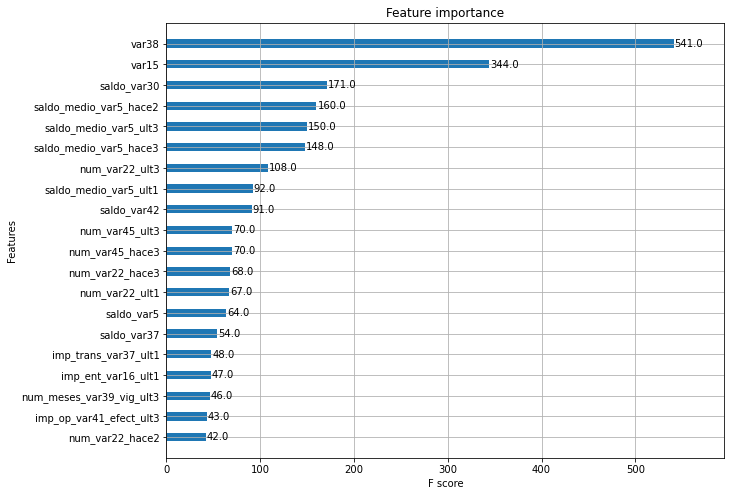

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [26]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[76]	training's auc: 0.928812	training's binary_logloss: 0.104032	valid_1's auc: 0.831078	valid_1's binary_logloss: 0.135819
[77]	training's auc: 0.929094	training's binary_logloss: 0.103841	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.135831
[78]	training's auc: 0.929304	training's binary_logloss: 0.103661	valid_1's auc: 0.831108	valid_1's binary_logloss: 0.135854
[79]	training's auc: 0.929558	training's binary_logloss: 0.103444	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.135942
[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83]	training's auc: 0.931024	training's binary_logloss: 0.102636	valid_1's auc: 0.831065	valid_1's binary_logloss: 0.135936
[8

In [23]:
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

In [24]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1], average='macro') 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [25]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials)

print('best:', best)

[1]	training's auc: 0.838563	training's binary_logloss: 0.155028	valid_1's auc: 0.808703	valid_1's binary_logloss: 0.157724
[2]	training's auc: 0.843952	training's binary_logloss: 0.149555	valid_1's auc: 0.812307	valid_1's binary_logloss: 0.153363
[3]	training's auc: 0.853273	training's binary_logloss: 0.145327	valid_1's auc: 0.818892	valid_1's binary_logloss: 0.149989
[4]	training's auc: 0.855389	training's binary_logloss: 0.141975	valid_1's auc: 0.821692	valid_1's binary_logloss: 0.147501
[5]	training's auc: 0.857782	training's binary_logloss: 0.139169	valid_1's auc: 0.823753	valid_1's binary_logloss: 0.145373
[6]	training's auc: 0.862377	training's binary_logloss: 0.13689	valid_1's auc: 0.826667	valid_1's binary_logloss: 0.143705
[7]	training's auc: 0.865134	training's binary_logloss: 0.134925	valid_1's auc: 0.827527	valid_1's binary_logloss: 0.142413
[8]	training's auc: 0.866814	training's binary_logloss: 0.133274	valid_1's auc: 0.828006	valid_1's binary_logloss: 0.141337
[9]	train

[16]	training's auc: 0.882886	training's binary_logloss: 0.126258	valid_1's auc: 0.833293	valid_1's binary_logloss: 0.13253
[17]	training's auc: 0.885057	training's binary_logloss: 0.125413	valid_1's auc: 0.833693	valid_1's binary_logloss: 0.132235
[18]	training's auc: 0.886853	training's binary_logloss: 0.124598	valid_1's auc: 0.834399	valid_1's binary_logloss: 0.131986
[19]	training's auc: 0.888349	training's binary_logloss: 0.123802	valid_1's auc: 0.834587	valid_1's binary_logloss: 0.131826
[20]	training's auc: 0.88971	training's binary_logloss: 0.123085	valid_1's auc: 0.834108	valid_1's binary_logloss: 0.131698
[21]	training's auc: 0.890956	training's binary_logloss: 0.122394	valid_1's auc: 0.834466	valid_1's binary_logloss: 0.131546
[22]	training's auc: 0.892324	training's binary_logloss: 0.121756	valid_1's auc: 0.834095	valid_1's binary_logloss: 0.13151
[23]	training's auc: 0.8939	training's binary_logloss: 0.121095	valid_1's auc: 0.834262	valid_1's binary_logloss: 0.131407
[24]	

[18]	training's auc: 0.885596	training's binary_logloss: 0.122216	valid_1's auc: 0.834279	valid_1's binary_logloss: 0.138014
[19]	training's auc: 0.887444	training's binary_logloss: 0.121506	valid_1's auc: 0.833901	valid_1's binary_logloss: 0.137903
[20]	training's auc: 0.889209	training's binary_logloss: 0.120731	valid_1's auc: 0.833753	valid_1's binary_logloss: 0.137782
[21]	training's auc: 0.891029	training's binary_logloss: 0.120033	valid_1's auc: 0.833379	valid_1's binary_logloss: 0.137701
[22]	training's auc: 0.892539	training's binary_logloss: 0.119385	valid_1's auc: 0.833495	valid_1's binary_logloss: 0.137644
[23]	training's auc: 0.893606	training's binary_logloss: 0.118763	valid_1's auc: 0.833595	valid_1's binary_logloss: 0.137563
[24]	training's auc: 0.89522	training's binary_logloss: 0.118127	valid_1's auc: 0.83365	valid_1's binary_logloss: 0.137479
[25]	training's auc: 0.896825	training's binary_logloss: 0.117548	valid_1's auc: 0.832837	valid_1's binary_logloss: 0.137517
[2

[35]	training's auc: 0.934199	training's binary_logloss: 0.101441	valid_1's auc: 0.823051	valid_1's binary_logloss: 0.138901
[36]	training's auc: 0.934744	training's binary_logloss: 0.100928	valid_1's auc: 0.822959	valid_1's binary_logloss: 0.139032
[37]	training's auc: 0.935363	training's binary_logloss: 0.100416	valid_1's auc: 0.822844	valid_1's binary_logloss: 0.139024
[38]	training's auc: 0.936436	training's binary_logloss: 0.0999333	valid_1's auc: 0.822614	valid_1's binary_logloss: 0.13908
[39]	training's auc: 0.936961	training's binary_logloss: 0.0994796	valid_1's auc: 0.82189	valid_1's binary_logloss: 0.139262
[1]	training's auc: 0.837353	training's binary_logloss: 0.152628	valid_1's auc: 0.819624	valid_1's binary_logloss: 0.14946
[2]	training's auc: 0.852904	training's binary_logloss: 0.145539	valid_1's auc: 0.829355	valid_1's binary_logloss: 0.144337
[3]	training's auc: 0.859515	training's binary_logloss: 0.140697	valid_1's auc: 0.829573	valid_1's binary_logloss: 0.141248
[4]	

[24]	training's auc: 0.920532	training's binary_logloss: 0.107696	valid_1's auc: 0.829307	valid_1's binary_logloss: 0.13821
[25]	training's auc: 0.922028	training's binary_logloss: 0.10695	valid_1's auc: 0.828585	valid_1's binary_logloss: 0.138435
[26]	training's auc: 0.924419	training's binary_logloss: 0.106239	valid_1's auc: 0.828843	valid_1's binary_logloss: 0.138437
[27]	training's auc: 0.926221	training's binary_logloss: 0.105397	valid_1's auc: 0.828181	valid_1's binary_logloss: 0.138583
[28]	training's auc: 0.927416	training's binary_logloss: 0.104675	valid_1's auc: 0.827391	valid_1's binary_logloss: 0.138806
[29]	training's auc: 0.928907	training's binary_logloss: 0.104116	valid_1's auc: 0.827476	valid_1's binary_logloss: 0.138872
[30]	training's auc: 0.930728	training's binary_logloss: 0.103321	valid_1's auc: 0.827137	valid_1's binary_logloss: 0.139
[31]	training's auc: 0.93164	training's binary_logloss: 0.102658	valid_1's auc: 0.826733	valid_1's binary_logloss: 0.139116
[32]	t

[43]	training's auc: 0.897542	training's binary_logloss: 0.118968	valid_1's auc: 0.830723	valid_1's binary_logloss: 0.136014
[44]	training's auc: 0.898253	training's binary_logloss: 0.118639	valid_1's auc: 0.830506	valid_1's binary_logloss: 0.13599
[45]	training's auc: 0.899035	training's binary_logloss: 0.118281	valid_1's auc: 0.83058	valid_1's binary_logloss: 0.135956
[46]	training's auc: 0.899985	training's binary_logloss: 0.117951	valid_1's auc: 0.830683	valid_1's binary_logloss: 0.135926
[47]	training's auc: 0.900636	training's binary_logloss: 0.117629	valid_1's auc: 0.830554	valid_1's binary_logloss: 0.135888
[48]	training's auc: 0.901561	training's binary_logloss: 0.117283	valid_1's auc: 0.830938	valid_1's binary_logloss: 0.135875
[49]	training's auc: 0.902288	training's binary_logloss: 0.11696	valid_1's auc: 0.83098	valid_1's binary_logloss: 0.135843
[50]	training's auc: 0.902962	training's binary_logloss: 0.11663	valid_1's auc: 0.83087	valid_1's binary_logloss: 0.135857
[51]	t

[36]	training's auc: 0.889024	training's binary_logloss: 0.123722	valid_1's auc: 0.833912	valid_1's binary_logloss: 0.131797
[37]	training's auc: 0.890172	training's binary_logloss: 0.123292	valid_1's auc: 0.834204	valid_1's binary_logloss: 0.131677
[38]	training's auc: 0.890872	training's binary_logloss: 0.122908	valid_1's auc: 0.834321	valid_1's binary_logloss: 0.131572
[39]	training's auc: 0.891583	training's binary_logloss: 0.122536	valid_1's auc: 0.834105	valid_1's binary_logloss: 0.131534
[40]	training's auc: 0.892444	training's binary_logloss: 0.122123	valid_1's auc: 0.834068	valid_1's binary_logloss: 0.131462
[41]	training's auc: 0.893346	training's binary_logloss: 0.121774	valid_1's auc: 0.834129	valid_1's binary_logloss: 0.131371
[42]	training's auc: 0.894206	training's binary_logloss: 0.121418	valid_1's auc: 0.834023	valid_1's binary_logloss: 0.131327
[43]	training's auc: 0.894854	training's binary_logloss: 0.121062	valid_1's auc: 0.834166	valid_1's binary_logloss: 0.13125
[

[57]	training's auc: 0.90695	training's binary_logloss: 0.114111	valid_1's auc: 0.834998	valid_1's binary_logloss: 0.136624
[58]	training's auc: 0.907929	training's binary_logloss: 0.11384	valid_1's auc: 0.835124	valid_1's binary_logloss: 0.136594
[59]	training's auc: 0.908734	training's binary_logloss: 0.113574	valid_1's auc: 0.835109	valid_1's binary_logloss: 0.136593
[60]	training's auc: 0.909405	training's binary_logloss: 0.113306	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.136598
[61]	training's auc: 0.910082	training's binary_logloss: 0.113029	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.136622
[62]	training's auc: 0.910924	training's binary_logloss: 0.112805	valid_1's auc: 0.834943	valid_1's binary_logloss: 0.136625
[63]	training's auc: 0.911386	training's binary_logloss: 0.11259	valid_1's auc: 0.835177	valid_1's binary_logloss: 0.136567
[64]	training's auc: 0.912073	training's binary_logloss: 0.112325	valid_1's auc: 0.83521	valid_1's binary_logloss: 0.136579
[65]

[22]	training's auc: 0.879467	training's binary_logloss: 0.127252	valid_1's auc: 0.827792	valid_1's binary_logloss: 0.1388
[23]	training's auc: 0.880436	training's binary_logloss: 0.126625	valid_1's auc: 0.82819	valid_1's binary_logloss: 0.138517
[24]	training's auc: 0.881594	training's binary_logloss: 0.126023	valid_1's auc: 0.828495	valid_1's binary_logloss: 0.138251
[25]	training's auc: 0.882873	training's binary_logloss: 0.125428	valid_1's auc: 0.828578	valid_1's binary_logloss: 0.138024
[26]	training's auc: 0.884336	training's binary_logloss: 0.1249	valid_1's auc: 0.829278	valid_1's binary_logloss: 0.137789
[27]	training's auc: 0.885363	training's binary_logloss: 0.124394	valid_1's auc: 0.829306	valid_1's binary_logloss: 0.137621
[28]	training's auc: 0.886181	training's binary_logloss: 0.123903	valid_1's auc: 0.829211	valid_1's binary_logloss: 0.137451
[29]	training's auc: 0.887617	training's binary_logloss: 0.123406	valid_1's auc: 0.829406	valid_1's binary_logloss: 0.137289
[30]	

[14]	training's auc: 0.867931	training's binary_logloss: 0.135728	valid_1's auc: 0.835786	valid_1's binary_logloss: 0.137038
[15]	training's auc: 0.869243	training's binary_logloss: 0.134785	valid_1's auc: 0.836178	valid_1's binary_logloss: 0.136426
[16]	training's auc: 0.870923	training's binary_logloss: 0.13388	valid_1's auc: 0.83623	valid_1's binary_logloss: 0.135901
[17]	training's auc: 0.871771	training's binary_logloss: 0.133058	valid_1's auc: 0.836037	valid_1's binary_logloss: 0.135466
[18]	training's auc: 0.872119	training's binary_logloss: 0.132289	valid_1's auc: 0.836247	valid_1's binary_logloss: 0.134951
[19]	training's auc: 0.873055	training's binary_logloss: 0.131546	valid_1's auc: 0.836204	valid_1's binary_logloss: 0.134544
[20]	training's auc: 0.874194	training's binary_logloss: 0.130854	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.134208
[21]	training's auc: 0.87521	training's binary_logloss: 0.130185	valid_1's auc: 0.836453	valid_1's binary_logloss: 0.13384
[22]

[27]	training's auc: 0.883388	training's binary_logloss: 0.123949	valid_1's auc: 0.834515	valid_1's binary_logloss: 0.138648
[28]	training's auc: 0.884403	training's binary_logloss: 0.123452	valid_1's auc: 0.835029	valid_1's binary_logloss: 0.138431
[29]	training's auc: 0.885557	training's binary_logloss: 0.122978	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.138211
[30]	training's auc: 0.886795	training's binary_logloss: 0.122525	valid_1's auc: 0.835458	valid_1's binary_logloss: 0.138069
[31]	training's auc: 0.887773	training's binary_logloss: 0.122042	valid_1's auc: 0.835092	valid_1's binary_logloss: 0.137935
[32]	training's auc: 0.888855	training's binary_logloss: 0.121598	valid_1's auc: 0.834923	valid_1's binary_logloss: 0.137806
[33]	training's auc: 0.889663	training's binary_logloss: 0.121139	valid_1's auc: 0.835064	valid_1's binary_logloss: 0.137647
[34]	training's auc: 0.890565	training's binary_logloss: 0.120741	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.137551


[32]	training's auc: 0.916676	training's binary_logloss: 0.111149	valid_1's auc: 0.826728	valid_1's binary_logloss: 0.136607
[33]	training's auc: 0.917932	training's binary_logloss: 0.110543	valid_1's auc: 0.826769	valid_1's binary_logloss: 0.136643
[34]	training's auc: 0.918977	training's binary_logloss: 0.110025	valid_1's auc: 0.826406	valid_1's binary_logloss: 0.136726
[35]	training's auc: 0.920107	training's binary_logloss: 0.109522	valid_1's auc: 0.82613	valid_1's binary_logloss: 0.136788
[36]	training's auc: 0.9211	training's binary_logloss: 0.109031	valid_1's auc: 0.826098	valid_1's binary_logloss: 0.136821
[37]	training's auc: 0.922069	training's binary_logloss: 0.108594	valid_1's auc: 0.825919	valid_1's binary_logloss: 0.136894
[38]	training's auc: 0.922851	training's binary_logloss: 0.108132	valid_1's auc: 0.826064	valid_1's binary_logloss: 0.136922
[39]	training's auc: 0.923567	training's binary_logloss: 0.107656	valid_1's auc: 0.825671	valid_1's binary_logloss: 0.137048
[40

[52]	training's auc: 0.934852	training's binary_logloss: 0.104197	valid_1's auc: 0.833634	valid_1's binary_logloss: 0.131455
[53]	training's auc: 0.935712	training's binary_logloss: 0.103775	valid_1's auc: 0.833405	valid_1's binary_logloss: 0.131512
[54]	training's auc: 0.936523	training's binary_logloss: 0.103393	valid_1's auc: 0.832959	valid_1's binary_logloss: 0.131587
[55]	training's auc: 0.937092	training's binary_logloss: 0.103021	valid_1's auc: 0.832953	valid_1's binary_logloss: 0.131646
[56]	training's auc: 0.937531	training's binary_logloss: 0.102668	valid_1's auc: 0.83297	valid_1's binary_logloss: 0.131678
[57]	training's auc: 0.938062	training's binary_logloss: 0.102417	valid_1's auc: 0.833001	valid_1's binary_logloss: 0.131704
[58]	training's auc: 0.938661	training's binary_logloss: 0.102013	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.13179
[59]	training's auc: 0.939205	training's binary_logloss: 0.101646	valid_1's auc: 0.832579	valid_1's binary_logloss: 0.131842
[6

[54]	training's auc: 0.937147	training's binary_logloss: 0.100585	valid_1's auc: 0.83325	valid_1's binary_logloss: 0.137525
[1]	training's auc: 0.833694	training's binary_logloss: 0.163414	valid_1's auc: 0.809096	valid_1's binary_logloss: 0.164488
[2]	training's auc: 0.834361	training's binary_logloss: 0.162315	valid_1's auc: 0.808991	valid_1's binary_logloss: 0.163587
[3]	training's auc: 0.834754	training's binary_logloss: 0.161281	valid_1's auc: 0.808939	valid_1's binary_logloss: 0.162741
[4]	training's auc: 0.835299	training's binary_logloss: 0.160314	valid_1's auc: 0.809127	valid_1's binary_logloss: 0.161937
[5]	training's auc: 0.83687	training's binary_logloss: 0.159395	valid_1's auc: 0.810793	valid_1's binary_logloss: 0.16116
[6]	training's auc: 0.837133	training's binary_logloss: 0.158529	valid_1's auc: 0.811154	valid_1's binary_logloss: 0.160419
[7]	training's auc: 0.838855	training's binary_logloss: 0.157695	valid_1's auc: 0.811904	valid_1's binary_logloss: 0.159741
[8]	traini

[65]	training's auc: 0.864471	training's binary_logloss: 0.135103	valid_1's auc: 0.828735	valid_1's binary_logloss: 0.142078
[66]	training's auc: 0.864527	training's binary_logloss: 0.134914	valid_1's auc: 0.828641	valid_1's binary_logloss: 0.141945
[67]	training's auc: 0.864613	training's binary_logloss: 0.134719	valid_1's auc: 0.828596	valid_1's binary_logloss: 0.141817
[68]	training's auc: 0.865017	training's binary_logloss: 0.134532	valid_1's auc: 0.828995	valid_1's binary_logloss: 0.141694
[69]	training's auc: 0.865114	training's binary_logloss: 0.134348	valid_1's auc: 0.829001	valid_1's binary_logloss: 0.141581
[70]	training's auc: 0.865298	training's binary_logloss: 0.134156	valid_1's auc: 0.829113	valid_1's binary_logloss: 0.141453
[71]	training's auc: 0.865612	training's binary_logloss: 0.133974	valid_1's auc: 0.829131	valid_1's binary_logloss: 0.141325
[72]	training's auc: 0.865806	training's binary_logloss: 0.133788	valid_1's auc: 0.829421	valid_1's binary_logloss: 0.141209


[30]	training's auc: 0.852124	training's binary_logloss: 0.147273	valid_1's auc: 0.830967	valid_1's binary_logloss: 0.144638
[31]	training's auc: 0.853242	training's binary_logloss: 0.146887	valid_1's auc: 0.831675	valid_1's binary_logloss: 0.144337
[32]	training's auc: 0.853414	training's binary_logloss: 0.146509	valid_1's auc: 0.831735	valid_1's binary_logloss: 0.144044
[33]	training's auc: 0.853535	training's binary_logloss: 0.146137	valid_1's auc: 0.831569	valid_1's binary_logloss: 0.143759
[34]	training's auc: 0.853669	training's binary_logloss: 0.145782	valid_1's auc: 0.831555	valid_1's binary_logloss: 0.143477
[35]	training's auc: 0.853909	training's binary_logloss: 0.145434	valid_1's auc: 0.831486	valid_1's binary_logloss: 0.143203
[36]	training's auc: 0.854438	training's binary_logloss: 0.145066	valid_1's auc: 0.831413	valid_1's binary_logloss: 0.142947
[37]	training's auc: 0.854563	training's binary_logloss: 0.144729	valid_1's auc: 0.831346	valid_1's binary_logloss: 0.142699


[95]	training's auc: 0.870249	training's binary_logloss: 0.132417	valid_1's auc: 0.83566	valid_1's binary_logloss: 0.134337
[96]	training's auc: 0.870376	training's binary_logloss: 0.132282	valid_1's auc: 0.835842	valid_1's binary_logloss: 0.134268
[97]	training's auc: 0.87054	training's binary_logloss: 0.132148	valid_1's auc: 0.835887	valid_1's binary_logloss: 0.134198
[98]	training's auc: 0.870713	training's binary_logloss: 0.132019	valid_1's auc: 0.835948	valid_1's binary_logloss: 0.134132
[99]	training's auc: 0.870973	training's binary_logloss: 0.131889	valid_1's auc: 0.835899	valid_1's binary_logloss: 0.134064
[100]	training's auc: 0.871147	training's binary_logloss: 0.131759	valid_1's auc: 0.835837	valid_1's binary_logloss: 0.134001
[1]	training's auc: 0.828355	training's binary_logloss: 0.161993	valid_1's auc: 0.80788	valid_1's binary_logloss: 0.16749
[2]	training's auc: 0.828849	training's binary_logloss: 0.160973	valid_1's auc: 0.809024	valid_1's binary_logloss: 0.166542
[3]	t

[60]	training's auc: 0.859815	training's binary_logloss: 0.135402	valid_1's auc: 0.831502	valid_1's binary_logloss: 0.144284
[61]	training's auc: 0.860195	training's binary_logloss: 0.135186	valid_1's auc: 0.831671	valid_1's binary_logloss: 0.144134
[62]	training's auc: 0.860508	training's binary_logloss: 0.134974	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.143987
[63]	training's auc: 0.860717	training's binary_logloss: 0.13478	valid_1's auc: 0.83192	valid_1's binary_logloss: 0.143835
[64]	training's auc: 0.860898	training's binary_logloss: 0.134585	valid_1's auc: 0.831858	valid_1's binary_logloss: 0.143703
[65]	training's auc: 0.861014	training's binary_logloss: 0.134387	valid_1's auc: 0.831781	valid_1's binary_logloss: 0.143578
[66]	training's auc: 0.861224	training's binary_logloss: 0.134191	valid_1's auc: 0.831704	valid_1's binary_logloss: 0.143434
[67]	training's auc: 0.861425	training's binary_logloss: 0.134002	valid_1's auc: 0.831687	valid_1's binary_logloss: 0.143303
[6

[25]	training's auc: 0.906425	training's binary_logloss: 0.113836	valid_1's auc: 0.827283	valid_1's binary_logloss: 0.136744
[26]	training's auc: 0.907521	training's binary_logloss: 0.113272	valid_1's auc: 0.826689	valid_1's binary_logloss: 0.136908
[27]	training's auc: 0.908354	training's binary_logloss: 0.112819	valid_1's auc: 0.825644	valid_1's binary_logloss: 0.137209
[28]	training's auc: 0.909115	training's binary_logloss: 0.11233	valid_1's auc: 0.825494	valid_1's binary_logloss: 0.137238
[29]	training's auc: 0.910123	training's binary_logloss: 0.11184	valid_1's auc: 0.825529	valid_1's binary_logloss: 0.137282
[30]	training's auc: 0.911027	training's binary_logloss: 0.11147	valid_1's auc: 0.824636	valid_1's binary_logloss: 0.137461
[31]	training's auc: 0.912056	training's binary_logloss: 0.110994	valid_1's auc: 0.823706	valid_1's binary_logloss: 0.137703
[32]	training's auc: 0.912997	training's binary_logloss: 0.110541	valid_1's auc: 0.823025	valid_1's binary_logloss: 0.137847
[33

[1]	training's auc: 0.827102	training's binary_logloss: 0.148005	valid_1's auc: 0.810175	valid_1's binary_logloss: 0.154407
[2]	training's auc: 0.843278	training's binary_logloss: 0.141593	valid_1's auc: 0.825701	valid_1's binary_logloss: 0.148376
[3]	training's auc: 0.849351	training's binary_logloss: 0.137108	valid_1's auc: 0.829571	valid_1's binary_logloss: 0.144764
[4]	training's auc: 0.851575	training's binary_logloss: 0.134015	valid_1's auc: 0.828744	valid_1's binary_logloss: 0.142623
[5]	training's auc: 0.857442	training's binary_logloss: 0.131571	valid_1's auc: 0.831328	valid_1's binary_logloss: 0.140931
[6]	training's auc: 0.860498	training's binary_logloss: 0.129737	valid_1's auc: 0.832092	valid_1's binary_logloss: 0.139672
[7]	training's auc: 0.866536	training's binary_logloss: 0.128067	valid_1's auc: 0.83478	valid_1's binary_logloss: 0.138864
[8]	training's auc: 0.869843	training's binary_logloss: 0.126689	valid_1's auc: 0.835239	valid_1's binary_logloss: 0.138262
[9]	train

[27]	training's auc: 0.901301	training's binary_logloss: 0.116524	valid_1's auc: 0.830188	valid_1's binary_logloss: 0.136127
[28]	training's auc: 0.902758	training's binary_logloss: 0.115984	valid_1's auc: 0.829862	valid_1's binary_logloss: 0.136213
[29]	training's auc: 0.90369	training's binary_logloss: 0.115545	valid_1's auc: 0.829852	valid_1's binary_logloss: 0.136236
[30]	training's auc: 0.905344	training's binary_logloss: 0.115058	valid_1's auc: 0.829901	valid_1's binary_logloss: 0.136235
[31]	training's auc: 0.907203	training's binary_logloss: 0.114619	valid_1's auc: 0.829785	valid_1's binary_logloss: 0.136271
[32]	training's auc: 0.908109	training's binary_logloss: 0.11418	valid_1's auc: 0.829596	valid_1's binary_logloss: 0.13633
[33]	training's auc: 0.909416	training's binary_logloss: 0.11367	valid_1's auc: 0.829794	valid_1's binary_logloss: 0.136293
[34]	training's auc: 0.910272	training's binary_logloss: 0.113267	valid_1's auc: 0.82921	valid_1's binary_logloss: 0.136407
[35]	

[38]	training's auc: 0.912613	training's binary_logloss: 0.113426	valid_1's auc: 0.835703	valid_1's binary_logloss: 0.130965
[39]	training's auc: 0.913374	training's binary_logloss: 0.113087	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.131057
[40]	training's auc: 0.914039	training's binary_logloss: 0.112712	valid_1's auc: 0.835435	valid_1's binary_logloss: 0.131053
[41]	training's auc: 0.915099	training's binary_logloss: 0.112266	valid_1's auc: 0.835518	valid_1's binary_logloss: 0.131037
[42]	training's auc: 0.915985	training's binary_logloss: 0.111929	valid_1's auc: 0.835106	valid_1's binary_logloss: 0.13112
[43]	training's auc: 0.916701	training's binary_logloss: 0.111588	valid_1's auc: 0.834771	valid_1's binary_logloss: 0.131204
[44]	training's auc: 0.917276	training's binary_logloss: 0.111248	valid_1's auc: 0.834397	valid_1's binary_logloss: 0.131279
[45]	training's auc: 0.918009	training's binary_logloss: 0.11094	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.131336
[4

[6]	training's auc: 0.862114	training's binary_logloss: 0.145185	valid_1's auc: 0.822857	valid_1's binary_logloss: 0.150227
[7]	training's auc: 0.863524	training's binary_logloss: 0.143294	valid_1's auc: 0.823592	valid_1's binary_logloss: 0.14887
[8]	training's auc: 0.864685	training's binary_logloss: 0.141612	valid_1's auc: 0.823895	valid_1's binary_logloss: 0.147686
[9]	training's auc: 0.865857	training's binary_logloss: 0.140116	valid_1's auc: 0.823863	valid_1's binary_logloss: 0.146712
[10]	training's auc: 0.867005	training's binary_logloss: 0.138709	valid_1's auc: 0.824919	valid_1's binary_logloss: 0.145705
[11]	training's auc: 0.868117	training's binary_logloss: 0.137399	valid_1's auc: 0.825417	valid_1's binary_logloss: 0.144828
[12]	training's auc: 0.86963	training's binary_logloss: 0.136245	valid_1's auc: 0.82611	valid_1's binary_logloss: 0.144025
[13]	training's auc: 0.870661	training's binary_logloss: 0.135136	valid_1's auc: 0.825548	valid_1's binary_logloss: 0.143356
[14]	tr

[71]	training's auc: 0.921806	training's binary_logloss: 0.109401	valid_1's auc: 0.831085	valid_1's binary_logloss: 0.135938
[72]	training's auc: 0.922327	training's binary_logloss: 0.109166	valid_1's auc: 0.83077	valid_1's binary_logloss: 0.136012
[73]	training's auc: 0.922805	training's binary_logloss: 0.108942	valid_1's auc: 0.830416	valid_1's binary_logloss: 0.136096
[74]	training's auc: 0.923396	training's binary_logloss: 0.108733	valid_1's auc: 0.830172	valid_1's binary_logloss: 0.136148
[75]	training's auc: 0.923896	training's binary_logloss: 0.108498	valid_1's auc: 0.829763	valid_1's binary_logloss: 0.136233
[76]	training's auc: 0.92456	training's binary_logloss: 0.108264	valid_1's auc: 0.829719	valid_1's binary_logloss: 0.136245
[77]	training's auc: 0.925146	training's binary_logloss: 0.108015	valid_1's auc: 0.829829	valid_1's binary_logloss: 0.136246
[78]	training's auc: 0.925713	training's binary_logloss: 0.10779	valid_1's auc: 0.829765	valid_1's binary_logloss: 0.136258
[79

[54]	training's auc: 0.909063	training's binary_logloss: 0.11575	valid_1's auc: 0.832727	valid_1's binary_logloss: 0.131353
[55]	training's auc: 0.909634	training's binary_logloss: 0.115467	valid_1's auc: 0.832969	valid_1's binary_logloss: 0.1313
[56]	training's auc: 0.910429	training's binary_logloss: 0.115166	valid_1's auc: 0.833109	valid_1's binary_logloss: 0.131254
[57]	training's auc: 0.911317	training's binary_logloss: 0.114857	valid_1's auc: 0.832946	valid_1's binary_logloss: 0.131251
[1]	training's auc: 0.839741	training's binary_logloss: 0.15834	valid_1's auc: 0.81608	valid_1's binary_logloss: 0.164335
[2]	training's auc: 0.84398	training's binary_logloss: 0.154573	valid_1's auc: 0.822109	valid_1's binary_logloss: 0.16099
[3]	training's auc: 0.846345	training's binary_logloss: 0.151459	valid_1's auc: 0.823026	valid_1's binary_logloss: 0.158153
[4]	training's auc: 0.852774	training's binary_logloss: 0.148771	valid_1's auc: 0.824887	valid_1's binary_logloss: 0.155845
[5]	trainin

[62]	training's auc: 0.915568	training's binary_logloss: 0.110925	valid_1's auc: 0.833575	valid_1's binary_logloss: 0.137001
[1]	training's auc: 0.835296	training's binary_logloss: 0.153353	valid_1's auc: 0.811409	valid_1's binary_logloss: 0.156151
[2]	training's auc: 0.840515	training's binary_logloss: 0.147581	valid_1's auc: 0.811832	valid_1's binary_logloss: 0.151519
[3]	training's auc: 0.848596	training's binary_logloss: 0.143184	valid_1's auc: 0.818057	valid_1's binary_logloss: 0.148074
[4]	training's auc: 0.853448	training's binary_logloss: 0.139826	valid_1's auc: 0.822196	valid_1's binary_logloss: 0.145441
[5]	training's auc: 0.858175	training's binary_logloss: 0.137072	valid_1's auc: 0.823126	valid_1's binary_logloss: 0.14359
[6]	training's auc: 0.861592	training's binary_logloss: 0.134874	valid_1's auc: 0.824529	valid_1's binary_logloss: 0.142002
[7]	training's auc: 0.864283	training's binary_logloss: 0.133069	valid_1's auc: 0.826967	valid_1's binary_logloss: 0.140818
[8]	trai

[15]	training's auc: 0.878959	training's binary_logloss: 0.126185	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.131839
[16]	training's auc: 0.88126	training's binary_logloss: 0.125337	valid_1's auc: 0.834939	valid_1's binary_logloss: 0.131608
[17]	training's auc: 0.883142	training's binary_logloss: 0.12454	valid_1's auc: 0.83484	valid_1's binary_logloss: 0.131481
[18]	training's auc: 0.88443	training's binary_logloss: 0.123856	valid_1's auc: 0.835626	valid_1's binary_logloss: 0.131238
[19]	training's auc: 0.885764	training's binary_logloss: 0.123215	valid_1's auc: 0.835324	valid_1's binary_logloss: 0.131135
[20]	training's auc: 0.887577	training's binary_logloss: 0.122597	valid_1's auc: 0.835609	valid_1's binary_logloss: 0.131012
[21]	training's auc: 0.888989	training's binary_logloss: 0.122038	valid_1's auc: 0.835499	valid_1's binary_logloss: 0.130917
[22]	training's auc: 0.890614	training's binary_logloss: 0.121424	valid_1's auc: 0.835666	valid_1's binary_logloss: 0.130815
[23]

[21]	training's auc: 0.891217	training's binary_logloss: 0.119325	valid_1's auc: 0.835198	valid_1's binary_logloss: 0.136658
[22]	training's auc: 0.892641	training's binary_logloss: 0.118718	valid_1's auc: 0.834434	valid_1's binary_logloss: 0.136714
[23]	training's auc: 0.894465	training's binary_logloss: 0.1182	valid_1's auc: 0.834094	valid_1's binary_logloss: 0.136703
[24]	training's auc: 0.895709	training's binary_logloss: 0.117693	valid_1's auc: 0.834284	valid_1's binary_logloss: 0.136627
[25]	training's auc: 0.897234	training's binary_logloss: 0.117171	valid_1's auc: 0.833897	valid_1's binary_logloss: 0.13669
[26]	training's auc: 0.898494	training's binary_logloss: 0.116671	valid_1's auc: 0.834362	valid_1's binary_logloss: 0.136589
[27]	training's auc: 0.899869	training's binary_logloss: 0.116196	valid_1's auc: 0.834271	valid_1's binary_logloss: 0.136671
[28]	training's auc: 0.901084	training's binary_logloss: 0.11572	valid_1's auc: 0.834504	valid_1's binary_logloss: 0.136626
[29]

[4]	training's auc: 0.859324	training's binary_logloss: 0.137612	valid_1's auc: 0.832552	valid_1's binary_logloss: 0.138267
[5]	training's auc: 0.865918	training's binary_logloss: 0.134706	valid_1's auc: 0.833007	valid_1's binary_logloss: 0.136598
[6]	training's auc: 0.869341	training's binary_logloss: 0.132432	valid_1's auc: 0.832934	valid_1's binary_logloss: 0.135269
[7]	training's auc: 0.872552	training's binary_logloss: 0.130531	valid_1's auc: 0.832514	valid_1's binary_logloss: 0.134512
[8]	training's auc: 0.874971	training's binary_logloss: 0.1289	valid_1's auc: 0.832196	valid_1's binary_logloss: 0.133889
[9]	training's auc: 0.876936	training's binary_logloss: 0.127486	valid_1's auc: 0.83187	valid_1's binary_logloss: 0.133365
[10]	training's auc: 0.879311	training's binary_logloss: 0.126219	valid_1's auc: 0.833248	valid_1's binary_logloss: 0.132752
[11]	training's auc: 0.882262	training's binary_logloss: 0.124905	valid_1's auc: 0.833271	valid_1's binary_logloss: 0.132419
[12]	trai

[26]	training's auc: 0.916259	training's binary_logloss: 0.109536	valid_1's auc: 0.831514	valid_1's binary_logloss: 0.137821
[27]	training's auc: 0.917473	training's binary_logloss: 0.108874	valid_1's auc: 0.83103	valid_1's binary_logloss: 0.138011
[28]	training's auc: 0.918377	training's binary_logloss: 0.108349	valid_1's auc: 0.83083	valid_1's binary_logloss: 0.13808
[29]	training's auc: 0.919882	training's binary_logloss: 0.107726	valid_1's auc: 0.830515	valid_1's binary_logloss: 0.138198
[30]	training's auc: 0.921006	training's binary_logloss: 0.107166	valid_1's auc: 0.830037	valid_1's binary_logloss: 0.138317
[31]	training's auc: 0.922088	training's binary_logloss: 0.106604	valid_1's auc: 0.829891	valid_1's binary_logloss: 0.138419
[32]	training's auc: 0.923558	training's binary_logloss: 0.106007	valid_1's auc: 0.829638	valid_1's binary_logloss: 0.13846
[33]	training's auc: 0.924394	training's binary_logloss: 0.105474	valid_1's auc: 0.829134	valid_1's binary_logloss: 0.138608
[34]

[45]	training's auc: 0.898323	training's binary_logloss: 0.120066	valid_1's auc: 0.830276	valid_1's binary_logloss: 0.136717
[46]	training's auc: 0.898913	training's binary_logloss: 0.119721	valid_1's auc: 0.830308	valid_1's binary_logloss: 0.136636
[47]	training's auc: 0.899493	training's binary_logloss: 0.119393	valid_1's auc: 0.830276	valid_1's binary_logloss: 0.136557
[48]	training's auc: 0.90008	training's binary_logloss: 0.119063	valid_1's auc: 0.830446	valid_1's binary_logloss: 0.136479
[49]	training's auc: 0.900651	training's binary_logloss: 0.118747	valid_1's auc: 0.830167	valid_1's binary_logloss: 0.13644
[50]	training's auc: 0.901497	training's binary_logloss: 0.118417	valid_1's auc: 0.829645	valid_1's binary_logloss: 0.136429
[51]	training's auc: 0.902391	training's binary_logloss: 0.118081	valid_1's auc: 0.82997	valid_1's binary_logloss: 0.13635
[52]	training's auc: 0.90303	training's binary_logloss: 0.117732	valid_1's auc: 0.830259	valid_1's binary_logloss: 0.136268
[53]	

[45]	training's auc: 0.895783	training's binary_logloss: 0.122233	valid_1's auc: 0.834185	valid_1's binary_logloss: 0.131958
[46]	training's auc: 0.896326	training's binary_logloss: 0.12187	valid_1's auc: 0.83424	valid_1's binary_logloss: 0.131858
[47]	training's auc: 0.897093	training's binary_logloss: 0.12151	valid_1's auc: 0.834296	valid_1's binary_logloss: 0.131761
[48]	training's auc: 0.898027	training's binary_logloss: 0.121159	valid_1's auc: 0.83486	valid_1's binary_logloss: 0.131684
[49]	training's auc: 0.898582	training's binary_logloss: 0.120815	valid_1's auc: 0.8352	valid_1's binary_logloss: 0.131577
[50]	training's auc: 0.899145	training's binary_logloss: 0.120477	valid_1's auc: 0.835512	valid_1's binary_logloss: 0.131469
[51]	training's auc: 0.899681	training's binary_logloss: 0.120143	valid_1's auc: 0.835413	valid_1's binary_logloss: 0.131414
[52]	training's auc: 0.900513	training's binary_logloss: 0.119832	valid_1's auc: 0.835365	valid_1's binary_logloss: 0.131343
[53]	t

[52]	training's auc: 0.902167	training's binary_logloss: 0.117092	valid_1's auc: 0.836053	valid_1's binary_logloss: 0.137143
[53]	training's auc: 0.902876	training's binary_logloss: 0.116787	valid_1's auc: 0.836194	valid_1's binary_logloss: 0.13706
[54]	training's auc: 0.903431	training's binary_logloss: 0.116476	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.137019
[55]	training's auc: 0.904129	training's binary_logloss: 0.116162	valid_1's auc: 0.836244	valid_1's binary_logloss: 0.136965
[56]	training's auc: 0.904671	training's binary_logloss: 0.11587	valid_1's auc: 0.835992	valid_1's binary_logloss: 0.13695
[57]	training's auc: 0.905171	training's binary_logloss: 0.115597	valid_1's auc: 0.83622	valid_1's binary_logloss: 0.13689
[58]	training's auc: 0.905589	training's binary_logloss: 0.11531	valid_1's auc: 0.836368	valid_1's binary_logloss: 0.136824
[59]	training's auc: 0.906229	training's binary_logloss: 0.115022	valid_1's auc: 0.836453	valid_1's binary_logloss: 0.136774
[60]	t

[44]	training's auc: 0.918049	training's binary_logloss: 0.109491	valid_1's auc: 0.824757	valid_1's binary_logloss: 0.137687
[45]	training's auc: 0.918669	training's binary_logloss: 0.109118	valid_1's auc: 0.824441	valid_1's binary_logloss: 0.137715
[46]	training's auc: 0.91915	training's binary_logloss: 0.10884	valid_1's auc: 0.824401	valid_1's binary_logloss: 0.137794
[47]	training's auc: 0.919692	training's binary_logloss: 0.108524	valid_1's auc: 0.8243	valid_1's binary_logloss: 0.137827
[48]	training's auc: 0.920311	training's binary_logloss: 0.108193	valid_1's auc: 0.823632	valid_1's binary_logloss: 0.137985
[49]	training's auc: 0.920686	training's binary_logloss: 0.107927	valid_1's auc: 0.823526	valid_1's binary_logloss: 0.138028
[1]	training's auc: 0.826374	training's binary_logloss: 0.155306	valid_1's auc: 0.813652	valid_1's binary_logloss: 0.151111
[2]	training's auc: 0.837374	training's binary_logloss: 0.148942	valid_1's auc: 0.822264	valid_1's binary_logloss: 0.146047
[3]	tr

[60]	training's auc: 0.926568	training's binary_logloss: 0.106243	valid_1's auc: 0.829666	valid_1's binary_logloss: 0.132757
[61]	training's auc: 0.927012	training's binary_logloss: 0.105967	valid_1's auc: 0.829633	valid_1's binary_logloss: 0.132816
[62]	training's auc: 0.927557	training's binary_logloss: 0.105687	valid_1's auc: 0.829741	valid_1's binary_logloss: 0.132783
[1]	training's auc: 0.827193	training's binary_logloss: 0.151845	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.158352
[2]	training's auc: 0.838004	training's binary_logloss: 0.145626	valid_1's auc: 0.815053	valid_1's binary_logloss: 0.152809
[3]	training's auc: 0.847493	training's binary_logloss: 0.141207	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.149007
[4]	training's auc: 0.85082	training's binary_logloss: 0.137766	valid_1's auc: 0.826496	valid_1's binary_logloss: 0.14623
[5]	training's auc: 0.852678	training's binary_logloss: 0.135068	valid_1's auc: 0.827162	valid_1's binary_logloss: 0.144192
[6]	tra

[16]	training's auc: 0.861256	training's binary_logloss: 0.146375	valid_1's auc: 0.822548	valid_1's binary_logloss: 0.151023
[17]	training's auc: 0.861618	training's binary_logloss: 0.145662	valid_1's auc: 0.822728	valid_1's binary_logloss: 0.150487
[18]	training's auc: 0.862042	training's binary_logloss: 0.144968	valid_1's auc: 0.823569	valid_1's binary_logloss: 0.149964
[19]	training's auc: 0.862651	training's binary_logloss: 0.144305	valid_1's auc: 0.823938	valid_1's binary_logloss: 0.149484
[20]	training's auc: 0.862969	training's binary_logloss: 0.143677	valid_1's auc: 0.824681	valid_1's binary_logloss: 0.148989
[21]	training's auc: 0.863248	training's binary_logloss: 0.143074	valid_1's auc: 0.824607	valid_1's binary_logloss: 0.148548
[22]	training's auc: 0.863976	training's binary_logloss: 0.142458	valid_1's auc: 0.825229	valid_1's binary_logloss: 0.14811
[23]	training's auc: 0.864461	training's binary_logloss: 0.14188	valid_1's auc: 0.825583	valid_1's binary_logloss: 0.147687
[2

[81]	training's auc: 0.889547	training's binary_logloss: 0.124033	valid_1's auc: 0.832018	valid_1's binary_logloss: 0.137343
[82]	training's auc: 0.889851	training's binary_logloss: 0.123858	valid_1's auc: 0.831863	valid_1's binary_logloss: 0.137293
[83]	training's auc: 0.890114	training's binary_logloss: 0.123682	valid_1's auc: 0.831766	valid_1's binary_logloss: 0.13725
[84]	training's auc: 0.890476	training's binary_logloss: 0.123501	valid_1's auc: 0.831722	valid_1's binary_logloss: 0.137201
[85]	training's auc: 0.890784	training's binary_logloss: 0.123318	valid_1's auc: 0.831749	valid_1's binary_logloss: 0.137141
[86]	training's auc: 0.891085	training's binary_logloss: 0.123142	valid_1's auc: 0.831726	valid_1's binary_logloss: 0.137095
[87]	training's auc: 0.891446	training's binary_logloss: 0.122957	valid_1's auc: 0.831696	valid_1's binary_logloss: 0.137047
[88]	training's auc: 0.891804	training's binary_logloss: 0.122782	valid_1's auc: 0.831546	valid_1's binary_logloss: 0.137011
[

[46]	training's auc: 0.874423	training's binary_logloss: 0.134385	valid_1's auc: 0.835303	valid_1's binary_logloss: 0.136703
[47]	training's auc: 0.874698	training's binary_logloss: 0.134079	valid_1's auc: 0.835181	valid_1's binary_logloss: 0.136529
[48]	training's auc: 0.875152	training's binary_logloss: 0.13377	valid_1's auc: 0.835195	valid_1's binary_logloss: 0.136352
[49]	training's auc: 0.875446	training's binary_logloss: 0.133467	valid_1's auc: 0.835144	valid_1's binary_logloss: 0.136172
[50]	training's auc: 0.875802	training's binary_logloss: 0.133171	valid_1's auc: 0.835064	valid_1's binary_logloss: 0.136009
[51]	training's auc: 0.87616	training's binary_logloss: 0.132881	valid_1's auc: 0.835079	valid_1's binary_logloss: 0.135851
[52]	training's auc: 0.876523	training's binary_logloss: 0.132604	valid_1's auc: 0.835142	valid_1's binary_logloss: 0.135698
[53]	training's auc: 0.876885	training's binary_logloss: 0.132338	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.135549
[5

[19]	training's auc: 0.860822	training's binary_logloss: 0.143404	valid_1's auc: 0.828347	valid_1's binary_logloss: 0.151485
[20]	training's auc: 0.861322	training's binary_logloss: 0.142766	valid_1's auc: 0.828689	valid_1's binary_logloss: 0.150963
[21]	training's auc: 0.861731	training's binary_logloss: 0.142158	valid_1's auc: 0.828941	valid_1's binary_logloss: 0.150477
[22]	training's auc: 0.862069	training's binary_logloss: 0.14157	valid_1's auc: 0.828889	valid_1's binary_logloss: 0.15001
[23]	training's auc: 0.863086	training's binary_logloss: 0.141004	valid_1's auc: 0.829237	valid_1's binary_logloss: 0.149555
[24]	training's auc: 0.86388	training's binary_logloss: 0.140448	valid_1's auc: 0.829223	valid_1's binary_logloss: 0.14911
[25]	training's auc: 0.864111	training's binary_logloss: 0.139914	valid_1's auc: 0.829439	valid_1's binary_logloss: 0.148693
[26]	training's auc: 0.86467	training's binary_logloss: 0.139384	valid_1's auc: 0.829445	valid_1's binary_logloss: 0.148312
[27]	

[84]	training's auc: 0.888847	training's binary_logloss: 0.122952	valid_1's auc: 0.835656	valid_1's binary_logloss: 0.138372
[85]	training's auc: 0.88916	training's binary_logloss: 0.122774	valid_1's auc: 0.835613	valid_1's binary_logloss: 0.138309
[86]	training's auc: 0.88954	training's binary_logloss: 0.122604	valid_1's auc: 0.83567	valid_1's binary_logloss: 0.138249
[87]	training's auc: 0.88975	training's binary_logloss: 0.122442	valid_1's auc: 0.835787	valid_1's binary_logloss: 0.138177
[88]	training's auc: 0.890152	training's binary_logloss: 0.122259	valid_1's auc: 0.835831	valid_1's binary_logloss: 0.13813
[89]	training's auc: 0.890378	training's binary_logloss: 0.122099	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.138062
[90]	training's auc: 0.890897	training's binary_logloss: 0.121916	valid_1's auc: 0.835931	valid_1's binary_logloss: 0.138007
[91]	training's auc: 0.891239	training's binary_logloss: 0.121741	valid_1's auc: 0.83601	valid_1's binary_logloss: 0.137951
[92]	t

[7]	training's auc: 0.870656	training's binary_logloss: 0.133218	valid_1's auc: 0.835163	valid_1's binary_logloss: 0.135625
[8]	training's auc: 0.872597	training's binary_logloss: 0.131486	valid_1's auc: 0.834559	valid_1's binary_logloss: 0.134823
[9]	training's auc: 0.874995	training's binary_logloss: 0.129924	valid_1's auc: 0.83441	valid_1's binary_logloss: 0.134089
[10]	training's auc: 0.877575	training's binary_logloss: 0.128536	valid_1's auc: 0.834808	valid_1's binary_logloss: 0.133496
[11]	training's auc: 0.879216	training's binary_logloss: 0.127288	valid_1's auc: 0.83486	valid_1's binary_logloss: 0.133007
[12]	training's auc: 0.881833	training's binary_logloss: 0.126132	valid_1's auc: 0.835135	valid_1's binary_logloss: 0.132537
[13]	training's auc: 0.884136	training's binary_logloss: 0.124974	valid_1's auc: 0.834786	valid_1's binary_logloss: 0.132245
[14]	training's auc: 0.886132	training's binary_logloss: 0.123993	valid_1's auc: 0.835039	valid_1's binary_logloss: 0.131996
[15]	

[35]	training's auc: 0.921582	training's binary_logloss: 0.107448	valid_1's auc: 0.829493	valid_1's binary_logloss: 0.138016
[36]	training's auc: 0.922668	training's binary_logloss: 0.106921	valid_1's auc: 0.829159	valid_1's binary_logloss: 0.138143
[37]	training's auc: 0.923682	training's binary_logloss: 0.106366	valid_1's auc: 0.829095	valid_1's binary_logloss: 0.138226
[38]	training's auc: 0.924443	training's binary_logloss: 0.105946	valid_1's auc: 0.829484	valid_1's binary_logloss: 0.138191
[39]	training's auc: 0.925022	training's binary_logloss: 0.105523	valid_1's auc: 0.82937	valid_1's binary_logloss: 0.138249
[40]	training's auc: 0.925809	training's binary_logloss: 0.105044	valid_1's auc: 0.829106	valid_1's binary_logloss: 0.138324
[41]	training's auc: 0.926941	training's binary_logloss: 0.104574	valid_1's auc: 0.82903	valid_1's binary_logloss: 0.138341
[42]	training's auc: 0.927743	training's binary_logloss: 0.104106	valid_1's auc: 0.828687	valid_1's binary_logloss: 0.138466
[4

[55]	training's auc: 0.863298	training's binary_logloss: 0.13399	valid_1's auc: 0.828432	valid_1's binary_logloss: 0.141092
[56]	training's auc: 0.863671	training's binary_logloss: 0.133764	valid_1's auc: 0.828496	valid_1's binary_logloss: 0.140931
[57]	training's auc: 0.864428	training's binary_logloss: 0.133543	valid_1's auc: 0.828536	valid_1's binary_logloss: 0.140777
[58]	training's auc: 0.864811	training's binary_logloss: 0.133328	valid_1's auc: 0.828406	valid_1's binary_logloss: 0.140624
[59]	training's auc: 0.865055	training's binary_logloss: 0.133119	valid_1's auc: 0.828555	valid_1's binary_logloss: 0.14048
[60]	training's auc: 0.865374	training's binary_logloss: 0.132907	valid_1's auc: 0.828711	valid_1's binary_logloss: 0.140348
[61]	training's auc: 0.865753	training's binary_logloss: 0.132685	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.140221
[62]	training's auc: 0.866245	training's binary_logloss: 0.132474	valid_1's auc: 0.828976	valid_1's binary_logloss: 0.140084
[6

[20]	training's auc: 0.849119	training's binary_logloss: 0.148787	valid_1's auc: 0.830276	valid_1's binary_logloss: 0.145659
[21]	training's auc: 0.849537	training's binary_logloss: 0.148238	valid_1's auc: 0.830621	valid_1's binary_logloss: 0.145203
[22]	training's auc: 0.849756	training's binary_logloss: 0.147706	valid_1's auc: 0.830692	valid_1's binary_logloss: 0.144794
[23]	training's auc: 0.850344	training's binary_logloss: 0.14719	valid_1's auc: 0.830744	valid_1's binary_logloss: 0.144394
[24]	training's auc: 0.850646	training's binary_logloss: 0.146691	valid_1's auc: 0.830748	valid_1's binary_logloss: 0.144009
[25]	training's auc: 0.851745	training's binary_logloss: 0.146215	valid_1's auc: 0.83133	valid_1's binary_logloss: 0.143655
[26]	training's auc: 0.851883	training's binary_logloss: 0.145752	valid_1's auc: 0.831135	valid_1's binary_logloss: 0.143296
[27]	training's auc: 0.852392	training's binary_logloss: 0.145282	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.142936
[28

[85]	training's auc: 0.871574	training's binary_logloss: 0.130779	valid_1's auc: 0.835402	valid_1's binary_logloss: 0.133188
[86]	training's auc: 0.871782	training's binary_logloss: 0.130631	valid_1's auc: 0.83542	valid_1's binary_logloss: 0.133117
[87]	training's auc: 0.871965	training's binary_logloss: 0.130496	valid_1's auc: 0.835511	valid_1's binary_logloss: 0.133046
[88]	training's auc: 0.872129	training's binary_logloss: 0.130357	valid_1's auc: 0.835631	valid_1's binary_logloss: 0.132975
[89]	training's auc: 0.872376	training's binary_logloss: 0.13022	valid_1's auc: 0.835553	valid_1's binary_logloss: 0.132911
[90]	training's auc: 0.872577	training's binary_logloss: 0.130092	valid_1's auc: 0.835716	valid_1's binary_logloss: 0.132852
[91]	training's auc: 0.872792	training's binary_logloss: 0.129957	valid_1's auc: 0.83573	valid_1's binary_logloss: 0.132792
[92]	training's auc: 0.872786	training's binary_logloss: 0.129826	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.132733
[93

[50]	training's auc: 0.859005	training's binary_logloss: 0.134428	valid_1's auc: 0.832208	valid_1's binary_logloss: 0.143196
[51]	training's auc: 0.859419	training's binary_logloss: 0.134179	valid_1's auc: 0.832225	valid_1's binary_logloss: 0.143031
[52]	training's auc: 0.859798	training's binary_logloss: 0.133935	valid_1's auc: 0.832302	valid_1's binary_logloss: 0.142844
[53]	training's auc: 0.860087	training's binary_logloss: 0.133699	valid_1's auc: 0.832427	valid_1's binary_logloss: 0.142671
[54]	training's auc: 0.860469	training's binary_logloss: 0.133474	valid_1's auc: 0.832574	valid_1's binary_logloss: 0.142505
[55]	training's auc: 0.860664	training's binary_logloss: 0.133257	valid_1's auc: 0.832624	valid_1's binary_logloss: 0.142341
[56]	training's auc: 0.860972	training's binary_logloss: 0.133027	valid_1's auc: 0.832727	valid_1's binary_logloss: 0.142188
[57]	training's auc: 0.861549	training's binary_logloss: 0.132811	valid_1's auc: 0.832895	valid_1's binary_logloss: 0.142037


[15]	training's auc: 0.910538	training's binary_logloss: 0.112277	valid_1's auc: 0.822999	valid_1's binary_logloss: 0.137771
[16]	training's auc: 0.912839	training's binary_logloss: 0.111167	valid_1's auc: 0.822096	valid_1's binary_logloss: 0.138041
[17]	training's auc: 0.916086	training's binary_logloss: 0.110083	valid_1's auc: 0.821368	valid_1's binary_logloss: 0.138265
[18]	training's auc: 0.91892	training's binary_logloss: 0.10904	valid_1's auc: 0.821409	valid_1's binary_logloss: 0.138304
[19]	training's auc: 0.921174	training's binary_logloss: 0.108057	valid_1's auc: 0.820797	valid_1's binary_logloss: 0.138468
[20]	training's auc: 0.923132	training's binary_logloss: 0.107043	valid_1's auc: 0.819973	valid_1's binary_logloss: 0.138757
[21]	training's auc: 0.924948	training's binary_logloss: 0.106157	valid_1's auc: 0.819733	valid_1's binary_logloss: 0.138956
[22]	training's auc: 0.926937	training's binary_logloss: 0.10527	valid_1's auc: 0.818606	valid_1's binary_logloss: 0.139228
[23

[41]	training's auc: 0.949731	training's binary_logloss: 0.0940074	valid_1's auc: 0.824033	valid_1's binary_logloss: 0.135406
[42]	training's auc: 0.950342	training's binary_logloss: 0.0935472	valid_1's auc: 0.8238	valid_1's binary_logloss: 0.135448
[43]	training's auc: 0.951495	training's binary_logloss: 0.09297	valid_1's auc: 0.823838	valid_1's binary_logloss: 0.135568
[44]	training's auc: 0.951944	training's binary_logloss: 0.0926154	valid_1's auc: 0.823238	valid_1's binary_logloss: 0.135826
[45]	training's auc: 0.952353	training's binary_logloss: 0.0921647	valid_1's auc: 0.823382	valid_1's binary_logloss: 0.135873
[46]	training's auc: 0.952618	training's binary_logloss: 0.0917671	valid_1's auc: 0.823425	valid_1's binary_logloss: 0.135961
[1]	training's auc: 0.839924	training's binary_logloss: 0.146774	valid_1's auc: 0.816028	valid_1's binary_logloss: 0.154585
[2]	training's auc: 0.853571	training's binary_logloss: 0.139718	valid_1's auc: 0.823383	valid_1's binary_logloss: 0.148849


[20]	training's auc: 0.888418	training's binary_logloss: 0.125298	valid_1's auc: 0.82989	valid_1's binary_logloss: 0.138054
[21]	training's auc: 0.889618	training's binary_logloss: 0.124605	valid_1's auc: 0.829735	valid_1's binary_logloss: 0.137824
[22]	training's auc: 0.890709	training's binary_logloss: 0.123923	valid_1's auc: 0.830513	valid_1's binary_logloss: 0.137546
[23]	training's auc: 0.891831	training's binary_logloss: 0.12326	valid_1's auc: 0.830471	valid_1's binary_logloss: 0.137309
[24]	training's auc: 0.893002	training's binary_logloss: 0.12264	valid_1's auc: 0.829941	valid_1's binary_logloss: 0.137233
[25]	training's auc: 0.893954	training's binary_logloss: 0.122033	valid_1's auc: 0.830069	valid_1's binary_logloss: 0.137069
[26]	training's auc: 0.895089	training's binary_logloss: 0.121445	valid_1's auc: 0.830355	valid_1's binary_logloss: 0.13689
[27]	training's auc: 0.89617	training's binary_logloss: 0.120839	valid_1's auc: 0.830322	valid_1's binary_logloss: 0.13679
[28]	t

[33]	training's auc: 0.900459	training's binary_logloss: 0.11951	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.131568
[34]	training's auc: 0.901425	training's binary_logloss: 0.119018	valid_1's auc: 0.833527	valid_1's binary_logloss: 0.1315
[35]	training's auc: 0.902733	training's binary_logloss: 0.118514	valid_1's auc: 0.83386	valid_1's binary_logloss: 0.131421
[36]	training's auc: 0.903896	training's binary_logloss: 0.118027	valid_1's auc: 0.833813	valid_1's binary_logloss: 0.131385
[37]	training's auc: 0.904954	training's binary_logloss: 0.11756	valid_1's auc: 0.834128	valid_1's binary_logloss: 0.131303
[38]	training's auc: 0.906161	training's binary_logloss: 0.117085	valid_1's auc: 0.834148	valid_1's binary_logloss: 0.131258
[39]	training's auc: 0.907121	training's binary_logloss: 0.116658	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.131202
[40]	training's auc: 0.908355	training's binary_logloss: 0.116214	valid_1's auc: 0.83445	valid_1's binary_logloss: 0.131165
[41]	tr

[26]	training's auc: 0.893407	training's binary_logloss: 0.120943	valid_1's auc: 0.833479	valid_1's binary_logloss: 0.138053
[27]	training's auc: 0.894652	training's binary_logloss: 0.120365	valid_1's auc: 0.833112	valid_1's binary_logloss: 0.13797
[28]	training's auc: 0.895656	training's binary_logloss: 0.119831	valid_1's auc: 0.83324	valid_1's binary_logloss: 0.137825
[29]	training's auc: 0.896808	training's binary_logloss: 0.119249	valid_1's auc: 0.833024	valid_1's binary_logloss: 0.137756
[30]	training's auc: 0.898036	training's binary_logloss: 0.118696	valid_1's auc: 0.833181	valid_1's binary_logloss: 0.137643
[31]	training's auc: 0.899325	training's binary_logloss: 0.118159	valid_1's auc: 0.832966	valid_1's binary_logloss: 0.137567
[32]	training's auc: 0.900619	training's binary_logloss: 0.117645	valid_1's auc: 0.832891	valid_1's binary_logloss: 0.137537
[33]	training's auc: 0.901727	training's binary_logloss: 0.117164	valid_1's auc: 0.83286	valid_1's binary_logloss: 0.137459
[34

[36]	training's auc: 0.911738	training's binary_logloss: 0.112667	valid_1's auc: 0.829777	valid_1's binary_logloss: 0.136254
[37]	training's auc: 0.912988	training's binary_logloss: 0.112251	valid_1's auc: 0.830267	valid_1's binary_logloss: 0.136139
[38]	training's auc: 0.914297	training's binary_logloss: 0.111798	valid_1's auc: 0.830726	valid_1's binary_logloss: 0.136075
[39]	training's auc: 0.915079	training's binary_logloss: 0.111448	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.136114
[40]	training's auc: 0.915836	training's binary_logloss: 0.111111	valid_1's auc: 0.82991	valid_1's binary_logloss: 0.136215
[41]	training's auc: 0.91644	training's binary_logloss: 0.110739	valid_1's auc: 0.829224	valid_1's binary_logloss: 0.136363
[42]	training's auc: 0.917611	training's binary_logloss: 0.110297	valid_1's auc: 0.829156	valid_1's binary_logloss: 0.13637
[43]	training's auc: 0.918322	training's binary_logloss: 0.10996	valid_1's auc: 0.829163	valid_1's binary_logloss: 0.136388
[44]

[45]	training's auc: 0.918556	training's binary_logloss: 0.111009	valid_1's auc: 0.837593	valid_1's binary_logloss: 0.130414
[46]	training's auc: 0.919117	training's binary_logloss: 0.110718	valid_1's auc: 0.837825	valid_1's binary_logloss: 0.130374
[47]	training's auc: 0.919968	training's binary_logloss: 0.110296	valid_1's auc: 0.837645	valid_1's binary_logloss: 0.130422
[48]	training's auc: 0.920569	training's binary_logloss: 0.109973	valid_1's auc: 0.837363	valid_1's binary_logloss: 0.130457
[49]	training's auc: 0.921884	training's binary_logloss: 0.109648	valid_1's auc: 0.837251	valid_1's binary_logloss: 0.130485
[50]	training's auc: 0.922598	training's binary_logloss: 0.109329	valid_1's auc: 0.836996	valid_1's binary_logloss: 0.130536
[51]	training's auc: 0.923576	training's binary_logloss: 0.108931	valid_1's auc: 0.836214	valid_1's binary_logloss: 0.130653
[52]	training's auc: 0.924265	training's binary_logloss: 0.108598	valid_1's auc: 0.835985	valid_1's binary_logloss: 0.130709


[34]	training's auc: 0.909425	training's binary_logloss: 0.112734	valid_1's auc: 0.835889	valid_1's binary_logloss: 0.136691
[35]	training's auc: 0.910571	training's binary_logloss: 0.112293	valid_1's auc: 0.836071	valid_1's binary_logloss: 0.136711
[36]	training's auc: 0.912248	training's binary_logloss: 0.111854	valid_1's auc: 0.836129	valid_1's binary_logloss: 0.136717
[37]	training's auc: 0.913415	training's binary_logloss: 0.11144	valid_1's auc: 0.836013	valid_1's binary_logloss: 0.136729
[38]	training's auc: 0.914295	training's binary_logloss: 0.11107	valid_1's auc: 0.836146	valid_1's binary_logloss: 0.136703
[39]	training's auc: 0.915301	training's binary_logloss: 0.110676	valid_1's auc: 0.835823	valid_1's binary_logloss: 0.13675
[40]	training's auc: 0.916151	training's binary_logloss: 0.11021	valid_1's auc: 0.836031	valid_1's binary_logloss: 0.136698
[41]	training's auc: 0.916888	training's binary_logloss: 0.109804	valid_1's auc: 0.835878	valid_1's binary_logloss: 0.136749
[42]

[46]	training's auc: 0.898256	training's binary_logloss: 0.119632	valid_1's auc: 0.829805	valid_1's binary_logloss: 0.1366
[47]	training's auc: 0.899019	training's binary_logloss: 0.119302	valid_1's auc: 0.829788	valid_1's binary_logloss: 0.136536
[48]	training's auc: 0.899703	training's binary_logloss: 0.118968	valid_1's auc: 0.829683	valid_1's binary_logloss: 0.136489
[49]	training's auc: 0.900278	training's binary_logloss: 0.118642	valid_1's auc: 0.829922	valid_1's binary_logloss: 0.136429
[50]	training's auc: 0.900893	training's binary_logloss: 0.118322	valid_1's auc: 0.83007	valid_1's binary_logloss: 0.136359
[51]	training's auc: 0.90142	training's binary_logloss: 0.11801	valid_1's auc: 0.829877	valid_1's binary_logloss: 0.13634
[52]	training's auc: 0.901929	training's binary_logloss: 0.117717	valid_1's auc: 0.82972	valid_1's binary_logloss: 0.136307
[53]	training's auc: 0.902472	training's binary_logloss: 0.117416	valid_1's auc: 0.82942	valid_1's binary_logloss: 0.136323
[54]	tra

[42]	training's auc: 0.892224	training's binary_logloss: 0.123183	valid_1's auc: 0.834862	valid_1's binary_logloss: 0.132072
[43]	training's auc: 0.893106	training's binary_logloss: 0.122817	valid_1's auc: 0.83481	valid_1's binary_logloss: 0.131956
[44]	training's auc: 0.893898	training's binary_logloss: 0.122477	valid_1's auc: 0.834558	valid_1's binary_logloss: 0.131908
[45]	training's auc: 0.894608	training's binary_logloss: 0.122116	valid_1's auc: 0.834829	valid_1's binary_logloss: 0.13181
[46]	training's auc: 0.895643	training's binary_logloss: 0.121742	valid_1's auc: 0.834991	valid_1's binary_logloss: 0.131745
[47]	training's auc: 0.89652	training's binary_logloss: 0.121407	valid_1's auc: 0.834938	valid_1's binary_logloss: 0.131694
[48]	training's auc: 0.89715	training's binary_logloss: 0.121064	valid_1's auc: 0.834994	valid_1's binary_logloss: 0.131607
[1]	training's auc: 0.837597	training's binary_logloss: 0.159236	valid_1's auc: 0.812826	valid_1's binary_logloss: 0.165174
[2]	t

[59]	training's auc: 0.906603	training's binary_logloss: 0.114855	valid_1's auc: 0.836152	valid_1's binary_logloss: 0.136748
[60]	training's auc: 0.90695	training's binary_logloss: 0.114583	valid_1's auc: 0.836209	valid_1's binary_logloss: 0.1367
[61]	training's auc: 0.90763	training's binary_logloss: 0.114306	valid_1's auc: 0.836217	valid_1's binary_logloss: 0.136665
[62]	training's auc: 0.908182	training's binary_logloss: 0.11404	valid_1's auc: 0.835958	valid_1's binary_logloss: 0.136673
[63]	training's auc: 0.908872	training's binary_logloss: 0.113764	valid_1's auc: 0.835786	valid_1's binary_logloss: 0.136673
[64]	training's auc: 0.9093	training's binary_logloss: 0.113495	valid_1's auc: 0.835823	valid_1's binary_logloss: 0.13663
[65]	training's auc: 0.909898	training's binary_logloss: 0.11324	valid_1's auc: 0.835853	valid_1's binary_logloss: 0.136605
[66]	training's auc: 0.910395	training's binary_logloss: 0.112981	valid_1's auc: 0.835918	valid_1's binary_logloss: 0.136593
[67]	trai

[17]	training's auc: 0.9109	training's binary_logloss: 0.113799	valid_1's auc: 0.833911	valid_1's binary_logloss: 0.131975
[18]	training's auc: 0.912409	training's binary_logloss: 0.112927	valid_1's auc: 0.834333	valid_1's binary_logloss: 0.131938
[19]	training's auc: 0.913957	training's binary_logloss: 0.112146	valid_1's auc: 0.834399	valid_1's binary_logloss: 0.131902
[20]	training's auc: 0.916311	training's binary_logloss: 0.111196	valid_1's auc: 0.833611	valid_1's binary_logloss: 0.132069
[21]	training's auc: 0.918523	training's binary_logloss: 0.110342	valid_1's auc: 0.832856	valid_1's binary_logloss: 0.132186
[22]	training's auc: 0.920063	training's binary_logloss: 0.109547	valid_1's auc: 0.832308	valid_1's binary_logloss: 0.132279
[23]	training's auc: 0.922494	training's binary_logloss: 0.108745	valid_1's auc: 0.831785	valid_1's binary_logloss: 0.132411
[24]	training's auc: 0.923655	training's binary_logloss: 0.108019	valid_1's auc: 0.831619	valid_1's binary_logloss: 0.132411
[2

[33]	training's auc: 0.938089	training's binary_logloss: 0.0976614	valid_1's auc: 0.824379	valid_1's binary_logloss: 0.140617
[34]	training's auc: 0.939133	training's binary_logloss: 0.0970973	valid_1's auc: 0.824282	valid_1's binary_logloss: 0.140736
[35]	training's auc: 0.939655	training's binary_logloss: 0.0966473	valid_1's auc: 0.823353	valid_1's binary_logloss: 0.140943
[36]	training's auc: 0.94006	training's binary_logloss: 0.0961876	valid_1's auc: 0.822818	valid_1's binary_logloss: 0.1411
[37]	training's auc: 0.940606	training's binary_logloss: 0.0956822	valid_1's auc: 0.82257	valid_1's binary_logloss: 0.141136
[38]	training's auc: 0.94189	training's binary_logloss: 0.0949674	valid_1's auc: 0.821857	valid_1's binary_logloss: 0.141294
[39]	training's auc: 0.942402	training's binary_logloss: 0.0945126	valid_1's auc: 0.821309	valid_1's binary_logloss: 0.141514
[1]	training's auc: 0.840551	training's binary_logloss: 0.15623	valid_1's auc: 0.811749	valid_1's binary_logloss: 0.158736


[15]	training's auc: 0.881321	training's binary_logloss: 0.127992	valid_1's auc: 0.83576	valid_1's binary_logloss: 0.133329
[16]	training's auc: 0.882694	training's binary_logloss: 0.12704	valid_1's auc: 0.835265	valid_1's binary_logloss: 0.133092
[17]	training's auc: 0.884054	training's binary_logloss: 0.126158	valid_1's auc: 0.835532	valid_1's binary_logloss: 0.132759
[18]	training's auc: 0.88573	training's binary_logloss: 0.125339	valid_1's auc: 0.835383	valid_1's binary_logloss: 0.132522
[19]	training's auc: 0.887148	training's binary_logloss: 0.124571	valid_1's auc: 0.834939	valid_1's binary_logloss: 0.132361
[20]	training's auc: 0.888236	training's binary_logloss: 0.123871	valid_1's auc: 0.834851	valid_1's binary_logloss: 0.132191
[21]	training's auc: 0.889852	training's binary_logloss: 0.123213	valid_1's auc: 0.834494	valid_1's binary_logloss: 0.132031
[22]	training's auc: 0.891355	training's binary_logloss: 0.122532	valid_1's auc: 0.834309	valid_1's binary_logloss: 0.131911
[23

[18]	training's auc: 0.887439	training's binary_logloss: 0.122445	valid_1's auc: 0.833986	valid_1's binary_logloss: 0.138707
[19]	training's auc: 0.890017	training's binary_logloss: 0.121629	valid_1's auc: 0.833915	valid_1's binary_logloss: 0.13845
[20]	training's auc: 0.891682	training's binary_logloss: 0.12091	valid_1's auc: 0.833664	valid_1's binary_logloss: 0.138238
[21]	training's auc: 0.893403	training's binary_logloss: 0.120182	valid_1's auc: 0.833737	valid_1's binary_logloss: 0.138085
[22]	training's auc: 0.895121	training's binary_logloss: 0.119405	valid_1's auc: 0.833432	valid_1's binary_logloss: 0.137919
[23]	training's auc: 0.896301	training's binary_logloss: 0.11879	valid_1's auc: 0.833468	valid_1's binary_logloss: 0.137838
[24]	training's auc: 0.898079	training's binary_logloss: 0.118103	valid_1's auc: 0.833235	valid_1's binary_logloss: 0.137741
[25]	training's auc: 0.899539	training's binary_logloss: 0.117483	valid_1's auc: 0.834012	valid_1's binary_logloss: 0.137552
[26

[14]	training's auc: 0.890825	training's binary_logloss: 0.120579	valid_1's auc: 0.828932	valid_1's binary_logloss: 0.13628
[15]	training's auc: 0.892846	training's binary_logloss: 0.119683	valid_1's auc: 0.827735	valid_1's binary_logloss: 0.136383
[16]	training's auc: 0.895584	training's binary_logloss: 0.118749	valid_1's auc: 0.828607	valid_1's binary_logloss: 0.136264
[17]	training's auc: 0.897702	training's binary_logloss: 0.117903	valid_1's auc: 0.828037	valid_1's binary_logloss: 0.136359
[18]	training's auc: 0.899469	training's binary_logloss: 0.117018	valid_1's auc: 0.827612	valid_1's binary_logloss: 0.136499
[19]	training's auc: 0.901501	training's binary_logloss: 0.116286	valid_1's auc: 0.826523	valid_1's binary_logloss: 0.136642
[20]	training's auc: 0.903641	training's binary_logloss: 0.115577	valid_1's auc: 0.826493	valid_1's binary_logloss: 0.136669
[21]	training's auc: 0.905483	training's binary_logloss: 0.114839	valid_1's auc: 0.826664	valid_1's binary_logloss: 0.136699
[

[3]	training's auc: 0.85136	training's binary_logloss: 0.1383	valid_1's auc: 0.826889	valid_1's binary_logloss: 0.146484
[4]	training's auc: 0.856568	training's binary_logloss: 0.134864	valid_1's auc: 0.829734	valid_1's binary_logloss: 0.143805
[5]	training's auc: 0.859429	training's binary_logloss: 0.132311	valid_1's auc: 0.830773	valid_1's binary_logloss: 0.142104
[6]	training's auc: 0.864048	training's binary_logloss: 0.130224	valid_1's auc: 0.831632	valid_1's binary_logloss: 0.140894
[7]	training's auc: 0.867364	training's binary_logloss: 0.12842	valid_1's auc: 0.832303	valid_1's binary_logloss: 0.139802
[8]	training's auc: 0.872071	training's binary_logloss: 0.126853	valid_1's auc: 0.834678	valid_1's binary_logloss: 0.138929
[9]	training's auc: 0.875314	training's binary_logloss: 0.125507	valid_1's auc: 0.834489	valid_1's binary_logloss: 0.138375
[10]	training's auc: 0.877791	training's binary_logloss: 0.124173	valid_1's auc: 0.834746	valid_1's binary_logloss: 0.137883
[11]	traini

[27]	training's auc: 0.880489	training's binary_logloss: 0.124139	valid_1's auc: 0.830326	valid_1's binary_logloss: 0.136417
[28]	training's auc: 0.881224	training's binary_logloss: 0.123751	valid_1's auc: 0.830639	valid_1's binary_logloss: 0.136313
[29]	training's auc: 0.882418	training's binary_logloss: 0.123379	valid_1's auc: 0.830736	valid_1's binary_logloss: 0.136233
[30]	training's auc: 0.882999	training's binary_logloss: 0.123046	valid_1's auc: 0.830305	valid_1's binary_logloss: 0.136193
[31]	training's auc: 0.883893	training's binary_logloss: 0.122672	valid_1's auc: 0.8307	valid_1's binary_logloss: 0.136094
[32]	training's auc: 0.884989	training's binary_logloss: 0.122331	valid_1's auc: 0.830635	valid_1's binary_logloss: 0.136067
[33]	training's auc: 0.886104	training's binary_logloss: 0.121919	valid_1's auc: 0.83124	valid_1's binary_logloss: 0.135948
[34]	training's auc: 0.886672	training's binary_logloss: 0.121622	valid_1's auc: 0.831381	valid_1's binary_logloss: 0.135902
[35

[28]	training's auc: 0.878652	training's binary_logloss: 0.125927	valid_1's auc: 0.834712	valid_1's binary_logloss: 0.131402
[29]	training's auc: 0.879821	training's binary_logloss: 0.125483	valid_1's auc: 0.835756	valid_1's binary_logloss: 0.131235
[30]	training's auc: 0.881138	training's binary_logloss: 0.125094	valid_1's auc: 0.835403	valid_1's binary_logloss: 0.131177
[31]	training's auc: 0.881787	training's binary_logloss: 0.124752	valid_1's auc: 0.835551	valid_1's binary_logloss: 0.1311
[32]	training's auc: 0.882562	training's binary_logloss: 0.124402	valid_1's auc: 0.835524	valid_1's binary_logloss: 0.131058
[33]	training's auc: 0.883627	training's binary_logloss: 0.124019	valid_1's auc: 0.835708	valid_1's binary_logloss: 0.130987
[34]	training's auc: 0.884286	training's binary_logloss: 0.123723	valid_1's auc: 0.835956	valid_1's binary_logloss: 0.130916
[35]	training's auc: 0.885166	training's binary_logloss: 0.123402	valid_1's auc: 0.835562	valid_1's binary_logloss: 0.130923
[3

[29]	training's auc: 0.881728	training's binary_logloss: 0.122849	valid_1's auc: 0.835517	valid_1's binary_logloss: 0.136988
[30]	training's auc: 0.882736	training's binary_logloss: 0.122453	valid_1's auc: 0.835644	valid_1's binary_logloss: 0.136882
[31]	training's auc: 0.883737	training's binary_logloss: 0.122045	valid_1's auc: 0.835474	valid_1's binary_logloss: 0.136833
[32]	training's auc: 0.884946	training's binary_logloss: 0.121668	valid_1's auc: 0.835574	valid_1's binary_logloss: 0.136722
[33]	training's auc: 0.885401	training's binary_logloss: 0.121356	valid_1's auc: 0.835456	valid_1's binary_logloss: 0.136676
[34]	training's auc: 0.886572	training's binary_logloss: 0.121	valid_1's auc: 0.835064	valid_1's binary_logloss: 0.136681
[35]	training's auc: 0.887186	training's binary_logloss: 0.120696	valid_1's auc: 0.83513	valid_1's binary_logloss: 0.136615
[36]	training's auc: 0.887939	training's binary_logloss: 0.120375	valid_1's auc: 0.835002	valid_1's binary_logloss: 0.136598
[37]

[10]	training's auc: 0.87929	training's binary_logloss: 0.127692	valid_1's auc: 0.827338	valid_1's binary_logloss: 0.139467
[11]	training's auc: 0.881778	training's binary_logloss: 0.126326	valid_1's auc: 0.82724	valid_1's binary_logloss: 0.13892
[12]	training's auc: 0.884243	training's binary_logloss: 0.125104	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.138524
[13]	training's auc: 0.887077	training's binary_logloss: 0.123919	valid_1's auc: 0.827783	valid_1's binary_logloss: 0.138048
[14]	training's auc: 0.888748	training's binary_logloss: 0.122902	valid_1's auc: 0.827968	valid_1's binary_logloss: 0.137647
[15]	training's auc: 0.891006	training's binary_logloss: 0.121875	valid_1's auc: 0.827615	valid_1's binary_logloss: 0.137429
[16]	training's auc: 0.89318	training's binary_logloss: 0.12088	valid_1's auc: 0.828435	valid_1's binary_logloss: 0.137104
[17]	training's auc: 0.89546	training's binary_logloss: 0.119971	valid_1's auc: 0.828329	valid_1's binary_logloss: 0.136962
[18]	tr

[21]	training's auc: 0.900005	training's binary_logloss: 0.118809	valid_1's auc: 0.834837	valid_1's binary_logloss: 0.131572
[22]	training's auc: 0.901449	training's binary_logloss: 0.118108	valid_1's auc: 0.834874	valid_1's binary_logloss: 0.131504
[23]	training's auc: 0.903367	training's binary_logloss: 0.117392	valid_1's auc: 0.83482	valid_1's binary_logloss: 0.131418
[24]	training's auc: 0.905146	training's binary_logloss: 0.116712	valid_1's auc: 0.834747	valid_1's binary_logloss: 0.131366
[25]	training's auc: 0.907364	training's binary_logloss: 0.116011	valid_1's auc: 0.834266	valid_1's binary_logloss: 0.131434
[26]	training's auc: 0.909189	training's binary_logloss: 0.115405	valid_1's auc: 0.834149	valid_1's binary_logloss: 0.131424
[27]	training's auc: 0.910823	training's binary_logloss: 0.114776	valid_1's auc: 0.833907	valid_1's binary_logloss: 0.131425
[28]	training's auc: 0.912136	training's binary_logloss: 0.114172	valid_1's auc: 0.834044	valid_1's binary_logloss: 0.13135
[2

[43]	training's auc: 0.931624	training's binary_logloss: 0.103319	valid_1's auc: 0.832681	valid_1's binary_logloss: 0.137684
[44]	training's auc: 0.932257	training's binary_logloss: 0.102886	valid_1's auc: 0.832465	valid_1's binary_logloss: 0.137773
[45]	training's auc: 0.93278	training's binary_logloss: 0.10249	valid_1's auc: 0.831991	valid_1's binary_logloss: 0.137892
[46]	training's auc: 0.933308	training's binary_logloss: 0.102123	valid_1's auc: 0.831509	valid_1's binary_logloss: 0.138022
[47]	training's auc: 0.933869	training's binary_logloss: 0.101779	valid_1's auc: 0.831408	valid_1's binary_logloss: 0.138082
[48]	training's auc: 0.934312	training's binary_logloss: 0.101462	valid_1's auc: 0.830996	valid_1's binary_logloss: 0.138182
[49]	training's auc: 0.935338	training's binary_logloss: 0.101122	valid_1's auc: 0.831042	valid_1's binary_logloss: 0.138199
[50]	training's auc: 0.935774	training's binary_logloss: 0.100805	valid_1's auc: 0.830889	valid_1's binary_logloss: 0.138253
[5

[16]	training's auc: 0.890555	training's binary_logloss: 0.121524	valid_1's auc: 0.833546	valid_1's binary_logloss: 0.131614
[17]	training's auc: 0.892929	training's binary_logloss: 0.120682	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.131423
[18]	training's auc: 0.894773	training's binary_logloss: 0.119925	valid_1's auc: 0.8341	valid_1's binary_logloss: 0.131303
[19]	training's auc: 0.896932	training's binary_logloss: 0.119124	valid_1's auc: 0.834405	valid_1's binary_logloss: 0.131225
[20]	training's auc: 0.899454	training's binary_logloss: 0.118447	valid_1's auc: 0.834291	valid_1's binary_logloss: 0.131211
[21]	training's auc: 0.900978	training's binary_logloss: 0.117775	valid_1's auc: 0.834299	valid_1's binary_logloss: 0.131167
[22]	training's auc: 0.903122	training's binary_logloss: 0.11713	valid_1's auc: 0.834121	valid_1's binary_logloss: 0.131165
[23]	training's auc: 0.905071	training's binary_logloss: 0.116407	valid_1's auc: 0.83412	valid_1's binary_logloss: 0.131171
[24]

[46]	training's auc: 0.932168	training's binary_logloss: 0.101919	valid_1's auc: 0.828597	valid_1's binary_logloss: 0.13902
[47]	training's auc: 0.933156	training's binary_logloss: 0.101548	valid_1's auc: 0.828912	valid_1's binary_logloss: 0.138992
[1]	training's auc: 0.82777	training's binary_logloss: 0.149262	valid_1's auc: 0.804775	valid_1's binary_logloss: 0.153048
[2]	training's auc: 0.845386	training's binary_logloss: 0.142766	valid_1's auc: 0.817006	valid_1's binary_logloss: 0.147733
[3]	training's auc: 0.853433	training's binary_logloss: 0.138421	valid_1's auc: 0.823459	valid_1's binary_logloss: 0.144427
[4]	training's auc: 0.858288	training's binary_logloss: 0.13521	valid_1's auc: 0.824303	valid_1's binary_logloss: 0.142111
[5]	training's auc: 0.862223	training's binary_logloss: 0.132588	valid_1's auc: 0.825611	valid_1's binary_logloss: 0.140606
[6]	training's auc: 0.865376	training's binary_logloss: 0.130366	valid_1's auc: 0.826237	valid_1's binary_logloss: 0.139558
[7]	train

[14]	training's auc: 0.88531	training's binary_logloss: 0.122839	valid_1's auc: 0.833511	valid_1's binary_logloss: 0.131831
[15]	training's auc: 0.88775	training's binary_logloss: 0.121926	valid_1's auc: 0.834058	valid_1's binary_logloss: 0.131652
[16]	training's auc: 0.889952	training's binary_logloss: 0.121183	valid_1's auc: 0.833509	valid_1's binary_logloss: 0.131649
[17]	training's auc: 0.892345	training's binary_logloss: 0.120428	valid_1's auc: 0.834043	valid_1's binary_logloss: 0.131549
[18]	training's auc: 0.894751	training's binary_logloss: 0.119764	valid_1's auc: 0.833703	valid_1's binary_logloss: 0.131533
[19]	training's auc: 0.896293	training's binary_logloss: 0.118991	valid_1's auc: 0.833816	valid_1's binary_logloss: 0.131482
[20]	training's auc: 0.897807	training's binary_logloss: 0.118233	valid_1's auc: 0.833929	valid_1's binary_logloss: 0.131469
[21]	training's auc: 0.898883	training's binary_logloss: 0.117604	valid_1's auc: 0.83368	valid_1's binary_logloss: 0.131493
[22

[42]	training's auc: 0.92805	training's binary_logloss: 0.103139	valid_1's auc: 0.827157	valid_1's binary_logloss: 0.139464
[43]	training's auc: 0.928849	training's binary_logloss: 0.102687	valid_1's auc: 0.826999	valid_1's binary_logloss: 0.139509
[1]	training's auc: 0.839096	training's binary_logloss: 0.154289	valid_1's auc: 0.808472	valid_1's binary_logloss: 0.157133
[2]	training's auc: 0.84504	training's binary_logloss: 0.14858	valid_1's auc: 0.812494	valid_1's binary_logloss: 0.152546
[3]	training's auc: 0.854241	training's binary_logloss: 0.14428	valid_1's auc: 0.818475	valid_1's binary_logloss: 0.149161
[4]	training's auc: 0.857881	training's binary_logloss: 0.140847	valid_1's auc: 0.823656	valid_1's binary_logloss: 0.146546
[5]	training's auc: 0.861701	training's binary_logloss: 0.138078	valid_1's auc: 0.826043	valid_1's binary_logloss: 0.144505
[6]	training's auc: 0.865177	training's binary_logloss: 0.135821	valid_1's auc: 0.82757	valid_1's binary_logloss: 0.142899
[7]	trainin

[12]	training's auc: 0.877604	training's binary_logloss: 0.128831	valid_1's auc: 0.835567	valid_1's binary_logloss: 0.133357
[13]	training's auc: 0.879366	training's binary_logloss: 0.127766	valid_1's auc: 0.834913	valid_1's binary_logloss: 0.132997
[14]	training's auc: 0.881076	training's binary_logloss: 0.126804	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.132619
[15]	training's auc: 0.882267	training's binary_logloss: 0.125894	valid_1's auc: 0.834309	valid_1's binary_logloss: 0.132365
[16]	training's auc: 0.884636	training's binary_logloss: 0.125025	valid_1's auc: 0.834275	valid_1's binary_logloss: 0.132172
[17]	training's auc: 0.887273	training's binary_logloss: 0.124149	valid_1's auc: 0.834484	valid_1's binary_logloss: 0.131983
[18]	training's auc: 0.888759	training's binary_logloss: 0.123355	valid_1's auc: 0.83429	valid_1's binary_logloss: 0.131814
[19]	training's auc: 0.890424	training's binary_logloss: 0.122567	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.131572
[

[21]	training's auc: 0.894569	training's binary_logloss: 0.118736	valid_1's auc: 0.834354	valid_1's binary_logloss: 0.137365
[22]	training's auc: 0.895634	training's binary_logloss: 0.118164	valid_1's auc: 0.834418	valid_1's binary_logloss: 0.137241
[23]	training's auc: 0.896699	training's binary_logloss: 0.117603	valid_1's auc: 0.834041	valid_1's binary_logloss: 0.137218
[24]	training's auc: 0.897982	training's binary_logloss: 0.116966	valid_1's auc: 0.83433	valid_1's binary_logloss: 0.13711
[25]	training's auc: 0.899077	training's binary_logloss: 0.116397	valid_1's auc: 0.833746	valid_1's binary_logloss: 0.137127
[26]	training's auc: 0.900692	training's binary_logloss: 0.115824	valid_1's auc: 0.833066	valid_1's binary_logloss: 0.137191
[27]	training's auc: 0.901839	training's binary_logloss: 0.115331	valid_1's auc: 0.833052	valid_1's binary_logloss: 0.137186
[28]	training's auc: 0.902974	training's binary_logloss: 0.114829	valid_1's auc: 0.833529	valid_1's binary_logloss: 0.1371
[29]

[40]	training's auc: 0.924642	training's binary_logloss: 0.106421	valid_1's auc: 0.823125	valid_1's binary_logloss: 0.138313
[41]	training's auc: 0.925243	training's binary_logloss: 0.106023	valid_1's auc: 0.822475	valid_1's binary_logloss: 0.138461
[42]	training's auc: 0.926134	training's binary_logloss: 0.105578	valid_1's auc: 0.822052	valid_1's binary_logloss: 0.138584
[1]	training's auc: 0.833311	training's binary_logloss: 0.154419	valid_1's auc: 0.818096	valid_1's binary_logloss: 0.150679
[2]	training's auc: 0.844086	training's binary_logloss: 0.147756	valid_1's auc: 0.824918	valid_1's binary_logloss: 0.14553
[3]	training's auc: 0.853459	training's binary_logloss: 0.143182	valid_1's auc: 0.828648	valid_1's binary_logloss: 0.142272
[4]	training's auc: 0.859629	training's binary_logloss: 0.139807	valid_1's auc: 0.833557	valid_1's binary_logloss: 0.139694
[5]	training's auc: 0.862677	training's binary_logloss: 0.137095	valid_1's auc: 0.834424	valid_1's binary_logloss: 0.137733
[6]	tr

[10]	training's auc: 0.877154	training's binary_logloss: 0.125382	valid_1's auc: 0.831739	valid_1's binary_logloss: 0.139194
[11]	training's auc: 0.880318	training's binary_logloss: 0.124222	valid_1's auc: 0.832579	valid_1's binary_logloss: 0.138685
[12]	training's auc: 0.882439	training's binary_logloss: 0.123186	valid_1's auc: 0.833138	valid_1's binary_logloss: 0.138237
[13]	training's auc: 0.884569	training's binary_logloss: 0.122147	valid_1's auc: 0.83313	valid_1's binary_logloss: 0.138026
[14]	training's auc: 0.887248	training's binary_logloss: 0.121121	valid_1's auc: 0.832393	valid_1's binary_logloss: 0.137939
[15]	training's auc: 0.889255	training's binary_logloss: 0.120214	valid_1's auc: 0.833179	valid_1's binary_logloss: 0.137678
[16]	training's auc: 0.891699	training's binary_logloss: 0.119324	valid_1's auc: 0.833153	valid_1's binary_logloss: 0.137539
[17]	training's auc: 0.893255	training's binary_logloss: 0.118567	valid_1's auc: 0.832725	valid_1's binary_logloss: 0.137519
[

[26]	training's auc: 0.922474	training's binary_logloss: 0.107574	valid_1's auc: 0.818022	valid_1's binary_logloss: 0.138848
[27]	training's auc: 0.923917	training's binary_logloss: 0.107043	valid_1's auc: 0.817585	valid_1's binary_logloss: 0.138996
[28]	training's auc: 0.925003	training's binary_logloss: 0.106417	valid_1's auc: 0.816945	valid_1's binary_logloss: 0.139221
[29]	training's auc: 0.926131	training's binary_logloss: 0.105815	valid_1's auc: 0.816458	valid_1's binary_logloss: 0.13946
[30]	training's auc: 0.927194	training's binary_logloss: 0.105161	valid_1's auc: 0.816253	valid_1's binary_logloss: 0.139609
[31]	training's auc: 0.928025	training's binary_logloss: 0.10458	valid_1's auc: 0.815788	valid_1's binary_logloss: 0.139747
[32]	training's auc: 0.929361	training's binary_logloss: 0.10395	valid_1's auc: 0.814887	valid_1's binary_logloss: 0.140035
[33]	training's auc: 0.930668	training's binary_logloss: 0.103287	valid_1's auc: 0.815496	valid_1's binary_logloss: 0.140042
[34

[6]	training's auc: 0.870315	training's binary_logloss: 0.128095	valid_1's auc: 0.827503	valid_1's binary_logloss: 0.140909
[7]	training's auc: 0.873495	training's binary_logloss: 0.126231	valid_1's auc: 0.826736	valid_1's binary_logloss: 0.140145
[8]	training's auc: 0.878648	training's binary_logloss: 0.124569	valid_1's auc: 0.827577	valid_1's binary_logloss: 0.139633
[9]	training's auc: 0.88362	training's binary_logloss: 0.122909	valid_1's auc: 0.8291	valid_1's binary_logloss: 0.139091
[10]	training's auc: 0.887127	training's binary_logloss: 0.12149	valid_1's auc: 0.829371	valid_1's binary_logloss: 0.138791
[11]	training's auc: 0.889386	training's binary_logloss: 0.120229	valid_1's auc: 0.829354	valid_1's binary_logloss: 0.138626
[12]	training's auc: 0.892378	training's binary_logloss: 0.119012	valid_1's auc: 0.829512	valid_1's binary_logloss: 0.138432
[13]	training's auc: 0.894379	training's binary_logloss: 0.117902	valid_1's auc: 0.82918	valid_1's binary_logloss: 0.138434
[14]	trai

[29]	training's auc: 0.913869	training's binary_logloss: 0.112509	valid_1's auc: 0.825642	valid_1's binary_logloss: 0.13694
[30]	training's auc: 0.915019	training's binary_logloss: 0.111924	valid_1's auc: 0.824894	valid_1's binary_logloss: 0.13709
[31]	training's auc: 0.916134	training's binary_logloss: 0.111352	valid_1's auc: 0.824798	valid_1's binary_logloss: 0.137124
[32]	training's auc: 0.917152	training's binary_logloss: 0.110754	valid_1's auc: 0.824471	valid_1's binary_logloss: 0.137178
[33]	training's auc: 0.918663	training's binary_logloss: 0.11019	valid_1's auc: 0.824856	valid_1's binary_logloss: 0.137148
[34]	training's auc: 0.919653	training's binary_logloss: 0.10966	valid_1's auc: 0.825366	valid_1's binary_logloss: 0.137111
[35]	training's auc: 0.920719	training's binary_logloss: 0.109186	valid_1's auc: 0.825159	valid_1's binary_logloss: 0.137164
[36]	training's auc: 0.922412	training's binary_logloss: 0.108635	valid_1's auc: 0.825207	valid_1's binary_logloss: 0.137158
[37]

[49]	training's auc: 0.935203	training's binary_logloss: 0.104178	valid_1's auc: 0.832297	valid_1's binary_logloss: 0.131945
[50]	training's auc: 0.935801	training's binary_logloss: 0.103783	valid_1's auc: 0.832221	valid_1's binary_logloss: 0.131993
[51]	training's auc: 0.936594	training's binary_logloss: 0.103419	valid_1's auc: 0.832403	valid_1's binary_logloss: 0.131972
[52]	training's auc: 0.937726	training's binary_logloss: 0.103022	valid_1's auc: 0.832551	valid_1's binary_logloss: 0.131976
[53]	training's auc: 0.938447	training's binary_logloss: 0.102659	valid_1's auc: 0.832591	valid_1's binary_logloss: 0.132001
[54]	training's auc: 0.939208	training's binary_logloss: 0.102234	valid_1's auc: 0.832501	valid_1's binary_logloss: 0.132022
[55]	training's auc: 0.939649	training's binary_logloss: 0.101868	valid_1's auc: 0.832628	valid_1's binary_logloss: 0.132042
[56]	training's auc: 0.940112	training's binary_logloss: 0.101544	valid_1's auc: 0.832416	valid_1's binary_logloss: 0.132105


[5]	training's auc: 0.854287	training's binary_logloss: 0.14361	valid_1's auc: 0.821396	valid_1's binary_logloss: 0.148782
[6]	training's auc: 0.856228	training's binary_logloss: 0.141397	valid_1's auc: 0.822265	valid_1's binary_logloss: 0.147155
[7]	training's auc: 0.857661	training's binary_logloss: 0.139426	valid_1's auc: 0.822238	valid_1's binary_logloss: 0.14578
[8]	training's auc: 0.861733	training's binary_logloss: 0.137705	valid_1's auc: 0.823914	valid_1's binary_logloss: 0.144588
[9]	training's auc: 0.862732	training's binary_logloss: 0.136244	valid_1's auc: 0.825901	valid_1's binary_logloss: 0.143459
[10]	training's auc: 0.865416	training's binary_logloss: 0.134903	valid_1's auc: 0.826959	valid_1's binary_logloss: 0.142515
[11]	training's auc: 0.866277	training's binary_logloss: 0.133723	valid_1's auc: 0.827857	valid_1's binary_logloss: 0.141716
[12]	training's auc: 0.867426	training's binary_logloss: 0.13262	valid_1's auc: 0.828666	valid_1's binary_logloss: 0.140953
[13]	tra

[9]	training's auc: 0.861175	training's binary_logloss: 0.138729	valid_1's auc: 0.83607	valid_1's binary_logloss: 0.1384
[10]	training's auc: 0.863566	training's binary_logloss: 0.137338	valid_1's auc: 0.836153	valid_1's binary_logloss: 0.137468
[11]	training's auc: 0.865756	training's binary_logloss: 0.136091	valid_1's auc: 0.836381	valid_1's binary_logloss: 0.136641
[12]	training's auc: 0.866868	training's binary_logloss: 0.13499	valid_1's auc: 0.836169	valid_1's binary_logloss: 0.135916
[13]	training's auc: 0.868164	training's binary_logloss: 0.133954	valid_1's auc: 0.836861	valid_1's binary_logloss: 0.135289
[14]	training's auc: 0.869449	training's binary_logloss: 0.133031	valid_1's auc: 0.836639	valid_1's binary_logloss: 0.134739
[15]	training's auc: 0.870751	training's binary_logloss: 0.132152	valid_1's auc: 0.836697	valid_1's binary_logloss: 0.1342
[16]	training's auc: 0.871893	training's binary_logloss: 0.131361	valid_1's auc: 0.836391	valid_1's binary_logloss: 0.13378
[17]	tra

[3]	training's auc: 0.843256	training's binary_logloss: 0.148341	valid_1's auc: 0.8211	valid_1's binary_logloss: 0.155059
[4]	training's auc: 0.846776	training's binary_logloss: 0.145464	valid_1's auc: 0.825071	valid_1's binary_logloss: 0.152417
[5]	training's auc: 0.850536	training's binary_logloss: 0.142943	valid_1's auc: 0.827449	valid_1's binary_logloss: 0.150295
[6]	training's auc: 0.853489	training's binary_logloss: 0.140718	valid_1's auc: 0.828521	valid_1's binary_logloss: 0.148526
[7]	training's auc: 0.856536	training's binary_logloss: 0.138867	valid_1's auc: 0.8301	valid_1's binary_logloss: 0.147014
[8]	training's auc: 0.85853	training's binary_logloss: 0.137244	valid_1's auc: 0.830215	valid_1's binary_logloss: 0.145749
[9]	training's auc: 0.859455	training's binary_logloss: 0.135649	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.14469
[10]	training's auc: 0.86127	training's binary_logloss: 0.134281	valid_1's auc: 0.831035	valid_1's binary_logloss: 0.14372
[11]	training's

[68]	training's auc: 0.920323	training's binary_logloss: 0.108462	valid_1's auc: 0.836187	valid_1's binary_logloss: 0.136437
[69]	training's auc: 0.920828	training's binary_logloss: 0.10827	valid_1's auc: 0.836294	valid_1's binary_logloss: 0.136418
[70]	training's auc: 0.921562	training's binary_logloss: 0.107991	valid_1's auc: 0.836419	valid_1's binary_logloss: 0.136432
[71]	training's auc: 0.922042	training's binary_logloss: 0.107828	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.136403
[72]	training's auc: 0.922395	training's binary_logloss: 0.107622	valid_1's auc: 0.836195	valid_1's binary_logloss: 0.136481
[73]	training's auc: 0.92272	training's binary_logloss: 0.107427	valid_1's auc: 0.835836	valid_1's binary_logloss: 0.136572
[74]	training's auc: 0.922976	training's binary_logloss: 0.107214	valid_1's auc: 0.835785	valid_1's binary_logloss: 0.136597
[75]	training's auc: 0.923453	training's binary_logloss: 0.106992	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.136648
[7

[42]	training's auc: 0.903296	training's binary_logloss: 0.11601	valid_1's auc: 0.831524	valid_1's binary_logloss: 0.135782
[43]	training's auc: 0.904283	training's binary_logloss: 0.115693	valid_1's auc: 0.831745	valid_1's binary_logloss: 0.135788
[44]	training's auc: 0.905036	training's binary_logloss: 0.115405	valid_1's auc: 0.832047	valid_1's binary_logloss: 0.13575
[45]	training's auc: 0.905609	training's binary_logloss: 0.115112	valid_1's auc: 0.83185	valid_1's binary_logloss: 0.135752
[46]	training's auc: 0.906166	training's binary_logloss: 0.114823	valid_1's auc: 0.831711	valid_1's binary_logloss: 0.135791
[47]	training's auc: 0.906746	training's binary_logloss: 0.114536	valid_1's auc: 0.831662	valid_1's binary_logloss: 0.135789
[48]	training's auc: 0.907843	training's binary_logloss: 0.114262	valid_1's auc: 0.831585	valid_1's binary_logloss: 0.135775
[49]	training's auc: 0.908561	training's binary_logloss: 0.113996	valid_1's auc: 0.831622	valid_1's binary_logloss: 0.135774
[50

[38]	training's auc: 0.895805	training's binary_logloss: 0.119881	valid_1's auc: 0.838139	valid_1's binary_logloss: 0.130389
[39]	training's auc: 0.896836	training's binary_logloss: 0.119499	valid_1's auc: 0.838706	valid_1's binary_logloss: 0.130275
[40]	training's auc: 0.897685	training's binary_logloss: 0.119171	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.13024
[41]	training's auc: 0.898653	training's binary_logloss: 0.118827	valid_1's auc: 0.838606	valid_1's binary_logloss: 0.130241
[42]	training's auc: 0.899522	training's binary_logloss: 0.118531	valid_1's auc: 0.838561	valid_1's binary_logloss: 0.13023
[43]	training's auc: 0.900361	training's binary_logloss: 0.118212	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.130255
[44]	training's auc: 0.901732	training's binary_logloss: 0.11786	valid_1's auc: 0.838453	valid_1's binary_logloss: 0.130236
[45]	training's auc: 0.902398	training's binary_logloss: 0.117534	valid_1's auc: 0.838144	valid_1's binary_logloss: 0.130248
[46

[33]	training's auc: 0.893317	training's binary_logloss: 0.118882	valid_1's auc: 0.837114	valid_1's binary_logloss: 0.136487
[34]	training's auc: 0.894296	training's binary_logloss: 0.118496	valid_1's auc: 0.837074	valid_1's binary_logloss: 0.136422
[35]	training's auc: 0.895206	training's binary_logloss: 0.11814	valid_1's auc: 0.836829	valid_1's binary_logloss: 0.136398
[36]	training's auc: 0.896086	training's binary_logloss: 0.117771	valid_1's auc: 0.836971	valid_1's binary_logloss: 0.136307
[37]	training's auc: 0.896585	training's binary_logloss: 0.117459	valid_1's auc: 0.836738	valid_1's binary_logloss: 0.136303
[38]	training's auc: 0.897273	training's binary_logloss: 0.117129	valid_1's auc: 0.836639	valid_1's binary_logloss: 0.136262
[39]	training's auc: 0.898248	training's binary_logloss: 0.116781	valid_1's auc: 0.836685	valid_1's binary_logloss: 0.136211
[40]	training's auc: 0.899406	training's binary_logloss: 0.116443	valid_1's auc: 0.836681	valid_1's binary_logloss: 0.1362
[41

[40]	training's auc: 0.899012	training's binary_logloss: 0.1174	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.136051
[41]	training's auc: 0.899877	training's binary_logloss: 0.117072	valid_1's auc: 0.829557	valid_1's binary_logloss: 0.136083
[42]	training's auc: 0.900556	training's binary_logloss: 0.116762	valid_1's auc: 0.829656	valid_1's binary_logloss: 0.13605
[43]	training's auc: 0.901772	training's binary_logloss: 0.116415	valid_1's auc: 0.830064	valid_1's binary_logloss: 0.135989
[44]	training's auc: 0.902377	training's binary_logloss: 0.116083	valid_1's auc: 0.830007	valid_1's binary_logloss: 0.135981
[45]	training's auc: 0.903322	training's binary_logloss: 0.115804	valid_1's auc: 0.830225	valid_1's binary_logloss: 0.135962
[46]	training's auc: 0.904203	training's binary_logloss: 0.115536	valid_1's auc: 0.830307	valid_1's binary_logloss: 0.135931
[47]	training's auc: 0.905028	training's binary_logloss: 0.115248	valid_1's auc: 0.830177	valid_1's binary_logloss: 0.135947
[48

[37]	training's auc: 0.894055	training's binary_logloss: 0.120636	valid_1's auc: 0.834487	valid_1's binary_logloss: 0.131054
[38]	training's auc: 0.894813	training's binary_logloss: 0.12027	valid_1's auc: 0.834728	valid_1's binary_logloss: 0.130967
[39]	training's auc: 0.896066	training's binary_logloss: 0.119915	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.130915
[40]	training's auc: 0.896885	training's binary_logloss: 0.119589	valid_1's auc: 0.835126	valid_1's binary_logloss: 0.130872
[41]	training's auc: 0.897678	training's binary_logloss: 0.11927	valid_1's auc: 0.835086	valid_1's binary_logloss: 0.130856
[42]	training's auc: 0.898548	training's binary_logloss: 0.118953	valid_1's auc: 0.8353	valid_1's binary_logloss: 0.130796
[43]	training's auc: 0.899431	training's binary_logloss: 0.118616	valid_1's auc: 0.835362	valid_1's binary_logloss: 0.130754
[44]	training's auc: 0.900318	training's binary_logloss: 0.118298	valid_1's auc: 0.835309	valid_1's binary_logloss: 0.130765
[1]	

[58]	training's auc: 0.911358	training's binary_logloss: 0.111671	valid_1's auc: 0.834528	valid_1's binary_logloss: 0.136739
[1]	training's auc: 0.832407	training's binary_logloss: 0.161374	valid_1's auc: 0.807557	valid_1's binary_logloss: 0.162797
[2]	training's auc: 0.835507	training's binary_logloss: 0.158672	valid_1's auc: 0.809978	valid_1's binary_logloss: 0.160588
[3]	training's auc: 0.838929	training's binary_logloss: 0.156347	valid_1's auc: 0.811613	valid_1's binary_logloss: 0.158636
[4]	training's auc: 0.841244	training's binary_logloss: 0.154287	valid_1's auc: 0.812804	valid_1's binary_logloss: 0.156987
[5]	training's auc: 0.842491	training's binary_logloss: 0.15245	valid_1's auc: 0.81224	valid_1's binary_logloss: 0.155524
[6]	training's auc: 0.84483	training's binary_logloss: 0.150743	valid_1's auc: 0.81482	valid_1's binary_logloss: 0.154153
[7]	training's auc: 0.848555	training's binary_logloss: 0.149204	valid_1's auc: 0.818938	valid_1's binary_logloss: 0.152869
[8]	trainin

[65]	training's auc: 0.888685	training's binary_logloss: 0.121468	valid_1's auc: 0.831284	valid_1's binary_logloss: 0.13605
[66]	training's auc: 0.889043	training's binary_logloss: 0.121285	valid_1's auc: 0.831326	valid_1's binary_logloss: 0.135992
[67]	training's auc: 0.889414	training's binary_logloss: 0.12108	valid_1's auc: 0.831473	valid_1's binary_logloss: 0.135959
[68]	training's auc: 0.889826	training's binary_logloss: 0.120892	valid_1's auc: 0.831402	valid_1's binary_logloss: 0.135947
[69]	training's auc: 0.890356	training's binary_logloss: 0.120701	valid_1's auc: 0.831587	valid_1's binary_logloss: 0.135901
[70]	training's auc: 0.89083	training's binary_logloss: 0.120538	valid_1's auc: 0.831752	valid_1's binary_logloss: 0.135861
[71]	training's auc: 0.891418	training's binary_logloss: 0.120352	valid_1's auc: 0.831627	valid_1's binary_logloss: 0.13586
[72]	training's auc: 0.891912	training's binary_logloss: 0.120176	valid_1's auc: 0.831573	valid_1's binary_logloss: 0.135832
[73]

[30]	training's auc: 0.868206	training's binary_logloss: 0.133621	valid_1's auc: 0.835527	valid_1's binary_logloss: 0.135236
[31]	training's auc: 0.868579	training's binary_logloss: 0.13321	valid_1's auc: 0.835579	valid_1's binary_logloss: 0.134976
[32]	training's auc: 0.869729	training's binary_logloss: 0.132802	valid_1's auc: 0.835617	valid_1's binary_logloss: 0.134751
[33]	training's auc: 0.870147	training's binary_logloss: 0.132421	valid_1's auc: 0.835743	valid_1's binary_logloss: 0.134516
[34]	training's auc: 0.870964	training's binary_logloss: 0.132005	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.134308
[35]	training's auc: 0.871621	training's binary_logloss: 0.131638	valid_1's auc: 0.835917	valid_1's binary_logloss: 0.134121
[36]	training's auc: 0.872064	training's binary_logloss: 0.13128	valid_1's auc: 0.836173	valid_1's binary_logloss: 0.133934
[37]	training's auc: 0.872334	training's binary_logloss: 0.130946	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.133752
[3

[42]	training's auc: 0.876809	training's binary_logloss: 0.126516	valid_1's auc: 0.834203	valid_1's binary_logloss: 0.139147
[43]	training's auc: 0.877431	training's binary_logloss: 0.126232	valid_1's auc: 0.834068	valid_1's binary_logloss: 0.138997
[44]	training's auc: 0.878079	training's binary_logloss: 0.125953	valid_1's auc: 0.834221	valid_1's binary_logloss: 0.138856
[45]	training's auc: 0.87854	training's binary_logloss: 0.12566	valid_1's auc: 0.834502	valid_1's binary_logloss: 0.138708
[46]	training's auc: 0.879359	training's binary_logloss: 0.125365	valid_1's auc: 0.834423	valid_1's binary_logloss: 0.138587
[47]	training's auc: 0.879946	training's binary_logloss: 0.125119	valid_1's auc: 0.834283	valid_1's binary_logloss: 0.138473
[48]	training's auc: 0.880628	training's binary_logloss: 0.124854	valid_1's auc: 0.834291	valid_1's binary_logloss: 0.138357
[49]	training's auc: 0.880901	training's binary_logloss: 0.124626	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.138263
[5

[13]	training's auc: 0.86813	training's binary_logloss: 0.133862	valid_1's auc: 0.826716	valid_1's binary_logloss: 0.141907
[14]	training's auc: 0.869109	training's binary_logloss: 0.132888	valid_1's auc: 0.828062	valid_1's binary_logloss: 0.14129
[15]	training's auc: 0.870009	training's binary_logloss: 0.131984	valid_1's auc: 0.828724	valid_1's binary_logloss: 0.140698
[16]	training's auc: 0.871904	training's binary_logloss: 0.13112	valid_1's auc: 0.828992	valid_1's binary_logloss: 0.14018
[17]	training's auc: 0.87315	training's binary_logloss: 0.130307	valid_1's auc: 0.828425	valid_1's binary_logloss: 0.139754
[18]	training's auc: 0.874223	training's binary_logloss: 0.129596	valid_1's auc: 0.828103	valid_1's binary_logloss: 0.139384
[19]	training's auc: 0.87551	training's binary_logloss: 0.128808	valid_1's auc: 0.828017	valid_1's binary_logloss: 0.139055
[20]	training's auc: 0.876966	training's binary_logloss: 0.128105	valid_1's auc: 0.828449	valid_1's binary_logloss: 0.138713
[21]	t

[4]	training's auc: 0.848179	training's binary_logloss: 0.150698	valid_1's auc: 0.826497	valid_1's binary_logloss: 0.147695
[5]	training's auc: 0.854243	training's binary_logloss: 0.148232	valid_1's auc: 0.829611	valid_1's binary_logloss: 0.145821
[6]	training's auc: 0.857355	training's binary_logloss: 0.146118	valid_1's auc: 0.83105	valid_1's binary_logloss: 0.144176
[7]	training's auc: 0.85948	training's binary_logloss: 0.144223	valid_1's auc: 0.832935	valid_1's binary_logloss: 0.14272
[8]	training's auc: 0.860476	training's binary_logloss: 0.142593	valid_1's auc: 0.833994	valid_1's binary_logloss: 0.141476
[9]	training's auc: 0.861897	training's binary_logloss: 0.14107	valid_1's auc: 0.834122	valid_1's binary_logloss: 0.14038
[10]	training's auc: 0.864512	training's binary_logloss: 0.139651	valid_1's auc: 0.834075	valid_1's binary_logloss: 0.139407
[11]	training's auc: 0.865713	training's binary_logloss: 0.138341	valid_1's auc: 0.834695	valid_1's binary_logloss: 0.138573
[12]	traini

[69]	training's auc: 0.916124	training's binary_logloss: 0.112525	valid_1's auc: 0.834205	valid_1's binary_logloss: 0.130961
[70]	training's auc: 0.916776	training's binary_logloss: 0.112228	valid_1's auc: 0.834186	valid_1's binary_logloss: 0.130955
[71]	training's auc: 0.917431	training's binary_logloss: 0.111972	valid_1's auc: 0.834238	valid_1's binary_logloss: 0.13095
[72]	training's auc: 0.918162	training's binary_logloss: 0.111702	valid_1's auc: 0.834031	valid_1's binary_logloss: 0.131009
[73]	training's auc: 0.918759	training's binary_logloss: 0.111414	valid_1's auc: 0.833924	valid_1's binary_logloss: 0.131054
[74]	training's auc: 0.919221	training's binary_logloss: 0.111193	valid_1's auc: 0.834091	valid_1's binary_logloss: 0.131042
[75]	training's auc: 0.919544	training's binary_logloss: 0.110981	valid_1's auc: 0.833927	valid_1's binary_logloss: 0.131099
[76]	training's auc: 0.920035	training's binary_logloss: 0.110757	valid_1's auc: 0.833906	valid_1's binary_logloss: 0.131095
[

[54]	training's auc: 0.908967	training's binary_logloss: 0.11351	valid_1's auc: 0.834563	valid_1's binary_logloss: 0.136852
[55]	training's auc: 0.909667	training's binary_logloss: 0.113237	valid_1's auc: 0.834327	valid_1's binary_logloss: 0.136858
[56]	training's auc: 0.910469	training's binary_logloss: 0.112986	valid_1's auc: 0.834421	valid_1's binary_logloss: 0.136861
[57]	training's auc: 0.911071	training's binary_logloss: 0.112755	valid_1's auc: 0.834612	valid_1's binary_logloss: 0.136829
[58]	training's auc: 0.911659	training's binary_logloss: 0.112512	valid_1's auc: 0.834548	valid_1's binary_logloss: 0.136856
[59]	training's auc: 0.912638	training's binary_logloss: 0.112164	valid_1's auc: 0.834547	valid_1's binary_logloss: 0.136867
[60]	training's auc: 0.913174	training's binary_logloss: 0.111931	valid_1's auc: 0.834665	valid_1's binary_logloss: 0.13683
[1]	training's auc: 0.831995	training's binary_logloss: 0.162059	valid_1's auc: 0.80811	valid_1's binary_logloss: 0.163358
[2]	

[59]	training's auc: 0.878663	training's binary_logloss: 0.126207	valid_1's auc: 0.830943	valid_1's binary_logloss: 0.137223
[60]	training's auc: 0.878911	training's binary_logloss: 0.125994	valid_1's auc: 0.830869	valid_1's binary_logloss: 0.137156
[61]	training's auc: 0.879338	training's binary_logloss: 0.125791	valid_1's auc: 0.83085	valid_1's binary_logloss: 0.137082
[62]	training's auc: 0.879858	training's binary_logloss: 0.125588	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.136999
[63]	training's auc: 0.880391	training's binary_logloss: 0.125382	valid_1's auc: 0.830823	valid_1's binary_logloss: 0.136947
[64]	training's auc: 0.880716	training's binary_logloss: 0.125187	valid_1's auc: 0.830867	valid_1's binary_logloss: 0.136861
[65]	training's auc: 0.881117	training's binary_logloss: 0.124983	valid_1's auc: 0.831044	valid_1's binary_logloss: 0.13678
[66]	training's auc: 0.881698	training's binary_logloss: 0.124788	valid_1's auc: 0.831183	valid_1's binary_logloss: 0.136719
[6

[24]	training's auc: 0.85912	training's binary_logloss: 0.140093	valid_1's auc: 0.835691	valid_1's binary_logloss: 0.139221
[25]	training's auc: 0.859608	training's binary_logloss: 0.13956	valid_1's auc: 0.836309	valid_1's binary_logloss: 0.138799
[26]	training's auc: 0.860516	training's binary_logloss: 0.139059	valid_1's auc: 0.836008	valid_1's binary_logloss: 0.138434
[27]	training's auc: 0.861279	training's binary_logloss: 0.13855	valid_1's auc: 0.836127	valid_1's binary_logloss: 0.13808
[28]	training's auc: 0.861827	training's binary_logloss: 0.138067	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.13775
[29]	training's auc: 0.862456	training's binary_logloss: 0.13761	valid_1's auc: 0.836034	valid_1's binary_logloss: 0.137444
[30]	training's auc: 0.863354	training's binary_logloss: 0.137167	valid_1's auc: 0.8359	valid_1's binary_logloss: 0.137151
[31]	training's auc: 0.864196	training's binary_logloss: 0.136744	valid_1's auc: 0.836058	valid_1's binary_logloss: 0.136867
[32]	tra

[34]	training's auc: 0.862133	training's binary_logloss: 0.132634	valid_1's auc: 0.831752	valid_1's binary_logloss: 0.142282
[35]	training's auc: 0.863066	training's binary_logloss: 0.132267	valid_1's auc: 0.831843	valid_1's binary_logloss: 0.142028
[36]	training's auc: 0.86341	training's binary_logloss: 0.131917	valid_1's auc: 0.832002	valid_1's binary_logloss: 0.1418
[37]	training's auc: 0.864105	training's binary_logloss: 0.131571	valid_1's auc: 0.832256	valid_1's binary_logloss: 0.141562
[38]	training's auc: 0.864853	training's binary_logloss: 0.131227	valid_1's auc: 0.832396	valid_1's binary_logloss: 0.141327
[39]	training's auc: 0.865623	training's binary_logloss: 0.130906	valid_1's auc: 0.832662	valid_1's binary_logloss: 0.14109
[40]	training's auc: 0.866091	training's binary_logloss: 0.13059	valid_1's auc: 0.83291	valid_1's binary_logloss: 0.14087
[41]	training's auc: 0.866516	training's binary_logloss: 0.130284	valid_1's auc: 0.832976	valid_1's binary_logloss: 0.14068
[42]	tra

[99]	training's auc: 0.892322	training's binary_logloss: 0.119272	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.136236
[100]	training's auc: 0.892641	training's binary_logloss: 0.119138	valid_1's auc: 0.83743	valid_1's binary_logloss: 0.13621
[1]	training's auc: 0.834452	training's binary_logloss: 0.155147	valid_1's auc: 0.809196	valid_1's binary_logloss: 0.157847
[2]	training's auc: 0.842212	training's binary_logloss: 0.149526	valid_1's auc: 0.811813	valid_1's binary_logloss: 0.153309
[3]	training's auc: 0.850984	training's binary_logloss: 0.145387	valid_1's auc: 0.819149	valid_1's binary_logloss: 0.149978
[4]	training's auc: 0.854943	training's binary_logloss: 0.142037	valid_1's auc: 0.819827	valid_1's binary_logloss: 0.147701
[5]	training's auc: 0.857708	training's binary_logloss: 0.13933	valid_1's auc: 0.822677	valid_1's binary_logloss: 0.145671
[6]	training's auc: 0.86088	training's binary_logloss: 0.137093	valid_1's auc: 0.824796	valid_1's binary_logloss: 0.14401
[7]	traini

[13]	training's auc: 0.875109	training's binary_logloss: 0.129289	valid_1's auc: 0.834465	valid_1's binary_logloss: 0.13359
[14]	training's auc: 0.876506	training's binary_logloss: 0.128347	valid_1's auc: 0.834244	valid_1's binary_logloss: 0.133184
[15]	training's auc: 0.877733	training's binary_logloss: 0.127419	valid_1's auc: 0.833348	valid_1's binary_logloss: 0.132968
[16]	training's auc: 0.879386	training's binary_logloss: 0.126614	valid_1's auc: 0.833388	valid_1's binary_logloss: 0.132702
[17]	training's auc: 0.881039	training's binary_logloss: 0.125836	valid_1's auc: 0.832909	valid_1's binary_logloss: 0.132508
[18]	training's auc: 0.882174	training's binary_logloss: 0.12513	valid_1's auc: 0.832994	valid_1's binary_logloss: 0.13231
[19]	training's auc: 0.883715	training's binary_logloss: 0.12447	valid_1's auc: 0.832876	valid_1's binary_logloss: 0.132161
[20]	training's auc: 0.885454	training's binary_logloss: 0.123729	valid_1's auc: 0.832966	valid_1's binary_logloss: 0.132
[21]	tr

[15]	training's auc: 0.87781	training's binary_logloss: 0.124817	valid_1's auc: 0.835378	valid_1's binary_logloss: 0.138349
[16]	training's auc: 0.880082	training's binary_logloss: 0.124054	valid_1's auc: 0.83523	valid_1's binary_logloss: 0.138077
[17]	training's auc: 0.882123	training's binary_logloss: 0.123238	valid_1's auc: 0.835331	valid_1's binary_logloss: 0.137706
[18]	training's auc: 0.883772	training's binary_logloss: 0.122502	valid_1's auc: 0.835609	valid_1's binary_logloss: 0.137502
[19]	training's auc: 0.884998	training's binary_logloss: 0.121863	valid_1's auc: 0.835216	valid_1's binary_logloss: 0.137413
[20]	training's auc: 0.886743	training's binary_logloss: 0.121139	valid_1's auc: 0.835246	valid_1's binary_logloss: 0.137271
[21]	training's auc: 0.888042	training's binary_logloss: 0.120521	valid_1's auc: 0.835538	valid_1's binary_logloss: 0.137071
[22]	training's auc: 0.890177	training's binary_logloss: 0.119847	valid_1's auc: 0.835716	valid_1's binary_logloss: 0.136963
[2

[7]	training's auc: 0.855196	training's binary_logloss: 0.145354	valid_1's auc: 0.82101	valid_1's binary_logloss: 0.149999
[8]	training's auc: 0.856128	training's binary_logloss: 0.143779	valid_1's auc: 0.822376	valid_1's binary_logloss: 0.148764
[9]	training's auc: 0.859014	training's binary_logloss: 0.142316	valid_1's auc: 0.824967	valid_1's binary_logloss: 0.147671
[10]	training's auc: 0.860098	training's binary_logloss: 0.140963	valid_1's auc: 0.825636	valid_1's binary_logloss: 0.146655
[11]	training's auc: 0.860792	training's binary_logloss: 0.139766	valid_1's auc: 0.825769	valid_1's binary_logloss: 0.145774
[12]	training's auc: 0.86226	training's binary_logloss: 0.138642	valid_1's auc: 0.826735	valid_1's binary_logloss: 0.144969
[13]	training's auc: 0.86261	training's binary_logloss: 0.137602	valid_1's auc: 0.82746	valid_1's binary_logloss: 0.144183
[14]	training's auc: 0.863455	training's binary_logloss: 0.136649	valid_1's auc: 0.828171	valid_1's binary_logloss: 0.143504
[15]	tr

[72]	training's auc: 0.90695	training's binary_logloss: 0.114699	valid_1's auc: 0.832339	valid_1's binary_logloss: 0.135576
[73]	training's auc: 0.907355	training's binary_logloss: 0.114504	valid_1's auc: 0.832337	valid_1's binary_logloss: 0.135585
[74]	training's auc: 0.908033	training's binary_logloss: 0.11431	valid_1's auc: 0.832347	valid_1's binary_logloss: 0.135573
[75]	training's auc: 0.908436	training's binary_logloss: 0.114126	valid_1's auc: 0.832049	valid_1's binary_logloss: 0.135635
[76]	training's auc: 0.908906	training's binary_logloss: 0.113929	valid_1's auc: 0.83213	valid_1's binary_logloss: 0.135639
[77]	training's auc: 0.909314	training's binary_logloss: 0.113771	valid_1's auc: 0.831792	valid_1's binary_logloss: 0.1357
[78]	training's auc: 0.909783	training's binary_logloss: 0.113602	valid_1's auc: 0.831805	valid_1's binary_logloss: 0.135699
[79]	training's auc: 0.910207	training's binary_logloss: 0.113408	valid_1's auc: 0.831689	valid_1's binary_logloss: 0.135711
[80]	

[49]	training's auc: 0.891947	training's binary_logloss: 0.122089	valid_1's auc: 0.836978	valid_1's binary_logloss: 0.131027
[50]	training's auc: 0.892658	training's binary_logloss: 0.121809	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.130963
[51]	training's auc: 0.89326	training's binary_logloss: 0.121531	valid_1's auc: 0.837175	valid_1's binary_logloss: 0.130908
[52]	training's auc: 0.894166	training's binary_logloss: 0.121217	valid_1's auc: 0.837483	valid_1's binary_logloss: 0.130864
[53]	training's auc: 0.894712	training's binary_logloss: 0.120993	valid_1's auc: 0.83778	valid_1's binary_logloss: 0.130811
[54]	training's auc: 0.89535	training's binary_logloss: 0.120708	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.13081
[55]	training's auc: 0.895919	training's binary_logloss: 0.120448	valid_1's auc: 0.83756	valid_1's binary_logloss: 0.130772
[56]	training's auc: 0.896553	training's binary_logloss: 0.120165	valid_1's auc: 0.837971	valid_1's binary_logloss: 0.130692
[57]	

[21]	training's auc: 0.868609	training's binary_logloss: 0.130756	valid_1's auc: 0.833222	valid_1's binary_logloss: 0.141608
[22]	training's auc: 0.869632	training's binary_logloss: 0.13012	valid_1's auc: 0.833122	valid_1's binary_logloss: 0.141274
[23]	training's auc: 0.870536	training's binary_logloss: 0.129542	valid_1's auc: 0.833593	valid_1's binary_logloss: 0.140877
[24]	training's auc: 0.871392	training's binary_logloss: 0.128992	valid_1's auc: 0.833914	valid_1's binary_logloss: 0.140572
[25]	training's auc: 0.872014	training's binary_logloss: 0.128461	valid_1's auc: 0.834158	valid_1's binary_logloss: 0.140242
[26]	training's auc: 0.873361	training's binary_logloss: 0.127942	valid_1's auc: 0.834321	valid_1's binary_logloss: 0.139973
[27]	training's auc: 0.873923	training's binary_logloss: 0.127478	valid_1's auc: 0.834369	valid_1's binary_logloss: 0.139694
[28]	training's auc: 0.875463	training's binary_logloss: 0.126992	valid_1's auc: 0.834727	valid_1's binary_logloss: 0.139434
[

[15]	training's auc: 0.865511	training's binary_logloss: 0.135327	valid_1's auc: 0.82799	valid_1's binary_logloss: 0.142551
[16]	training's auc: 0.866178	training's binary_logloss: 0.134502	valid_1's auc: 0.8278	valid_1's binary_logloss: 0.142018
[17]	training's auc: 0.867536	training's binary_logloss: 0.133725	valid_1's auc: 0.82828	valid_1's binary_logloss: 0.141455
[18]	training's auc: 0.868301	training's binary_logloss: 0.132951	valid_1's auc: 0.829108	valid_1's binary_logloss: 0.140997
[19]	training's auc: 0.86945	training's binary_logloss: 0.132244	valid_1's auc: 0.828783	valid_1's binary_logloss: 0.1406
[20]	training's auc: 0.870583	training's binary_logloss: 0.131532	valid_1's auc: 0.828881	valid_1's binary_logloss: 0.140217
[21]	training's auc: 0.871872	training's binary_logloss: 0.130897	valid_1's auc: 0.829096	valid_1's binary_logloss: 0.139829
[22]	training's auc: 0.872815	training's binary_logloss: 0.130308	valid_1's auc: 0.829397	valid_1's binary_logloss: 0.139505
[23]	tr

[80]	training's auc: 0.911518	training's binary_logloss: 0.112899	valid_1's auc: 0.830961	valid_1's binary_logloss: 0.135758
[81]	training's auc: 0.912039	training's binary_logloss: 0.112703	valid_1's auc: 0.830822	valid_1's binary_logloss: 0.135791
[82]	training's auc: 0.912577	training's binary_logloss: 0.112541	valid_1's auc: 0.831104	valid_1's binary_logloss: 0.135754
[83]	training's auc: 0.913075	training's binary_logloss: 0.112345	valid_1's auc: 0.830857	valid_1's binary_logloss: 0.135799
[84]	training's auc: 0.913596	training's binary_logloss: 0.112128	valid_1's auc: 0.830845	valid_1's binary_logloss: 0.135812
[85]	training's auc: 0.914167	training's binary_logloss: 0.111948	valid_1's auc: 0.830748	valid_1's binary_logloss: 0.135859
[1]	training's auc: 0.830921	training's binary_logloss: 0.162411	valid_1's auc: 0.815379	valid_1's binary_logloss: 0.157057
[2]	training's auc: 0.836896	training's binary_logloss: 0.158795	valid_1's auc: 0.82024	valid_1's binary_logloss: 0.154094
[3]

[60]	training's auc: 0.899254	training's binary_logloss: 0.118934	valid_1's auc: 0.835756	valid_1's binary_logloss: 0.130861
[61]	training's auc: 0.899936	training's binary_logloss: 0.118694	valid_1's auc: 0.835912	valid_1's binary_logloss: 0.130832
[62]	training's auc: 0.900537	training's binary_logloss: 0.118436	valid_1's auc: 0.836023	valid_1's binary_logloss: 0.130806
[63]	training's auc: 0.901113	training's binary_logloss: 0.118228	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.130816
[64]	training's auc: 0.901593	training's binary_logloss: 0.11802	valid_1's auc: 0.835896	valid_1's binary_logloss: 0.13081
[65]	training's auc: 0.902166	training's binary_logloss: 0.117783	valid_1's auc: 0.835873	valid_1's binary_logloss: 0.130791
[66]	training's auc: 0.902702	training's binary_logloss: 0.117582	valid_1's auc: 0.835747	valid_1's binary_logloss: 0.130804
[67]	training's auc: 0.903517	training's binary_logloss: 0.117345	valid_1's auc: 0.835857	valid_1's binary_logloss: 0.130791
[6

[33]	training's auc: 0.881205	training's binary_logloss: 0.124547	valid_1's auc: 0.83578	valid_1's binary_logloss: 0.138114
[34]	training's auc: 0.882045	training's binary_logloss: 0.124138	valid_1's auc: 0.835573	valid_1's binary_logloss: 0.137996
[35]	training's auc: 0.883053	training's binary_logloss: 0.123745	valid_1's auc: 0.835167	valid_1's binary_logloss: 0.137823
[36]	training's auc: 0.883801	training's binary_logloss: 0.123388	valid_1's auc: 0.835456	valid_1's binary_logloss: 0.137667
[37]	training's auc: 0.88435	training's binary_logloss: 0.123046	valid_1's auc: 0.835425	valid_1's binary_logloss: 0.137566
[38]	training's auc: 0.885772	training's binary_logloss: 0.12267	valid_1's auc: 0.836325	valid_1's binary_logloss: 0.137418
[39]	training's auc: 0.886857	training's binary_logloss: 0.122314	valid_1's auc: 0.836418	valid_1's binary_logloss: 0.137307
[40]	training's auc: 0.887716	training's binary_logloss: 0.121964	valid_1's auc: 0.83659	valid_1's binary_logloss: 0.137207
[41]

[23]	training's auc: 0.881884	training's binary_logloss: 0.126194	valid_1's auc: 0.830516	valid_1's binary_logloss: 0.137676
[24]	training's auc: 0.883007	training's binary_logloss: 0.125604	valid_1's auc: 0.830727	valid_1's binary_logloss: 0.137457
[25]	training's auc: 0.88406	training's binary_logloss: 0.125035	valid_1's auc: 0.831043	valid_1's binary_logloss: 0.13721
[26]	training's auc: 0.88502	training's binary_logloss: 0.124519	valid_1's auc: 0.830963	valid_1's binary_logloss: 0.137055
[27]	training's auc: 0.886252	training's binary_logloss: 0.124008	valid_1's auc: 0.83103	valid_1's binary_logloss: 0.136884
[28]	training's auc: 0.887316	training's binary_logloss: 0.1235	valid_1's auc: 0.830873	valid_1's binary_logloss: 0.136781
[29]	training's auc: 0.888175	training's binary_logloss: 0.123012	valid_1's auc: 0.830576	valid_1's binary_logloss: 0.136683
[30]	training's auc: 0.889085	training's binary_logloss: 0.122592	valid_1's auc: 0.830269	valid_1's binary_logloss: 0.136591
[31]	t

[10]	training's auc: 0.865672	training's binary_logloss: 0.139398	valid_1's auc: 0.833563	valid_1's binary_logloss: 0.139531
[11]	training's auc: 0.867427	training's binary_logloss: 0.138139	valid_1's auc: 0.834282	valid_1's binary_logloss: 0.13868
[12]	training's auc: 0.86875	training's binary_logloss: 0.136937	valid_1's auc: 0.834257	valid_1's binary_logloss: 0.137926
[13]	training's auc: 0.87014	training's binary_logloss: 0.135819	valid_1's auc: 0.834776	valid_1's binary_logloss: 0.137227
[14]	training's auc: 0.871234	training's binary_logloss: 0.134788	valid_1's auc: 0.834827	valid_1's binary_logloss: 0.13663
[15]	training's auc: 0.872136	training's binary_logloss: 0.133843	valid_1's auc: 0.834869	valid_1's binary_logloss: 0.136064
[16]	training's auc: 0.873512	training's binary_logloss: 0.132995	valid_1's auc: 0.834589	valid_1's binary_logloss: 0.13558
[17]	training's auc: 0.874261	training's binary_logloss: 0.132172	valid_1's auc: 0.83482	valid_1's binary_logloss: 0.135103
[18]	t

[75]	training's auc: 0.921699	training's binary_logloss: 0.110405	valid_1's auc: 0.83522	valid_1's binary_logloss: 0.13099
[76]	training's auc: 0.922067	training's binary_logloss: 0.110186	valid_1's auc: 0.835071	valid_1's binary_logloss: 0.131011
[77]	training's auc: 0.922539	training's binary_logloss: 0.109973	valid_1's auc: 0.834944	valid_1's binary_logloss: 0.131031
[78]	training's auc: 0.923053	training's binary_logloss: 0.109727	valid_1's auc: 0.834812	valid_1's binary_logloss: 0.131048
[79]	training's auc: 0.923485	training's binary_logloss: 0.109499	valid_1's auc: 0.83474	valid_1's binary_logloss: 0.131081
[80]	training's auc: 0.923885	training's binary_logloss: 0.109271	valid_1's auc: 0.834548	valid_1's binary_logloss: 0.131119
[81]	training's auc: 0.924357	training's binary_logloss: 0.109087	valid_1's auc: 0.834447	valid_1's binary_logloss: 0.131152
[82]	training's auc: 0.924631	training's binary_logloss: 0.108907	valid_1's auc: 0.834334	valid_1's binary_logloss: 0.131206
[83

[57]	training's auc: 0.911042	training's binary_logloss: 0.112519	valid_1's auc: 0.835599	valid_1's binary_logloss: 0.136665
[58]	training's auc: 0.911677	training's binary_logloss: 0.112234	valid_1's auc: 0.835646	valid_1's binary_logloss: 0.136658
[59]	training's auc: 0.912335	training's binary_logloss: 0.111981	valid_1's auc: 0.835618	valid_1's binary_logloss: 0.136682
[60]	training's auc: 0.912999	training's binary_logloss: 0.111692	valid_1's auc: 0.835477	valid_1's binary_logloss: 0.136714
[61]	training's auc: 0.913564	training's binary_logloss: 0.111432	valid_1's auc: 0.835554	valid_1's binary_logloss: 0.136692
[62]	training's auc: 0.914295	training's binary_logloss: 0.11113	valid_1's auc: 0.835404	valid_1's binary_logloss: 0.136737
[63]	training's auc: 0.91489	training's binary_logloss: 0.110854	valid_1's auc: 0.83518	valid_1's binary_logloss: 0.136762
[64]	training's auc: 0.915542	training's binary_logloss: 0.110653	valid_1's auc: 0.835413	valid_1's binary_logloss: 0.136717
[65

[34]	training's auc: 0.868299	training's binary_logloss: 0.132372	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.140431
[35]	training's auc: 0.868934	training's binary_logloss: 0.132003	valid_1's auc: 0.828558	valid_1's binary_logloss: 0.140213
[36]	training's auc: 0.86936	training's binary_logloss: 0.131632	valid_1's auc: 0.82861	valid_1's binary_logloss: 0.139992
[37]	training's auc: 0.870286	training's binary_logloss: 0.131259	valid_1's auc: 0.828873	valid_1's binary_logloss: 0.139783
[38]	training's auc: 0.870684	training's binary_logloss: 0.130912	valid_1's auc: 0.828969	valid_1's binary_logloss: 0.139599
[39]	training's auc: 0.871362	training's binary_logloss: 0.130568	valid_1's auc: 0.828978	valid_1's binary_logloss: 0.139419
[40]	training's auc: 0.871717	training's binary_logloss: 0.130214	valid_1's auc: 0.829037	valid_1's binary_logloss: 0.139246
[41]	training's auc: 0.872063	training's binary_logloss: 0.129906	valid_1's auc: 0.829136	valid_1's binary_logloss: 0.139078
[4

[99]	training's auc: 0.895831	training's binary_logloss: 0.118763	valid_1's auc: 0.832145	valid_1's binary_logloss: 0.135686
[100]	training's auc: 0.896161	training's binary_logloss: 0.118631	valid_1's auc: 0.83207	valid_1's binary_logloss: 0.135683
[1]	training's auc: 0.828545	training's binary_logloss: 0.164313	valid_1's auc: 0.815461	valid_1's binary_logloss: 0.158552
[2]	training's auc: 0.833806	training's binary_logloss: 0.161995	valid_1's auc: 0.821137	valid_1's binary_logloss: 0.156591
[3]	training's auc: 0.83745	training's binary_logloss: 0.159938	valid_1's auc: 0.822655	valid_1's binary_logloss: 0.154852
[4]	training's auc: 0.83867	training's binary_logloss: 0.158111	valid_1's auc: 0.823478	valid_1's binary_logloss: 0.153323
[5]	training's auc: 0.841025	training's binary_logloss: 0.156431	valid_1's auc: 0.824498	valid_1's binary_logloss: 0.151945
[6]	training's auc: 0.842658	training's binary_logloss: 0.154935	valid_1's auc: 0.826074	valid_1's binary_logloss: 0.15074
[7]	train

[64]	training's auc: 0.880215	training's binary_logloss: 0.126653	valid_1's auc: 0.835633	valid_1's binary_logloss: 0.131793
[65]	training's auc: 0.880643	training's binary_logloss: 0.126459	valid_1's auc: 0.835454	valid_1's binary_logloss: 0.13174
[66]	training's auc: 0.881092	training's binary_logloss: 0.12625	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.131692
[67]	training's auc: 0.881544	training's binary_logloss: 0.126072	valid_1's auc: 0.835804	valid_1's binary_logloss: 0.131641
[68]	training's auc: 0.882017	training's binary_logloss: 0.125881	valid_1's auc: 0.8358	valid_1's binary_logloss: 0.131604
[69]	training's auc: 0.88244	training's binary_logloss: 0.125694	valid_1's auc: 0.835627	valid_1's binary_logloss: 0.131576
[1]	training's auc: 0.82962	training's binary_logloss: 0.160582	valid_1's auc: 0.812421	valid_1's binary_logloss: 0.166195
[2]	training's auc: 0.835131	training's binary_logloss: 0.158404	valid_1's auc: 0.815863	valid_1's binary_logloss: 0.164116
[3]	trai

[60]	training's auc: 0.879601	training's binary_logloss: 0.124771	valid_1's auc: 0.837084	valid_1's binary_logloss: 0.137621
[61]	training's auc: 0.879934	training's binary_logloss: 0.124563	valid_1's auc: 0.837183	valid_1's binary_logloss: 0.137543
[62]	training's auc: 0.880493	training's binary_logloss: 0.124363	valid_1's auc: 0.837104	valid_1's binary_logloss: 0.137478
[63]	training's auc: 0.881003	training's binary_logloss: 0.124153	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.137383
[64]	training's auc: 0.881382	training's binary_logloss: 0.123953	valid_1's auc: 0.837107	valid_1's binary_logloss: 0.137301
[65]	training's auc: 0.882153	training's binary_logloss: 0.123743	valid_1's auc: 0.837118	valid_1's binary_logloss: 0.137234
[66]	training's auc: 0.882769	training's binary_logloss: 0.123535	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.137165
[67]	training's auc: 0.883198	training's binary_logloss: 0.12335	valid_1's auc: 0.83688	valid_1's binary_logloss: 0.137117
[68

[25]	training's auc: 0.89081	training's binary_logloss: 0.121182	valid_1's auc: 0.830836	valid_1's binary_logloss: 0.136334
[26]	training's auc: 0.892067	training's binary_logloss: 0.120654	valid_1's auc: 0.830772	valid_1's binary_logloss: 0.136236
[27]	training's auc: 0.893212	training's binary_logloss: 0.120122	valid_1's auc: 0.830553	valid_1's binary_logloss: 0.136182
[28]	training's auc: 0.894503	training's binary_logloss: 0.119573	valid_1's auc: 0.83072	valid_1's binary_logloss: 0.136183
[29]	training's auc: 0.895538	training's binary_logloss: 0.119043	valid_1's auc: 0.830713	valid_1's binary_logloss: 0.13612
[30]	training's auc: 0.89717	training's binary_logloss: 0.118549	valid_1's auc: 0.831059	valid_1's binary_logloss: 0.136053
[31]	training's auc: 0.897957	training's binary_logloss: 0.11811	valid_1's auc: 0.830831	valid_1's binary_logloss: 0.136048
[32]	training's auc: 0.898941	training's binary_logloss: 0.117691	valid_1's auc: 0.830833	valid_1's binary_logloss: 0.135992
[33]	

[26]	training's auc: 0.889909	training's binary_logloss: 0.122716	valid_1's auc: 0.836362	valid_1's binary_logloss: 0.131258
[27]	training's auc: 0.891161	training's binary_logloss: 0.122208	valid_1's auc: 0.836279	valid_1's binary_logloss: 0.131163
[28]	training's auc: 0.892229	training's binary_logloss: 0.121677	valid_1's auc: 0.836376	valid_1's binary_logloss: 0.131079
[29]	training's auc: 0.893272	training's binary_logloss: 0.121229	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.130954
[30]	training's auc: 0.894158	training's binary_logloss: 0.120748	valid_1's auc: 0.836187	valid_1's binary_logloss: 0.130921
[31]	training's auc: 0.895587	training's binary_logloss: 0.120312	valid_1's auc: 0.836158	valid_1's binary_logloss: 0.130861
[32]	training's auc: 0.896282	training's binary_logloss: 0.119925	valid_1's auc: 0.835904	valid_1's binary_logloss: 0.130839
[33]	training's auc: 0.897366	training's binary_logloss: 0.119484	valid_1's auc: 0.83591	valid_1's binary_logloss: 0.130788
[

[32]	training's auc: 0.898287	training's binary_logloss: 0.117105	valid_1's auc: 0.834726	valid_1's binary_logloss: 0.136863
[33]	training's auc: 0.899115	training's binary_logloss: 0.116674	valid_1's auc: 0.834729	valid_1's binary_logloss: 0.136832
[34]	training's auc: 0.900055	training's binary_logloss: 0.116261	valid_1's auc: 0.834313	valid_1's binary_logloss: 0.136832
[35]	training's auc: 0.90128	training's binary_logloss: 0.115896	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.136803
[36]	training's auc: 0.90228	training's binary_logloss: 0.115528	valid_1's auc: 0.83397	valid_1's binary_logloss: 0.136855
[37]	training's auc: 0.902794	training's binary_logloss: 0.115175	valid_1's auc: 0.834161	valid_1's binary_logloss: 0.136801
[38]	training's auc: 0.903887	training's binary_logloss: 0.114779	valid_1's auc: 0.833864	valid_1's binary_logloss: 0.136827
[39]	training's auc: 0.905177	training's binary_logloss: 0.114405	valid_1's auc: 0.833817	valid_1's binary_logloss: 0.13683
[40]

[39]	training's auc: 0.851716	training's binary_logloss: 0.143979	valid_1's auc: 0.822069	valid_1's binary_logloss: 0.148419
[40]	training's auc: 0.8522	training's binary_logloss: 0.143681	valid_1's auc: 0.822344	valid_1's binary_logloss: 0.148183
[41]	training's auc: 0.852475	training's binary_logloss: 0.143385	valid_1's auc: 0.822511	valid_1's binary_logloss: 0.147955
[42]	training's auc: 0.852602	training's binary_logloss: 0.143095	valid_1's auc: 0.822495	valid_1's binary_logloss: 0.147732
[43]	training's auc: 0.852759	training's binary_logloss: 0.142798	valid_1's auc: 0.822496	valid_1's binary_logloss: 0.147504
[44]	training's auc: 0.852892	training's binary_logloss: 0.142509	valid_1's auc: 0.822573	valid_1's binary_logloss: 0.147284
[45]	training's auc: 0.853033	training's binary_logloss: 0.142227	valid_1's auc: 0.822631	valid_1's binary_logloss: 0.147071
[46]	training's auc: 0.853145	training's binary_logloss: 0.141958	valid_1's auc: 0.822637	valid_1's binary_logloss: 0.146869
[4

[4]	training's auc: 0.828673	training's binary_logloss: 0.16337	valid_1's auc: 0.815535	valid_1's binary_logloss: 0.157736
[5]	training's auc: 0.830491	training's binary_logloss: 0.162569	valid_1's auc: 0.81731	valid_1's binary_logloss: 0.157046
[6]	training's auc: 0.830596	training's binary_logloss: 0.161803	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.156401
[7]	training's auc: 0.831801	training's binary_logloss: 0.161072	valid_1's auc: 0.818538	valid_1's binary_logloss: 0.155765
[8]	training's auc: 0.832651	training's binary_logloss: 0.160366	valid_1's auc: 0.819001	valid_1's binary_logloss: 0.15517
[9]	training's auc: 0.834223	training's binary_logloss: 0.159695	valid_1's auc: 0.819666	valid_1's binary_logloss: 0.154592
[10]	training's auc: 0.835845	training's binary_logloss: 0.159038	valid_1's auc: 0.820934	valid_1's binary_logloss: 0.154049
[11]	training's auc: 0.837005	training's binary_logloss: 0.158396	valid_1's auc: 0.821429	valid_1's binary_logloss: 0.153512
[12]	trai

[69]	training's auc: 0.858264	training's binary_logloss: 0.139257	valid_1's auc: 0.835345	valid_1's binary_logloss: 0.138227
[70]	training's auc: 0.858785	training's binary_logloss: 0.139073	valid_1's auc: 0.835257	valid_1's binary_logloss: 0.138095
[71]	training's auc: 0.858905	training's binary_logloss: 0.138891	valid_1's auc: 0.835387	valid_1's binary_logloss: 0.137965
[72]	training's auc: 0.859326	training's binary_logloss: 0.138707	valid_1's auc: 0.835371	valid_1's binary_logloss: 0.13784
[73]	training's auc: 0.859598	training's binary_logloss: 0.138524	valid_1's auc: 0.835372	valid_1's binary_logloss: 0.137728
[74]	training's auc: 0.859725	training's binary_logloss: 0.138348	valid_1's auc: 0.8353	valid_1's binary_logloss: 0.13761
[75]	training's auc: 0.859903	training's binary_logloss: 0.138176	valid_1's auc: 0.835335	valid_1's binary_logloss: 0.137494
[76]	training's auc: 0.860124	training's binary_logloss: 0.138008	valid_1's auc: 0.835287	valid_1's binary_logloss: 0.137381
[77]

[34]	training's auc: 0.847371	training's binary_logloss: 0.14484	valid_1's auc: 0.828891	valid_1's binary_logloss: 0.151388
[35]	training's auc: 0.847736	training's binary_logloss: 0.144512	valid_1's auc: 0.828797	valid_1's binary_logloss: 0.151109
[36]	training's auc: 0.847969	training's binary_logloss: 0.144195	valid_1's auc: 0.828898	valid_1's binary_logloss: 0.150824
[37]	training's auc: 0.84849	training's binary_logloss: 0.143871	valid_1's auc: 0.829004	valid_1's binary_logloss: 0.150545
[38]	training's auc: 0.84878	training's binary_logloss: 0.143555	valid_1's auc: 0.829272	valid_1's binary_logloss: 0.150274
[39]	training's auc: 0.849148	training's binary_logloss: 0.143242	valid_1's auc: 0.829266	valid_1's binary_logloss: 0.150016
[40]	training's auc: 0.849377	training's binary_logloss: 0.14294	valid_1's auc: 0.829229	valid_1's binary_logloss: 0.149759
[41]	training's auc: 0.849718	training's binary_logloss: 0.142656	valid_1's auc: 0.829165	valid_1's binary_logloss: 0.149513
[42]

[99]	training's auc: 0.861763	training's binary_logloss: 0.13188	valid_1's auc: 0.833254	valid_1's binary_logloss: 0.141076
[100]	training's auc: 0.862051	training's binary_logloss: 0.13176	valid_1's auc: 0.83335	valid_1's binary_logloss: 0.140987
[1]	training's auc: 0.82777	training's binary_logloss: 0.154104	valid_1's auc: 0.804775	valid_1's binary_logloss: 0.156862
[2]	training's auc: 0.839527	training's binary_logloss: 0.148206	valid_1's auc: 0.812874	valid_1's binary_logloss: 0.151994
[3]	training's auc: 0.850154	training's binary_logloss: 0.144034	valid_1's auc: 0.819943	valid_1's binary_logloss: 0.148687
[4]	training's auc: 0.855102	training's binary_logloss: 0.140727	valid_1's auc: 0.823519	valid_1's binary_logloss: 0.146188
[5]	training's auc: 0.858373	training's binary_logloss: 0.138004	valid_1's auc: 0.8243	valid_1's binary_logloss: 0.144318
[6]	training's auc: 0.860624	training's binary_logloss: 0.135769	valid_1's auc: 0.825506	valid_1's binary_logloss: 0.142756
[7]	trainin

[7]	training's auc: 0.86117	training's binary_logloss: 0.136358	valid_1's auc: 0.834899	valid_1's binary_logloss: 0.136767
[8]	training's auc: 0.863589	training's binary_logloss: 0.134729	valid_1's auc: 0.834413	valid_1's binary_logloss: 0.135791
[9]	training's auc: 0.86557	training's binary_logloss: 0.133351	valid_1's auc: 0.834518	valid_1's binary_logloss: 0.134893
[10]	training's auc: 0.86779	training's binary_logloss: 0.132083	valid_1's auc: 0.834584	valid_1's binary_logloss: 0.134236
[11]	training's auc: 0.869561	training's binary_logloss: 0.13092	valid_1's auc: 0.834414	valid_1's binary_logloss: 0.133618
[12]	training's auc: 0.871064	training's binary_logloss: 0.129818	valid_1's auc: 0.833743	valid_1's binary_logloss: 0.133196
[13]	training's auc: 0.872883	training's binary_logloss: 0.128891	valid_1's auc: 0.833126	valid_1's binary_logloss: 0.132851
[14]	training's auc: 0.874074	training's binary_logloss: 0.128009	valid_1's auc: 0.833599	valid_1's binary_logloss: 0.13249
[15]	tra

[6]	training's auc: 0.855992	training's binary_logloss: 0.135067	valid_1's auc: 0.827958	valid_1's binary_logloss: 0.144196
[7]	training's auc: 0.860621	training's binary_logloss: 0.133194	valid_1's auc: 0.829591	valid_1's binary_logloss: 0.142887
[8]	training's auc: 0.862554	training's binary_logloss: 0.131579	valid_1's auc: 0.830257	valid_1's binary_logloss: 0.14176
[9]	training's auc: 0.864718	training's binary_logloss: 0.130135	valid_1's auc: 0.830833	valid_1's binary_logloss: 0.140888
[10]	training's auc: 0.866957	training's binary_logloss: 0.128918	valid_1's auc: 0.830953	valid_1's binary_logloss: 0.140168
[11]	training's auc: 0.869703	training's binary_logloss: 0.127824	valid_1's auc: 0.832256	valid_1's binary_logloss: 0.139557
[12]	training's auc: 0.872238	training's binary_logloss: 0.126772	valid_1's auc: 0.834549	valid_1's binary_logloss: 0.138934
[13]	training's auc: 0.874418	training's binary_logloss: 0.125842	valid_1's auc: 0.834862	valid_1's binary_logloss: 0.138497
[14]	

[12]	training's auc: 0.857378	training's binary_logloss: 0.140386	valid_1's auc: 0.824365	valid_1's binary_logloss: 0.146042
[13]	training's auc: 0.860403	training's binary_logloss: 0.139345	valid_1's auc: 0.825744	valid_1's binary_logloss: 0.145263
[14]	training's auc: 0.860758	training's binary_logloss: 0.138422	valid_1's auc: 0.826142	valid_1's binary_logloss: 0.144566
[15]	training's auc: 0.861107	training's binary_logloss: 0.137543	valid_1's auc: 0.826502	valid_1's binary_logloss: 0.143912
[16]	training's auc: 0.8619	training's binary_logloss: 0.136724	valid_1's auc: 0.826598	valid_1's binary_logloss: 0.143353
[17]	training's auc: 0.863725	training's binary_logloss: 0.135942	valid_1's auc: 0.827171	valid_1's binary_logloss: 0.142798
[18]	training's auc: 0.864078	training's binary_logloss: 0.135231	valid_1's auc: 0.827247	valid_1's binary_logloss: 0.142274
[19]	training's auc: 0.864668	training's binary_logloss: 0.134559	valid_1's auc: 0.827493	valid_1's binary_logloss: 0.141828
[2

[12]	training's auc: 0.856205	training's binary_logloss: 0.142831	valid_1's auc: 0.832903	valid_1's binary_logloss: 0.14126
[13]	training's auc: 0.857176	training's binary_logloss: 0.141776	valid_1's auc: 0.834076	valid_1's binary_logloss: 0.140448
[14]	training's auc: 0.859083	training's binary_logloss: 0.140798	valid_1's auc: 0.835934	valid_1's binary_logloss: 0.139763
[15]	training's auc: 0.860497	training's binary_logloss: 0.139875	valid_1's auc: 0.835651	valid_1's binary_logloss: 0.139143
[16]	training's auc: 0.861828	training's binary_logloss: 0.139022	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.138508
[17]	training's auc: 0.86254	training's binary_logloss: 0.138234	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.137977
[18]	training's auc: 0.863299	training's binary_logloss: 0.137482	valid_1's auc: 0.835951	valid_1's binary_logloss: 0.137485
[19]	training's auc: 0.864209	training's binary_logloss: 0.13676	valid_1's auc: 0.835968	valid_1's binary_logloss: 0.137025
[20]

[77]	training's auc: 0.89972	training's binary_logloss: 0.118518	valid_1's auc: 0.837608	valid_1's binary_logloss: 0.130375
[78]	training's auc: 0.900241	training's binary_logloss: 0.118348	valid_1's auc: 0.837508	valid_1's binary_logloss: 0.130387
[79]	training's auc: 0.900994	training's binary_logloss: 0.118181	valid_1's auc: 0.837345	valid_1's binary_logloss: 0.130405
[80]	training's auc: 0.901367	training's binary_logloss: 0.118007	valid_1's auc: 0.837437	valid_1's binary_logloss: 0.130385
[81]	training's auc: 0.901975	training's binary_logloss: 0.117834	valid_1's auc: 0.837444	valid_1's binary_logloss: 0.130375
[82]	training's auc: 0.902453	training's binary_logloss: 0.117686	valid_1's auc: 0.837252	valid_1's binary_logloss: 0.130402
[83]	training's auc: 0.903021	training's binary_logloss: 0.117508	valid_1's auc: 0.837351	valid_1's binary_logloss: 0.130387
[84]	training's auc: 0.903572	training's binary_logloss: 0.117329	valid_1's auc: 0.837529	valid_1's binary_logloss: 0.130356
[

[42]	training's auc: 0.882201	training's binary_logloss: 0.123821	valid_1's auc: 0.836318	valid_1's binary_logloss: 0.137577
[43]	training's auc: 0.882915	training's binary_logloss: 0.123522	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.137489
[44]	training's auc: 0.883771	training's binary_logloss: 0.123231	valid_1's auc: 0.836295	valid_1's binary_logloss: 0.137384
[45]	training's auc: 0.884316	training's binary_logloss: 0.122947	valid_1's auc: 0.836378	valid_1's binary_logloss: 0.137299
[46]	training's auc: 0.885199	training's binary_logloss: 0.122681	valid_1's auc: 0.836562	valid_1's binary_logloss: 0.137189
[47]	training's auc: 0.885767	training's binary_logloss: 0.122407	valid_1's auc: 0.836589	valid_1's binary_logloss: 0.137088
[48]	training's auc: 0.886397	training's binary_logloss: 0.122128	valid_1's auc: 0.836888	valid_1's binary_logloss: 0.136984
[49]	training's auc: 0.887076	training's binary_logloss: 0.121832	valid_1's auc: 0.836456	valid_1's binary_logloss: 0.136969


[29]	training's auc: 0.885607	training's binary_logloss: 0.125331	valid_1's auc: 0.831309	valid_1's binary_logloss: 0.137668
[30]	training's auc: 0.886538	training's binary_logloss: 0.124818	valid_1's auc: 0.831375	valid_1's binary_logloss: 0.137507
[31]	training's auc: 0.887422	training's binary_logloss: 0.124341	valid_1's auc: 0.831185	valid_1's binary_logloss: 0.137367
[32]	training's auc: 0.888189	training's binary_logloss: 0.123886	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.137239
[33]	training's auc: 0.88929	training's binary_logloss: 0.123433	valid_1's auc: 0.831216	valid_1's binary_logloss: 0.137057
[34]	training's auc: 0.890091	training's binary_logloss: 0.123008	valid_1's auc: 0.831288	valid_1's binary_logloss: 0.136928
[35]	training's auc: 0.890779	training's binary_logloss: 0.12261	valid_1's auc: 0.831087	valid_1's binary_logloss: 0.136816
[36]	training's auc: 0.891721	training's binary_logloss: 0.122191	valid_1's auc: 0.831042	valid_1's binary_logloss: 0.136707
[3

[34]	training's auc: 0.887693	training's binary_logloss: 0.124931	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.132342
[35]	training's auc: 0.888841	training's binary_logloss: 0.124496	valid_1's auc: 0.834198	valid_1's binary_logloss: 0.132213
[36]	training's auc: 0.889584	training's binary_logloss: 0.124088	valid_1's auc: 0.833996	valid_1's binary_logloss: 0.132136
[37]	training's auc: 0.890239	training's binary_logloss: 0.123657	valid_1's auc: 0.834066	valid_1's binary_logloss: 0.132021
[38]	training's auc: 0.890834	training's binary_logloss: 0.123274	valid_1's auc: 0.834029	valid_1's binary_logloss: 0.131933
[39]	training's auc: 0.891622	training's binary_logloss: 0.122925	valid_1's auc: 0.834091	valid_1's binary_logloss: 0.131874
[40]	training's auc: 0.892545	training's binary_logloss: 0.122507	valid_1's auc: 0.834339	valid_1's binary_logloss: 0.131769
[41]	training's auc: 0.893685	training's binary_logloss: 0.122116	valid_1's auc: 0.834039	valid_1's binary_logloss: 0.131712


[41]	training's auc: 0.895661	training's binary_logloss: 0.119522	valid_1's auc: 0.835691	valid_1's binary_logloss: 0.137317
[42]	training's auc: 0.896606	training's binary_logloss: 0.119181	valid_1's auc: 0.835863	valid_1's binary_logloss: 0.137242
[43]	training's auc: 0.897384	training's binary_logloss: 0.118821	valid_1's auc: 0.835802	valid_1's binary_logloss: 0.137196
[44]	training's auc: 0.898072	training's binary_logloss: 0.118458	valid_1's auc: 0.835447	valid_1's binary_logloss: 0.137183
[45]	training's auc: 0.898642	training's binary_logloss: 0.118134	valid_1's auc: 0.835492	valid_1's binary_logloss: 0.137142
[46]	training's auc: 0.899594	training's binary_logloss: 0.117768	valid_1's auc: 0.835752	valid_1's binary_logloss: 0.137048
[47]	training's auc: 0.900182	training's binary_logloss: 0.117441	valid_1's auc: 0.835692	valid_1's binary_logloss: 0.136982
[48]	training's auc: 0.900884	training's binary_logloss: 0.117118	valid_1's auc: 0.835891	valid_1's binary_logloss: 0.13693
[

[26]	training's auc: 0.865072	training's binary_logloss: 0.138218	valid_1's auc: 0.825765	valid_1's binary_logloss: 0.14498
[27]	training's auc: 0.865336	training's binary_logloss: 0.137712	valid_1's auc: 0.826202	valid_1's binary_logloss: 0.144609
[28]	training's auc: 0.866065	training's binary_logloss: 0.137224	valid_1's auc: 0.826542	valid_1's binary_logloss: 0.144263
[29]	training's auc: 0.867262	training's binary_logloss: 0.13674	valid_1's auc: 0.826884	valid_1's binary_logloss: 0.143947
[30]	training's auc: 0.867776	training's binary_logloss: 0.136287	valid_1's auc: 0.827188	valid_1's binary_logloss: 0.143629
[31]	training's auc: 0.868114	training's binary_logloss: 0.135837	valid_1's auc: 0.827586	valid_1's binary_logloss: 0.143315
[32]	training's auc: 0.868893	training's binary_logloss: 0.135404	valid_1's auc: 0.827865	valid_1's binary_logloss: 0.143013
[33]	training's auc: 0.869459	training's binary_logloss: 0.134974	valid_1's auc: 0.828026	valid_1's binary_logloss: 0.142724
[3

[91]	training's auc: 0.893872	training's binary_logloss: 0.120883	valid_1's auc: 0.831459	valid_1's binary_logloss: 0.136121
[92]	training's auc: 0.894161	training's binary_logloss: 0.120728	valid_1's auc: 0.831532	valid_1's binary_logloss: 0.136089
[93]	training's auc: 0.894434	training's binary_logloss: 0.120569	valid_1's auc: 0.831673	valid_1's binary_logloss: 0.136054
[94]	training's auc: 0.894693	training's binary_logloss: 0.120418	valid_1's auc: 0.831732	valid_1's binary_logloss: 0.136021
[95]	training's auc: 0.894938	training's binary_logloss: 0.12026	valid_1's auc: 0.831637	valid_1's binary_logloss: 0.136009
[96]	training's auc: 0.895175	training's binary_logloss: 0.120117	valid_1's auc: 0.831733	valid_1's binary_logloss: 0.135971
[97]	training's auc: 0.895549	training's binary_logloss: 0.119959	valid_1's auc: 0.831721	valid_1's binary_logloss: 0.135945
[98]	training's auc: 0.895864	training's binary_logloss: 0.119814	valid_1's auc: 0.831644	valid_1's binary_logloss: 0.135934
[

[56]	training's auc: 0.878855	training's binary_logloss: 0.129839	valid_1's auc: 0.835527	valid_1's binary_logloss: 0.133837
[57]	training's auc: 0.879379	training's binary_logloss: 0.129579	valid_1's auc: 0.83551	valid_1's binary_logloss: 0.133719
[58]	training's auc: 0.879853	training's binary_logloss: 0.129328	valid_1's auc: 0.835409	valid_1's binary_logloss: 0.133609
[59]	training's auc: 0.880319	training's binary_logloss: 0.129089	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.133491
[60]	training's auc: 0.880704	training's binary_logloss: 0.12886	valid_1's auc: 0.835504	valid_1's binary_logloss: 0.133407
[61]	training's auc: 0.881075	training's binary_logloss: 0.128632	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.133313
[62]	training's auc: 0.881354	training's binary_logloss: 0.128406	valid_1's auc: 0.83566	valid_1's binary_logloss: 0.133207
[63]	training's auc: 0.881749	training's binary_logloss: 0.128178	valid_1's auc: 0.835609	valid_1's binary_logloss: 0.133123
[64]

[56]	training's auc: 0.878649	training's binary_logloss: 0.127198	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.139834
[57]	training's auc: 0.879175	training's binary_logloss: 0.126958	valid_1's auc: 0.834735	valid_1's binary_logloss: 0.139725
[58]	training's auc: 0.879972	training's binary_logloss: 0.126708	valid_1's auc: 0.834742	valid_1's binary_logloss: 0.139597
[59]	training's auc: 0.880565	training's binary_logloss: 0.126468	valid_1's auc: 0.834912	valid_1's binary_logloss: 0.139486
[60]	training's auc: 0.880971	training's binary_logloss: 0.126241	valid_1's auc: 0.834992	valid_1's binary_logloss: 0.139372
[61]	training's auc: 0.881378	training's binary_logloss: 0.126017	valid_1's auc: 0.835098	valid_1's binary_logloss: 0.139258
[62]	training's auc: 0.881945	training's binary_logloss: 0.125788	valid_1's auc: 0.83531	valid_1's binary_logloss: 0.139161
[63]	training's auc: 0.882387	training's binary_logloss: 0.125572	valid_1's auc: 0.835416	valid_1's binary_logloss: 0.139057
[

[21]	training's auc: 0.898182	training's binary_logloss: 0.118971	valid_1's auc: 0.828188	valid_1's binary_logloss: 0.136661
[22]	training's auc: 0.899668	training's binary_logloss: 0.118308	valid_1's auc: 0.828394	valid_1's binary_logloss: 0.136527
[23]	training's auc: 0.900747	training's binary_logloss: 0.117733	valid_1's auc: 0.82791	valid_1's binary_logloss: 0.136515
[24]	training's auc: 0.902077	training's binary_logloss: 0.117107	valid_1's auc: 0.827915	valid_1's binary_logloss: 0.136458
[25]	training's auc: 0.903289	training's binary_logloss: 0.116505	valid_1's auc: 0.827712	valid_1's binary_logloss: 0.136481
[26]	training's auc: 0.904779	training's binary_logloss: 0.115867	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.136507
[27]	training's auc: 0.906419	training's binary_logloss: 0.115303	valid_1's auc: 0.827617	valid_1's binary_logloss: 0.136512
[28]	training's auc: 0.908473	training's binary_logloss: 0.114651	valid_1's auc: 0.827593	valid_1's binary_logloss: 0.136461
[

[41]	training's auc: 0.923547	training's binary_logloss: 0.109897	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.131061
[42]	training's auc: 0.924515	training's binary_logloss: 0.109509	valid_1's auc: 0.834503	valid_1's binary_logloss: 0.131102
[43]	training's auc: 0.925731	training's binary_logloss: 0.109006	valid_1's auc: 0.83441	valid_1's binary_logloss: 0.13112
[44]	training's auc: 0.926961	training's binary_logloss: 0.108545	valid_1's auc: 0.834331	valid_1's binary_logloss: 0.131172
[45]	training's auc: 0.927885	training's binary_logloss: 0.108132	valid_1's auc: 0.834525	valid_1's binary_logloss: 0.131148
[46]	training's auc: 0.928714	training's binary_logloss: 0.10769	valid_1's auc: 0.834524	valid_1's binary_logloss: 0.131165
[47]	training's auc: 0.929556	training's binary_logloss: 0.107237	valid_1's auc: 0.834345	valid_1's binary_logloss: 0.131216
[48]	training's auc: 0.930377	training's binary_logloss: 0.106797	valid_1's auc: 0.834153	valid_1's binary_logloss: 0.131265
[49]

[45]	training's auc: 0.926966	training's binary_logloss: 0.105624	valid_1's auc: 0.832437	valid_1's binary_logloss: 0.137496
[46]	training's auc: 0.928355	training's binary_logloss: 0.105237	valid_1's auc: 0.832522	valid_1's binary_logloss: 0.137532
[1]	training's auc: 0.835032	training's binary_logloss: 0.159347	valid_1's auc: 0.811435	valid_1's binary_logloss: 0.161115
[2]	training's auc: 0.838497	training's binary_logloss: 0.155394	valid_1's auc: 0.81376	valid_1's binary_logloss: 0.157818
[3]	training's auc: 0.844234	training's binary_logloss: 0.152193	valid_1's auc: 0.814859	valid_1's binary_logloss: 0.155245
[4]	training's auc: 0.847675	training's binary_logloss: 0.149474	valid_1's auc: 0.816783	valid_1's binary_logloss: 0.15311
[5]	training's auc: 0.852002	training's binary_logloss: 0.147097	valid_1's auc: 0.819685	valid_1's binary_logloss: 0.151288
[6]	training's auc: 0.854264	training's binary_logloss: 0.145083	valid_1's auc: 0.821744	valid_1's binary_logloss: 0.149712
[7]	trai

[64]	training's auc: 0.911018	training's binary_logloss: 0.113489	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.13534
[65]	training's auc: 0.911526	training's binary_logloss: 0.113271	valid_1's auc: 0.83222	valid_1's binary_logloss: 0.135377
[66]	training's auc: 0.911952	training's binary_logloss: 0.113043	valid_1's auc: 0.832106	valid_1's binary_logloss: 0.135427
[67]	training's auc: 0.912605	training's binary_logloss: 0.112762	valid_1's auc: 0.831867	valid_1's binary_logloss: 0.135466
[68]	training's auc: 0.913248	training's binary_logloss: 0.112541	valid_1's auc: 0.831922	valid_1's binary_logloss: 0.135462
[69]	training's auc: 0.913776	training's binary_logloss: 0.112338	valid_1's auc: 0.831916	valid_1's binary_logloss: 0.135466
[70]	training's auc: 0.91439	training's binary_logloss: 0.112106	valid_1's auc: 0.831778	valid_1's binary_logloss: 0.135528
[71]	training's auc: 0.914927	training's binary_logloss: 0.111871	valid_1's auc: 0.831751	valid_1's binary_logloss: 0.135511
[72

[41]	training's auc: 0.892186	training's binary_logloss: 0.121915	valid_1's auc: 0.836618	valid_1's binary_logloss: 0.131143
[42]	training's auc: 0.89318	training's binary_logloss: 0.121533	valid_1's auc: 0.836796	valid_1's binary_logloss: 0.131056
[43]	training's auc: 0.89402	training's binary_logloss: 0.12124	valid_1's auc: 0.836943	valid_1's binary_logloss: 0.131008
[44]	training's auc: 0.894683	training's binary_logloss: 0.120877	valid_1's auc: 0.836904	valid_1's binary_logloss: 0.130952
[45]	training's auc: 0.895669	training's binary_logloss: 0.120535	valid_1's auc: 0.83688	valid_1's binary_logloss: 0.130915
[46]	training's auc: 0.896228	training's binary_logloss: 0.120218	valid_1's auc: 0.837009	valid_1's binary_logloss: 0.130881
[47]	training's auc: 0.897001	training's binary_logloss: 0.119896	valid_1's auc: 0.837506	valid_1's binary_logloss: 0.130781
[48]	training's auc: 0.897766	training's binary_logloss: 0.119613	valid_1's auc: 0.83733	valid_1's binary_logloss: 0.130754
[49]	

[11]	training's auc: 0.859047	training's binary_logloss: 0.136597	valid_1's auc: 0.829378	valid_1's binary_logloss: 0.14597
[12]	training's auc: 0.860491	training's binary_logloss: 0.135427	valid_1's auc: 0.830089	valid_1's binary_logloss: 0.145173
[13]	training's auc: 0.861826	training's binary_logloss: 0.13442	valid_1's auc: 0.830417	valid_1's binary_logloss: 0.144403
[14]	training's auc: 0.863834	training's binary_logloss: 0.133444	valid_1's auc: 0.831285	valid_1's binary_logloss: 0.14374
[15]	training's auc: 0.865206	training's binary_logloss: 0.132529	valid_1's auc: 0.831054	valid_1's binary_logloss: 0.143138
[16]	training's auc: 0.86678	training's binary_logloss: 0.131694	valid_1's auc: 0.831475	valid_1's binary_logloss: 0.142572
[17]	training's auc: 0.867955	training's binary_logloss: 0.130902	valid_1's auc: 0.831682	valid_1's binary_logloss: 0.142034
[18]	training's auc: 0.868756	training's binary_logloss: 0.130145	valid_1's auc: 0.831692	valid_1's binary_logloss: 0.141571
[19]

[76]	training's auc: 0.917057	training's binary_logloss: 0.109897	valid_1's auc: 0.836643	valid_1's binary_logloss: 0.136375
[77]	training's auc: 0.917486	training's binary_logloss: 0.109673	valid_1's auc: 0.836568	valid_1's binary_logloss: 0.136367
[78]	training's auc: 0.917954	training's binary_logloss: 0.109513	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.13634
[79]	training's auc: 0.918346	training's binary_logloss: 0.109354	valid_1's auc: 0.836638	valid_1's binary_logloss: 0.136356
[80]	training's auc: 0.9195	training's binary_logloss: 0.109109	valid_1's auc: 0.836673	valid_1's binary_logloss: 0.136345
[81]	training's auc: 0.920082	training's binary_logloss: 0.108929	valid_1's auc: 0.83671	valid_1's binary_logloss: 0.136341
[82]	training's auc: 0.920405	training's binary_logloss: 0.108744	valid_1's auc: 0.836551	valid_1's binary_logloss: 0.136394
[83]	training's auc: 0.920796	training's binary_logloss: 0.108526	valid_1's auc: 0.836442	valid_1's binary_logloss: 0.136409
[84]

In [49]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.827992	training's binary_logloss: 0.159756	valid_1's auc: 0.810341	valid_1's binary_logloss: 0.161438
[2]	training's auc: 0.833958	training's binary_logloss: 0.156108	valid_1's auc: 0.813138	valid_1's binary_logloss: 0.158313
[3]	training's auc: 0.83653	training's binary_logloss: 0.153113	valid_1's auc: 0.814696	valid_1's binary_logloss: 0.155742
[4]	training's auc: 0.839436	training's binary_logloss: 0.15056	valid_1's auc: 0.815092	valid_1's binary_logloss: 0.153585
[5]	training's auc: 0.843605	training's binary_logloss: 0.148352	valid_1's auc: 0.816811	valid_1's binary_logloss: 0.151721
[6]	training's auc: 0.848213	training's binary_logloss: 0.146394	valid_1's auc: 0.819737	valid_1's binary_logloss: 0.150131
[7]	training's auc: 0.849731	training's binary_logloss: 0.144667	valid_1's auc: 0.820082	valid_1's binary_logloss: 0.148778
[8]	training's auc: 0.850845	training's binary_logloss: 0.143128	valid_1's auc: 0.820736	valid_1's binary_logloss: 0.147557
[9]	traini

[79]	training's auc: 0.902896	training's binary_logloss: 0.115827	valid_1's auc: 0.83382	valid_1's binary_logloss: 0.134684
[80]	training's auc: 0.903245	training's binary_logloss: 0.11569	valid_1's auc: 0.833628	valid_1's binary_logloss: 0.134703
[81]	training's auc: 0.903663	training's binary_logloss: 0.115528	valid_1's auc: 0.833446	valid_1's binary_logloss: 0.13474
[82]	training's auc: 0.904127	training's binary_logloss: 0.115332	valid_1's auc: 0.833393	valid_1's binary_logloss: 0.134743
[83]	training's auc: 0.904514	training's binary_logloss: 0.115159	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.134717
[84]	training's auc: 0.904849	training's binary_logloss: 0.114999	valid_1's auc: 0.833428	valid_1's binary_logloss: 0.134748
[85]	training's auc: 0.905505	training's binary_logloss: 0.114805	valid_1's auc: 0.833333	valid_1's binary_logloss: 0.134761
[86]	training's auc: 0.905798	training's binary_logloss: 0.114664	valid_1's auc: 0.833395	valid_1's binary_logloss: 0.134765
[87

[166]	training's auc: 0.926761	training's binary_logloss: 0.105207	valid_1's auc: 0.83005	valid_1's binary_logloss: 0.135799
[167]	training's auc: 0.926961	training's binary_logloss: 0.105104	valid_1's auc: 0.830015	valid_1's binary_logloss: 0.135815
[168]	training's auc: 0.927178	training's binary_logloss: 0.104985	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.135815
[169]	training's auc: 0.927252	training's binary_logloss: 0.104927	valid_1's auc: 0.829871	valid_1's binary_logloss: 0.13584
[170]	training's auc: 0.927351	training's binary_logloss: 0.104852	valid_1's auc: 0.829838	valid_1's binary_logloss: 0.135856
[171]	training's auc: 0.927551	training's binary_logloss: 0.104744	valid_1's auc: 0.829814	valid_1's binary_logloss: 0.135867
[172]	training's auc: 0.927787	training's binary_logloss: 0.104618	valid_1's auc: 0.829621	valid_1's binary_logloss: 0.135917
[173]	training's auc: 0.927955	training's binary_logloss: 0.104545	valid_1's auc: 0.829616	valid_1's binary_logloss: 0.1